In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from feature_selector import FeatureSelector

import pickle

C:\Users\e8\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

# создаем датафрейм

In [3]:
lst = [10,7,5,3]

In [4]:
name_tab = 'pay_discipline' # выбираем таблицу

In [5]:
df = pd.read_csv(f'Z:/Скоринг –Олег/Подготовка фичей/новое/Для очистки/{name_tab}.csv', sep = ';')

In [6]:
df

,Unnamed: 0,PrivateID,CreateTime,IsTest,DraftId,Default_30,Default_60,Default_90,dash_sum_all_active_6m,dash_sum_all_active_1y,dash_sum_all_active_all,dash_sum_all_noactive_6m,dash_sum_all_noactive_1y,dash_sum_all_noactive_all,dash_sum_micro_active_6m,dash_sum_micro_active_1y,dash_sum_micro_active_all,dash_sum_micro_noactive_6m,dash_sum_micro_noactive_1y,dash_sum_micro_noactive_all,dash_avg_all_active_6m,dash_avg_all_active_1y,dash_avg_all_active_all,dash_avg_all_noactive_6m,dash_avg_all_noactive_1y,dash_avg_all_noactive_all,dash_avg_micro_active_6m,dash_avg_micro_active_1y,dash_avg_micro_active_all,dash_avg_micro_noactive_6m,dash_avg_micro_noactive_1y,dash_avg_micro_noactive_all,dash_min_all_active_6m,dash_min_all_active_1y,dash_min_all_active_all,dash_min_all_noactive_6m,dash_min_all_noactive_1y,dash_min_all_noactive_all,dash_min_micro_active_6m,dash_min_micro_active_1y,dash_min_micro_active_all,dash_min_micro_noactive_6m,dash_min_micro_noactive_1y,dash_min_micro_noactive_all,dash_max_all_active_6m,dash_max_all_active_1y,dash_max_all_active_all,dash_max_all_noactive_6m,dash_max_all_noactive_1y,dash_max_all_noactive_all,dash_max_micro_active_6m,dash_max_micro_active_1y,dash_max_micro_active_all,dash_max_micro_noactive_6m,dash_max_micro_noactive_1y,dash_max_micro_noactive_all,0_sum_all_active_6m,0_sum_all_active_1y,0_sum_all_active_all,0_sum_all_noactive_6m,0_sum_all_noactive_1y,0_sum_all_noactive_all,0_sum_micro_active_6m,0_sum_micro_active_1y,0_sum_micro_active_all,0_sum_micro_noactive_6m,0_sum_micro_noactive_1y,0_sum_micro_noactive_all,0_avg_all_active_6m,0_avg_all_active_1y,0_avg_all_active_all,0_avg_all_noactive_6m,0_avg_all_noactive_1y,0_avg_all_noactive_all,0_avg_micro_active_6m,0_avg_micro_active_1y,0_avg_micro_active_all,0_avg_micro_noactive_6m,0_avg_micro_noactive_1y,0_avg_micro_noactive_all,0_min_all_active_6m,0_min_all_active_1y,0_min_all_active_all,0_min_all_noactive_6m,0_min_all_noactive_1y,0_min_all_noactive_all,0_min_micro_active_6m,0_min_micro_active_1y,0_min_micro_active_all,0_min_micro_noactive_6m,0_min_micro_noactive_1y,0_min_micro_noactive_all,0_max_all_active_6m,0_max_all_active_1y,0_max_all_active_all,0_max_all_noactive_6m,0_max_all_noactive_1y,0_max_all_noactive_all,0_max_micro_active_6m,0_max_micro_active_1y,...,last_U_max_micro_active_all,last_U_max_micro_noactive_6m,last_U_max_micro_noactive_1y,last_U_max_micro_noactive_all,last_T_sum_all_active_6m,last_T_sum_all_active_1y,last_T_sum_all_active_all,last_T_sum_all_noactive_6m,last_T_sum_all_noactive_1y,last_T_sum_all_noactive_all,last_T_sum_micro_active_6m,last_T_sum_micro_active_1y,last_T_sum_micro_active_all,last_T_sum_micro_noactive_6m,last_T_sum_micro_noactive_1y,last_T_sum_micro_noactive_all,last_T_avg_all_active_6m,last_T_avg_all_active_1y,last_T_avg_all_active_all,last_T_avg_all_noactive_6m,last_T_avg_all_noactive_1y,last_T_avg_all_noactive_all,last_T_avg_micro_active_6m,last_T_avg_micro_active_1y,last_T_avg_micro_active_all,last_T_avg_micro_noactive_6m,last_T_avg_micro_noactive_1y,last_T_avg_micro_noactive_all,last_T_min_all_active_6m,last_T_min_all_active_1y,last_T_min_all_active_all,last_T_min_all_noactive_6m,last_T_min_all_noactive_1y,last_T_min_all_noactive_all,last_T_min_micro_active_6m,last_T_min_micro_active_1y,last_T_min_micro_active_all,last_T_min_micro_noactive_6m,last_T_min_micro_noactive_1y,last_T_min_micro_noactive_all,last_T_max_all_active_6m,last_T_max_all_active_1y,last_T_max_all_active_all,last_T_max_all_noactive_6m,last_T_max_all_noactive_1y,last_T_max_all_noactive_all,last_T_max_micro_active_6m,last_T_max_micro_active_1y,last_T_max_micro_active_all,last_T_max_micro_noactive_6m,last_T_max_micro_noactive_1y,last_T_max_micro_noactive_all,last_I_sum_all_active_6m,last_I_sum_all_active_1y,last_I_sum_all_active_all,last_I_sum_all_noactive_6m,last_I_sum_all_noactive_1y,last_I_sum_all_noactive_all,last_I_sum_micro_active_6m,last_I_sum_micro_active_1y,last_I_sum_micro_active_all,last_I_sum_micro_noactive_6m,last_I_sum_micro_noactive_

In [7]:
df['IsTest'].value_counts()

IsTest
0    146135
1    128931
Name: count, dtype: int64

In [8]:
train = df[(df['IsTest']==0)]

test = df[(df['IsTest']==1)]


In [9]:
print(train['CreateTime'].min())
print()
print(train['CreateTime'].max())
train.shape

2022-11-01 00:00:25.000

2023-08-31 23:54:23.900


(146135, 2024)

In [10]:
print(test['CreateTime'].min())
print()
print(test['CreateTime'].max())
test.shape

2023-09-01 00:00:40.713

2023-11-30 23:59:01.777


(128931, 2024)

In [11]:
train.dropna(subset=['DraftId', 'Default_30'], inplace=True)

In [12]:
test.reset_index(inplace=True, drop=True)

In [13]:
train.reset_index(inplace=True, drop=True)

In [14]:
target = train['Default_30']

In [15]:
drafts = train[['DraftId', 'PrivateID']]

# убираем столбцы в которых одинаковых значений больше чем 75%

In [16]:
def filter_columns(df):
   # Создаем маску столбцов, которые нужно удалить
    mask = df.apply(lambda x: x.value_counts(normalize=True, dropna=False).max() > 0.75)
    print(f'Удаленo {len(df.columns[mask])} столбцов:/n', df.columns[mask].tolist())

   # Применяем маску к DataFrame
    df = df[df.columns[~mask].tolist()]
    return df

In [17]:
train = filter_columns(train)

Удаленo 1860 столбцов:/n ['IsTest', 'dash_sum_all_active_6m', 'dash_sum_all_active_1y', 'dash_sum_all_active_all', 'dash_sum_micro_active_6m', 'dash_sum_micro_active_1y', 'dash_sum_micro_active_all', 'dash_avg_all_active_6m', 'dash_avg_all_active_1y', 'dash_avg_all_active_all', 'dash_avg_all_noactive_6m', 'dash_avg_all_noactive_1y', 'dash_avg_all_noactive_all', 'dash_avg_micro_active_6m', 'dash_avg_micro_active_1y', 'dash_avg_micro_active_all', 'dash_avg_micro_noactive_6m', 'dash_avg_micro_noactive_1y', 'dash_avg_micro_noactive_all', 'dash_min_all_active_6m', 'dash_min_all_active_1y', 'dash_min_all_active_all', 'dash_min_all_noactive_6m', 'dash_min_all_noactive_1y', 'dash_min_all_noactive_all', 'dash_min_micro_active_6m', 'dash_min_micro_active_1y', 'dash_min_micro_active_all', 'dash_min_micro_noactive_6m', 'dash_min_micro_noactive_1y', 'dash_min_micro_noactive_all', 'dash_max_all_active_6m', 'dash_max_all_active_1y', 'dash_max_all_active_all', 'dash_max_micro_active_6m', 'dash_max_mic

In [18]:
train

,Unnamed: 0,PrivateID,CreateTime,DraftId,Default_30,Default_60,Default_90,dash_sum_all_noactive_6m,dash_sum_all_noactive_1y,dash_sum_all_noactive_all,dash_sum_micro_noactive_6m,dash_sum_micro_noactive_1y,dash_sum_micro_noactive_all,dash_max_all_noactive_6m,dash_max_all_noactive_1y,dash_max_all_noactive_all,dash_max_micro_noactive_6m,dash_max_micro_noactive_1y,dash_max_micro_noactive_all,0_sum_all_noactive_6m,0_sum_all_noactive_1y,0_sum_all_noactive_all,0_sum_micro_noactive_6m,0_sum_micro_noactive_1y,0_sum_micro_noactive_all,0_avg_all_noactive_6m,0_avg_all_noactive_1y,0_avg_all_noactive_all,0_avg_micro_noactive_6m,0_avg_micro_noactive_1y,0_avg_micro_noactive_all,0_max_all_noactive_6m,0_max_all_noactive_1y,0_max_all_noactive_all,0_max_micro_noactive_6m,0_max_micro_noactive_1y,0_max_micro_noactive_all,1_sum_all_noactive_6m,1_sum_all_noactive_1y,1_sum_all_noactive_all,1_sum_micro_noactive_6m,1_sum_micro_noactive_1y,1_sum_micro_noactive_all,1_max_all_noactive_6m,1_max_all_noactive_1y,1_max_all_noactive_all,1_max_micro_noactive_6m,1_max_micro_noactive_1y,1_max_micro_noactive_all,2_sum_all_noactive_6m,2_sum_all_noactive_1y,2_sum_all_noactive_all,2_sum_micro_noactive_6m,2_sum_micro_noactive_1y,2_sum_micro_noactive_all,2_max_all_noactive_6m,2_max_all_noactive_1y,2_max_all_noactive_all,2_max_micro_noactive_6m,2_max_micro_noactive_1y,2_max_micro_noactive_all,3_sum_all_noactive_1y,3_sum_all_noactive_all,3_sum_micro_noactive_1y,3_sum_micro_noactive_all,3_max_all_noactive_1y,3_max_all_noactive_all,3_max_micro_noactive_1y,3_max_micro_noactive_all,4_sum_all_noactive_all,4_sum_micro_noactive_all,4_max_all_noactive_all,4_max_micro_noactive_all,5_sum_all_noactive_all,5_sum_micro_noactive_all,5_max_all_noactive_all,5_max_micro_noactive_all,6_sum_all_noactive_all,6_sum_micro_noactive_all,6_max_all_noactive_all,6_max_micro_noactive_all,7_sum_all_noactive_all,7_sum_micro_noactive_all,7_max_all_noactive_all,7_max_micro_noactive_all,8_sum_all_noactive_all,8_sum_micro_noactive_all,8_max_all_noactive_all,8_max_micro_noactive_all,9_sum_all_noactive_all,9_sum_micro_noactive_all,9_max_all_noactive_all,9_max_micro_noactive_all,A_sum_all_noactive_all,A_sum_micro_noactive_all,A_max_all_noactive_all,A_max_micro_noactive_all,C_sum_all_noactive_6m,C_sum_all_noactive_1y,C_sum_all_noactive_all,C_sum_micro_noactive_6m,C_sum_micro_noactive_1y,C_sum_micro_noactive_all,C_avg_all_noactive_6m,C_avg_all_noactive_1y,C_avg_all_noactive_all,C_avg_micro_noactive_6m,C_avg_micro_noactive_1y,C_avg_micro_noactive_all,C_max_all_noactive_6m,C_max_all_noactive_1y,C_max_all_noactive_all,C_max_micro_noactive_6m,C_max_micro_noactive_1y,C_max_micro_noactive_all,S_sum_all_noactive_all,S_max_all_noactive_all,len_str_sum_all_noactive_6m,len_str_sum_all_noactive_1y,len_str_sum_all_noactive_all,len_str_sum_micro_noactive_6m,len_str_sum_micro_noactive_1y,len_str_sum_micro_noactive_all,len_str_avg_all_noactive_6m,len_str_avg_all_noactive_1y,len_str_avg_all_noactive_all,len_str_avg_micro_noactive_6m,len_str_avg_micro_noactive_1y,len_str_avg_micro_noactive_all,len_str_max_all_noactive_6m,len_str_max_all_noactive_1y,len_str_max_all_noactive_all,len_str_max_micro_noactive_6m,len_str_max_micro_noactive_1y,len_str_max_micro_noactive_all,has_c_sum_all_noactive_6m,has_c_sum_all_noactive_1y,has_c_sum_all_noactive_all,has_c_sum_micro_noactive_6m,has_c_sum_micro_noactive_1y,has_c_sum_micro_noactive_all,last_dash_sum_all_noactive_6m,last_dash_sum_all_noactive_1y,last_dash_sum_all_noactive_all,last_dash_sum_micro_noactive_6m,last_dash_sum_micro_noactive_1y,last_dash_sum_micro_noactive_all,last_dash_max_all_noactive_6m,last_dash_max_micro_noactive_6m,last_dash_max_micro_noactive_1y,last_0_sum_all_noactive_6m,last_0_sum_all_noactive_1y,last_0_sum_all_noactive_all,last_0_sum_micro_noactive_6m,last_0_sum_micro_noactive_1y,last_0_sum_micro_noactive_all,last_C_sum_all_noactive_6m,last_C_sum_all_noactive_1y,last_C_sum_all_noactive_all,last_C_sum_micro_noactive_6m,last_C_sum_micro_noactive_1y,last_C_sum_micro_noa

# применяем Feature selector

In [19]:
a = train.columns.tolist()

b = ['Unnamed: 0',
     'Unnamed: 0.1',
 'PrivateID',
 'DraftId',
 'CreateTime',
 'PersonId',
 'LoanCount',
 'DayOfDelay',
 'LoanStatus',
 'Default_0',
 'Default_15',
 'Default_30',
 'Default_45',
     'Default_60',
 'Default_90',
 'XmlFileId',
    's']

c = list(set(a) - set(b))

In [20]:
c

['C_avg_all_noactive_6m',
 '6_sum_micro_noactive_all',
 '0_max_all_noactive_all',
 '2_max_all_noactive_all',
 '4_sum_micro_noactive_all',
 'len_str_max_micro_noactive_6m',
 '0_avg_micro_noactive_6m',
 '2_sum_all_noactive_1y',
 'C_avg_micro_noactive_all',
 'C_max_all_noactive_6m',
 'C_avg_all_noactive_1y',
 'len_str_max_micro_noactive_1y',
 '1_sum_micro_noactive_6m',
 'last_dash_sum_micro_noactive_all',
 '0_sum_all_noactive_1y',
 'len_str_avg_micro_noactive_6m',
 'len_str_sum_all_noactive_6m',
 '0_sum_all_noactive_6m',
 'dash_max_micro_noactive_1y',
 '0_max_all_noactive_1y',
 'has_c_sum_all_noactive_6m',
 '2_max_micro_noactive_all',
 'dash_max_micro_noactive_6m',
 '2_sum_all_noactive_6m',
 'last_dash_sum_micro_noactive_6m',
 '6_sum_all_noactive_all',
 'last_dash_max_all_noactive_6m',
 '7_sum_all_noactive_all',
 '5_max_micro_noactive_all',
 'C_avg_micro_noactive_1y',
 '9_max_all_noactive_all',
 '6_max_all_noactive_all',
 'C_max_all_noactive_1y',
 '1_sum_micro_noactive_all',
 '2_sum_micro

In [21]:
fs = FeatureSelector(data = train[c], labels = target)

In [22]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.75, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.95,
                                    'importance_type': 'split'})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

106 features with a correlation magnitude greater than 0.75.

Training Gradient Boosting Model

[1]	valid_0's auc: 0.614631	valid_0's binary_logloss: 0.69092
[2]	valid_0's auc: 0.61737	valid_0's binary_logloss: 0.688953
[3]	valid_0's auc: 0.621702	valid_0's binary_logloss: 0.687152
[4]	valid_0's auc: 0.622651	valid_0's binary_logloss: 0.685514
[5]	valid_0's auc: 0.624852	valid_0's binary_logloss: 0.683878
[6]	valid_0's auc: 0.625666	valid_0's binary_logloss: 0.682491
[7]	valid_0's auc: 0.62706	valid_0's binary_logloss: 0.681106
[8]	valid_0's auc: 0.627986	valid_0's binary_logloss: 0.679821
[9]	valid_0's auc: 0.628231	valid_0's binary_logloss: 0.678701
[10]	valid_0's auc: 0.629046	valid_0's binary_logloss: 0.677609
[11]	valid_0's auc: 0.62929	valid_0's binary_logloss: 0.676646
[12]	valid_0's auc: 0.629316	valid_0's binary_logloss: 0.675746
[13]	valid_0's auc: 0.629792	valid_0's binary_logloss: 0.6

[130]	valid_0's auc: 0.650739	valid_0's binary_logloss: 0.656057
[131]	valid_0's auc: 0.650841	valid_0's binary_logloss: 0.656022
[132]	valid_0's auc: 0.650916	valid_0's binary_logloss: 0.655967
[133]	valid_0's auc: 0.650885	valid_0's binary_logloss: 0.655978
[134]	valid_0's auc: 0.650934	valid_0's binary_logloss: 0.65594
[135]	valid_0's auc: 0.650937	valid_0's binary_logloss: 0.655931
[136]	valid_0's auc: 0.650961	valid_0's binary_logloss: 0.655912
[137]	valid_0's auc: 0.650914	valid_0's binary_logloss: 0.655914
[138]	valid_0's auc: 0.650929	valid_0's binary_logloss: 0.655914
[139]	valid_0's auc: 0.650893	valid_0's binary_logloss: 0.655933
[140]	valid_0's auc: 0.650906	valid_0's binary_logloss: 0.655923
[141]	valid_0's auc: 0.650953	valid_0's binary_logloss: 0.655886
[142]	valid_0's auc: 0.651053	valid_0's binary_logloss: 0.655849
[143]	valid_0's auc: 0.651024	valid_0's binary_logloss: 0.655853
[144]	valid_0's auc: 0.651056	valid_0's binary_logloss: 0.655835
[145]	valid_0's auc: 0.651

[270]	valid_0's auc: 0.651459	valid_0's binary_logloss: 0.655477
[271]	valid_0's auc: 0.651462	valid_0's binary_logloss: 0.655476
[272]	valid_0's auc: 0.651443	valid_0's binary_logloss: 0.655475
[273]	valid_0's auc: 0.651465	valid_0's binary_logloss: 0.655448
[274]	valid_0's auc: 0.651487	valid_0's binary_logloss: 0.655439
[275]	valid_0's auc: 0.651509	valid_0's binary_logloss: 0.655436
[276]	valid_0's auc: 0.651554	valid_0's binary_logloss: 0.655419
[277]	valid_0's auc: 0.6516	valid_0's binary_logloss: 0.655398
[278]	valid_0's auc: 0.651581	valid_0's binary_logloss: 0.65542
[279]	valid_0's auc: 0.651544	valid_0's binary_logloss: 0.655418
[280]	valid_0's auc: 0.651532	valid_0's binary_logloss: 0.655429
[281]	valid_0's auc: 0.651534	valid_0's binary_logloss: 0.655429
[282]	valid_0's auc: 0.651555	valid_0's binary_logloss: 0.655423
[283]	valid_0's auc: 0.651561	valid_0's binary_logloss: 0.655417
[284]	valid_0's auc: 0.651539	valid_0's binary_logloss: 0.655421
[285]	valid_0's auc: 0.65152

[425]	valid_0's auc: 0.651615	valid_0's binary_logloss: 0.655391
[426]	valid_0's auc: 0.651619	valid_0's binary_logloss: 0.655398
[427]	valid_0's auc: 0.65164	valid_0's binary_logloss: 0.655381
[428]	valid_0's auc: 0.65167	valid_0's binary_logloss: 0.655378
[429]	valid_0's auc: 0.651695	valid_0's binary_logloss: 0.655369
[430]	valid_0's auc: 0.651698	valid_0's binary_logloss: 0.655372
[431]	valid_0's auc: 0.651713	valid_0's binary_logloss: 0.655366
[432]	valid_0's auc: 0.65175	valid_0's binary_logloss: 0.655369
[433]	valid_0's auc: 0.651765	valid_0's binary_logloss: 0.655366
[434]	valid_0's auc: 0.651763	valid_0's binary_logloss: 0.655358
[435]	valid_0's auc: 0.65172	valid_0's binary_logloss: 0.65538
[436]	valid_0's auc: 0.651701	valid_0's binary_logloss: 0.655393
[437]	valid_0's auc: 0.651676	valid_0's binary_logloss: 0.655417
[438]	valid_0's auc: 0.651702	valid_0's binary_logloss: 0.655401
[439]	valid_0's auc: 0.651713	valid_0's binary_logloss: 0.655404
[440]	valid_0's auc: 0.651673	

[581]	valid_0's auc: 0.651135	valid_0's binary_logloss: 0.655827
[582]	valid_0's auc: 0.651165	valid_0's binary_logloss: 0.655808
[583]	valid_0's auc: 0.651147	valid_0's binary_logloss: 0.655823
[584]	valid_0's auc: 0.651141	valid_0's binary_logloss: 0.655824
[585]	valid_0's auc: 0.651159	valid_0's binary_logloss: 0.655814
[586]	valid_0's auc: 0.651124	valid_0's binary_logloss: 0.655824
[587]	valid_0's auc: 0.651135	valid_0's binary_logloss: 0.655812
[588]	valid_0's auc: 0.651133	valid_0's binary_logloss: 0.655814
[589]	valid_0's auc: 0.651125	valid_0's binary_logloss: 0.655822
[590]	valid_0's auc: 0.651081	valid_0's binary_logloss: 0.655842
[591]	valid_0's auc: 0.651046	valid_0's binary_logloss: 0.655862
[592]	valid_0's auc: 0.651028	valid_0's binary_logloss: 0.655863
[593]	valid_0's auc: 0.651092	valid_0's binary_logloss: 0.655842
[594]	valid_0's auc: 0.651075	valid_0's binary_logloss: 0.655853
[595]	valid_0's auc: 0.651068	valid_0's binary_logloss: 0.65586
[596]	valid_0's auc: 0.651

[739]	valid_0's auc: 0.650122	valid_0's binary_logloss: 0.656394
[740]	valid_0's auc: 0.65009	valid_0's binary_logloss: 0.656408
[741]	valid_0's auc: 0.650095	valid_0's binary_logloss: 0.656414
[742]	valid_0's auc: 0.650065	valid_0's binary_logloss: 0.65643
[743]	valid_0's auc: 0.650077	valid_0's binary_logloss: 0.656419
[744]	valid_0's auc: 0.650025	valid_0's binary_logloss: 0.656436
[745]	valid_0's auc: 0.650064	valid_0's binary_logloss: 0.656423
[746]	valid_0's auc: 0.650047	valid_0's binary_logloss: 0.656438
[747]	valid_0's auc: 0.650057	valid_0's binary_logloss: 0.65643
[748]	valid_0's auc: 0.650065	valid_0's binary_logloss: 0.656418
[749]	valid_0's auc: 0.650073	valid_0's binary_logloss: 0.656413
[750]	valid_0's auc: 0.650021	valid_0's binary_logloss: 0.656434
[751]	valid_0's auc: 0.650023	valid_0's binary_logloss: 0.656435
[752]	valid_0's auc: 0.650052	valid_0's binary_logloss: 0.656436
[753]	valid_0's auc: 0.650086	valid_0's binary_logloss: 0.656436
[754]	valid_0's auc: 0.65004

[868]	valid_0's auc: 0.648926	valid_0's binary_logloss: 0.657181
[869]	valid_0's auc: 0.648889	valid_0's binary_logloss: 0.657201
[870]	valid_0's auc: 0.648892	valid_0's binary_logloss: 0.657205
[871]	valid_0's auc: 0.648906	valid_0's binary_logloss: 0.657203
[872]	valid_0's auc: 0.648889	valid_0's binary_logloss: 0.657214
[873]	valid_0's auc: 0.648908	valid_0's binary_logloss: 0.657211
[874]	valid_0's auc: 0.648953	valid_0's binary_logloss: 0.657203
[875]	valid_0's auc: 0.648907	valid_0's binary_logloss: 0.657227
[876]	valid_0's auc: 0.648896	valid_0's binary_logloss: 0.65724
[877]	valid_0's auc: 0.6489	valid_0's binary_logloss: 0.657223
[878]	valid_0's auc: 0.648848	valid_0's binary_logloss: 0.657226
[879]	valid_0's auc: 0.648848	valid_0's binary_logloss: 0.657226
[880]	valid_0's auc: 0.648802	valid_0's binary_logloss: 0.657255
[881]	valid_0's auc: 0.648814	valid_0's binary_logloss: 0.65725
[882]	valid_0's auc: 0.648804	valid_0's binary_logloss: 0.657257
[883]	valid_0's auc: 0.648806

[1025]	valid_0's auc: 0.647877	valid_0's binary_logloss: 0.657822
[1026]	valid_0's auc: 0.647925	valid_0's binary_logloss: 0.657798
[1027]	valid_0's auc: 0.647901	valid_0's binary_logloss: 0.657804
[1028]	valid_0's auc: 0.647909	valid_0's binary_logloss: 0.657802
[1029]	valid_0's auc: 0.647888	valid_0's binary_logloss: 0.657817
[1030]	valid_0's auc: 0.64787	valid_0's binary_logloss: 0.657826
[1031]	valid_0's auc: 0.647871	valid_0's binary_logloss: 0.657827
[1032]	valid_0's auc: 0.647857	valid_0's binary_logloss: 0.657832
[1033]	valid_0's auc: 0.647814	valid_0's binary_logloss: 0.657853
[1034]	valid_0's auc: 0.647791	valid_0's binary_logloss: 0.65787
[1035]	valid_0's auc: 0.647814	valid_0's binary_logloss: 0.657859
[1036]	valid_0's auc: 0.647767	valid_0's binary_logloss: 0.657882
[1037]	valid_0's auc: 0.647763	valid_0's binary_logloss: 0.657887
[1038]	valid_0's auc: 0.647762	valid_0's binary_logloss: 0.657891
[1039]	valid_0's auc: 0.647749	valid_0's binary_logloss: 0.657887
[1040]	valid

[1150]	valid_0's auc: 0.647325	valid_0's binary_logloss: 0.658363
[1151]	valid_0's auc: 0.64732	valid_0's binary_logloss: 0.658375
[1152]	valid_0's auc: 0.647299	valid_0's binary_logloss: 0.658385
[1153]	valid_0's auc: 0.647288	valid_0's binary_logloss: 0.658402
[1154]	valid_0's auc: 0.647284	valid_0's binary_logloss: 0.658398
[1155]	valid_0's auc: 0.647322	valid_0's binary_logloss: 0.658388
[1156]	valid_0's auc: 0.647333	valid_0's binary_logloss: 0.658379
[1157]	valid_0's auc: 0.647299	valid_0's binary_logloss: 0.658392
[1158]	valid_0's auc: 0.647325	valid_0's binary_logloss: 0.658378
[1159]	valid_0's auc: 0.647283	valid_0's binary_logloss: 0.658394
[1160]	valid_0's auc: 0.647281	valid_0's binary_logloss: 0.658395
[1161]	valid_0's auc: 0.647225	valid_0's binary_logloss: 0.658432
[1162]	valid_0's auc: 0.64723	valid_0's binary_logloss: 0.658436
[1163]	valid_0's auc: 0.647233	valid_0's binary_logloss: 0.658436
[1164]	valid_0's auc: 0.647217	valid_0's binary_logloss: 0.658442
[1165]	valid

[1280]	valid_0's auc: 0.646847	valid_0's binary_logloss: 0.658831
[1281]	valid_0's auc: 0.646885	valid_0's binary_logloss: 0.658828
[1282]	valid_0's auc: 0.646886	valid_0's binary_logloss: 0.658827
[1283]	valid_0's auc: 0.646953	valid_0's binary_logloss: 0.658807
[1284]	valid_0's auc: 0.646942	valid_0's binary_logloss: 0.658818
[1285]	valid_0's auc: 0.646946	valid_0's binary_logloss: 0.658809
[1286]	valid_0's auc: 0.64692	valid_0's binary_logloss: 0.658823
[1287]	valid_0's auc: 0.646918	valid_0's binary_logloss: 0.658828
[1288]	valid_0's auc: 0.646901	valid_0's binary_logloss: 0.658837
[1289]	valid_0's auc: 0.646885	valid_0's binary_logloss: 0.65884
[1290]	valid_0's auc: 0.64686	valid_0's binary_logloss: 0.658866
[1291]	valid_0's auc: 0.646863	valid_0's binary_logloss: 0.658869
[1292]	valid_0's auc: 0.646875	valid_0's binary_logloss: 0.658854
[1293]	valid_0's auc: 0.646878	valid_0's binary_logloss: 0.658861
[1294]	valid_0's auc: 0.64688	valid_0's binary_logloss: 0.65886
[1295]	valid_0'

[1406]	valid_0's auc: 0.646612	valid_0's binary_logloss: 0.659275
[1407]	valid_0's auc: 0.646605	valid_0's binary_logloss: 0.659285
[1408]	valid_0's auc: 0.646611	valid_0's binary_logloss: 0.659285
[1409]	valid_0's auc: 0.646613	valid_0's binary_logloss: 0.659292
[1410]	valid_0's auc: 0.646538	valid_0's binary_logloss: 0.65932
[1411]	valid_0's auc: 0.646503	valid_0's binary_logloss: 0.659335
[1412]	valid_0's auc: 0.646517	valid_0's binary_logloss: 0.659328
[1413]	valid_0's auc: 0.646507	valid_0's binary_logloss: 0.659335
[1414]	valid_0's auc: 0.646496	valid_0's binary_logloss: 0.659348
[1415]	valid_0's auc: 0.646477	valid_0's binary_logloss: 0.659357
[1416]	valid_0's auc: 0.646471	valid_0's binary_logloss: 0.659357
[1417]	valid_0's auc: 0.64645	valid_0's binary_logloss: 0.659358
[1418]	valid_0's auc: 0.646453	valid_0's binary_logloss: 0.659365
[1419]	valid_0's auc: 0.646419	valid_0's binary_logloss: 0.659386
[1420]	valid_0's auc: 0.646401	valid_0's binary_logloss: 0.659396
[1421]	valid

[1539]	valid_0's auc: 0.646065	valid_0's binary_logloss: 0.659822
[1540]	valid_0's auc: 0.646051	valid_0's binary_logloss: 0.65983
[1541]	valid_0's auc: 0.646032	valid_0's binary_logloss: 0.65984
[1542]	valid_0's auc: 0.645986	valid_0's binary_logloss: 0.659849
[1543]	valid_0's auc: 0.645982	valid_0's binary_logloss: 0.659857
[1544]	valid_0's auc: 0.645971	valid_0's binary_logloss: 0.659867
[1545]	valid_0's auc: 0.64593	valid_0's binary_logloss: 0.659876
[1546]	valid_0's auc: 0.645927	valid_0's binary_logloss: 0.659889
[1547]	valid_0's auc: 0.645908	valid_0's binary_logloss: 0.659893
[1548]	valid_0's auc: 0.645904	valid_0's binary_logloss: 0.659904
[1549]	valid_0's auc: 0.645879	valid_0's binary_logloss: 0.659925
[1550]	valid_0's auc: 0.645876	valid_0's binary_logloss: 0.659945
[1551]	valid_0's auc: 0.645887	valid_0's binary_logloss: 0.659932
[1552]	valid_0's auc: 0.64591	valid_0's binary_logloss: 0.659927
[1553]	valid_0's auc: 0.645926	valid_0's binary_logloss: 0.659932
[1554]	valid_0

[1678]	valid_0's auc: 0.64565	valid_0's binary_logloss: 0.660352
[1679]	valid_0's auc: 0.645676	valid_0's binary_logloss: 0.660336
[1680]	valid_0's auc: 0.645699	valid_0's binary_logloss: 0.660327
[1681]	valid_0's auc: 0.645707	valid_0's binary_logloss: 0.660325
[1682]	valid_0's auc: 0.645693	valid_0's binary_logloss: 0.660333
[1683]	valid_0's auc: 0.645674	valid_0's binary_logloss: 0.660357
[1684]	valid_0's auc: 0.645709	valid_0's binary_logloss: 0.660341
[1685]	valid_0's auc: 0.645687	valid_0's binary_logloss: 0.660346
[1686]	valid_0's auc: 0.645652	valid_0's binary_logloss: 0.660365
[1687]	valid_0's auc: 0.645653	valid_0's binary_logloss: 0.660369
[1688]	valid_0's auc: 0.645651	valid_0's binary_logloss: 0.660372
[1689]	valid_0's auc: 0.645664	valid_0's binary_logloss: 0.660372
[1690]	valid_0's auc: 0.645708	valid_0's binary_logloss: 0.66035
[1691]	valid_0's auc: 0.645704	valid_0's binary_logloss: 0.660355
[1692]	valid_0's auc: 0.645714	valid_0's binary_logloss: 0.660347
[1693]	valid

[1833]	valid_0's auc: 0.645611	valid_0's binary_logloss: 0.66077
[1834]	valid_0's auc: 0.645587	valid_0's binary_logloss: 0.660786
[1835]	valid_0's auc: 0.645556	valid_0's binary_logloss: 0.660801
[1836]	valid_0's auc: 0.645538	valid_0's binary_logloss: 0.660822
[1837]	valid_0's auc: 0.645554	valid_0's binary_logloss: 0.660799
[1838]	valid_0's auc: 0.64557	valid_0's binary_logloss: 0.660805
[1839]	valid_0's auc: 0.645575	valid_0's binary_logloss: 0.660796
[1840]	valid_0's auc: 0.6456	valid_0's binary_logloss: 0.660802
[1841]	valid_0's auc: 0.645566	valid_0's binary_logloss: 0.66082
[1842]	valid_0's auc: 0.645562	valid_0's binary_logloss: 0.660837
[1843]	valid_0's auc: 0.64554	valid_0's binary_logloss: 0.660841
[1844]	valid_0's auc: 0.645528	valid_0's binary_logloss: 0.660849
[1845]	valid_0's auc: 0.645491	valid_0's binary_logloss: 0.660865
[1846]	valid_0's auc: 0.645516	valid_0's binary_logloss: 0.66084
[1847]	valid_0's auc: 0.645522	valid_0's binary_logloss: 0.660836
[1848]	valid_0's 

[1966]	valid_0's auc: 0.644771	valid_0's binary_logloss: 0.661566
[1967]	valid_0's auc: 0.644768	valid_0's binary_logloss: 0.661564
[1968]	valid_0's auc: 0.644755	valid_0's binary_logloss: 0.661577
[1969]	valid_0's auc: 0.644736	valid_0's binary_logloss: 0.661591
[1970]	valid_0's auc: 0.644721	valid_0's binary_logloss: 0.661599
[1971]	valid_0's auc: 0.644751	valid_0's binary_logloss: 0.661595
[1972]	valid_0's auc: 0.644708	valid_0's binary_logloss: 0.661624
[1973]	valid_0's auc: 0.64473	valid_0's binary_logloss: 0.66161
[1974]	valid_0's auc: 0.644747	valid_0's binary_logloss: 0.661614
[1975]	valid_0's auc: 0.644726	valid_0's binary_logloss: 0.661619
[1976]	valid_0's auc: 0.644729	valid_0's binary_logloss: 0.661618
[1977]	valid_0's auc: 0.644753	valid_0's binary_logloss: 0.661612
[1978]	valid_0's auc: 0.644737	valid_0's binary_logloss: 0.661623
[1979]	valid_0's auc: 0.644698	valid_0's binary_logloss: 0.661639
[1980]	valid_0's auc: 0.644717	valid_0's binary_logloss: 0.661634
[1981]	valid

[105]	valid_0's auc: 0.64525	valid_0's binary_logloss: 0.658281
[106]	valid_0's auc: 0.645313	valid_0's binary_logloss: 0.658243
[107]	valid_0's auc: 0.645386	valid_0's binary_logloss: 0.658201
[108]	valid_0's auc: 0.645487	valid_0's binary_logloss: 0.658157
[109]	valid_0's auc: 0.645552	valid_0's binary_logloss: 0.658125
[110]	valid_0's auc: 0.645643	valid_0's binary_logloss: 0.658078
[111]	valid_0's auc: 0.645713	valid_0's binary_logloss: 0.658042
[112]	valid_0's auc: 0.645728	valid_0's binary_logloss: 0.658007
[113]	valid_0's auc: 0.645834	valid_0's binary_logloss: 0.65797
[114]	valid_0's auc: 0.64586	valid_0's binary_logloss: 0.65796
[115]	valid_0's auc: 0.64591	valid_0's binary_logloss: 0.657942
[116]	valid_0's auc: 0.645977	valid_0's binary_logloss: 0.657913
[117]	valid_0's auc: 0.646018	valid_0's binary_logloss: 0.6579
[118]	valid_0's auc: 0.646082	valid_0's binary_logloss: 0.65788
[119]	valid_0's auc: 0.646089	valid_0's binary_logloss: 0.657876
[120]	valid_0's auc: 0.646184	val

[235]	valid_0's auc: 0.648564	valid_0's binary_logloss: 0.656874
[236]	valid_0's auc: 0.648556	valid_0's binary_logloss: 0.656887
[237]	valid_0's auc: 0.6486	valid_0's binary_logloss: 0.65687
[238]	valid_0's auc: 0.648619	valid_0's binary_logloss: 0.656868
[239]	valid_0's auc: 0.648584	valid_0's binary_logloss: 0.656885
[240]	valid_0's auc: 0.648604	valid_0's binary_logloss: 0.656874
[241]	valid_0's auc: 0.648632	valid_0's binary_logloss: 0.656855
[242]	valid_0's auc: 0.648646	valid_0's binary_logloss: 0.656854
[243]	valid_0's auc: 0.648584	valid_0's binary_logloss: 0.656881
[244]	valid_0's auc: 0.648612	valid_0's binary_logloss: 0.656869
[245]	valid_0's auc: 0.648647	valid_0's binary_logloss: 0.656853
[246]	valid_0's auc: 0.648658	valid_0's binary_logloss: 0.656848
[247]	valid_0's auc: 0.648666	valid_0's binary_logloss: 0.656844
[248]	valid_0's auc: 0.648713	valid_0's binary_logloss: 0.656829
[249]	valid_0's auc: 0.648652	valid_0's binary_logloss: 0.656854
[250]	valid_0's auc: 0.64863

[390]	valid_0's auc: 0.64961	valid_0's binary_logloss: 0.656714
[391]	valid_0's auc: 0.649645	valid_0's binary_logloss: 0.656688
[392]	valid_0's auc: 0.649631	valid_0's binary_logloss: 0.6567
[393]	valid_0's auc: 0.649583	valid_0's binary_logloss: 0.656719
[394]	valid_0's auc: 0.649599	valid_0's binary_logloss: 0.656717
[395]	valid_0's auc: 0.649677	valid_0's binary_logloss: 0.656689
[396]	valid_0's auc: 0.649708	valid_0's binary_logloss: 0.656669
[397]	valid_0's auc: 0.649707	valid_0's binary_logloss: 0.656669
[398]	valid_0's auc: 0.649604	valid_0's binary_logloss: 0.656696
[399]	valid_0's auc: 0.649641	valid_0's binary_logloss: 0.656671
[400]	valid_0's auc: 0.649623	valid_0's binary_logloss: 0.656677
[401]	valid_0's auc: 0.649635	valid_0's binary_logloss: 0.656675
[402]	valid_0's auc: 0.649614	valid_0's binary_logloss: 0.656689
[403]	valid_0's auc: 0.649619	valid_0's binary_logloss: 0.656695
[404]	valid_0's auc: 0.649546	valid_0's binary_logloss: 0.65673
[405]	valid_0's auc: 0.64957	

[547]	valid_0's auc: 0.649738	valid_0's binary_logloss: 0.656941
[548]	valid_0's auc: 0.649741	valid_0's binary_logloss: 0.656941
[549]	valid_0's auc: 0.649781	valid_0's binary_logloss: 0.656913
[550]	valid_0's auc: 0.64978	valid_0's binary_logloss: 0.65692
[551]	valid_0's auc: 0.64979	valid_0's binary_logloss: 0.656923
[552]	valid_0's auc: 0.649803	valid_0's binary_logloss: 0.656917
[553]	valid_0's auc: 0.649803	valid_0's binary_logloss: 0.656915
[554]	valid_0's auc: 0.649814	valid_0's binary_logloss: 0.656907
[555]	valid_0's auc: 0.649847	valid_0's binary_logloss: 0.656891
[556]	valid_0's auc: 0.649869	valid_0's binary_logloss: 0.656872
[557]	valid_0's auc: 0.64988	valid_0's binary_logloss: 0.656871
[558]	valid_0's auc: 0.649885	valid_0's binary_logloss: 0.656873
[559]	valid_0's auc: 0.649892	valid_0's binary_logloss: 0.656872
[560]	valid_0's auc: 0.649823	valid_0's binary_logloss: 0.656913
[561]	valid_0's auc: 0.64984	valid_0's binary_logloss: 0.656902
[562]	valid_0's auc: 0.649824	

[680]	valid_0's auc: 0.649781	valid_0's binary_logloss: 0.656954
[681]	valid_0's auc: 0.649728	valid_0's binary_logloss: 0.656974
[682]	valid_0's auc: 0.64976	valid_0's binary_logloss: 0.656968
[683]	valid_0's auc: 0.649717	valid_0's binary_logloss: 0.656972
[684]	valid_0's auc: 0.649673	valid_0's binary_logloss: 0.656991
[685]	valid_0's auc: 0.649655	valid_0's binary_logloss: 0.657006
[686]	valid_0's auc: 0.649671	valid_0's binary_logloss: 0.657005
[687]	valid_0's auc: 0.649671	valid_0's binary_logloss: 0.657017
[688]	valid_0's auc: 0.649685	valid_0's binary_logloss: 0.657005
[689]	valid_0's auc: 0.649661	valid_0's binary_logloss: 0.657018
[690]	valid_0's auc: 0.649628	valid_0's binary_logloss: 0.657037
[691]	valid_0's auc: 0.649626	valid_0's binary_logloss: 0.657038
[692]	valid_0's auc: 0.649631	valid_0's binary_logloss: 0.657039
[693]	valid_0's auc: 0.649605	valid_0's binary_logloss: 0.657055
[694]	valid_0's auc: 0.649585	valid_0's binary_logloss: 0.65707
[695]	valid_0's auc: 0.6495

[813]	valid_0's auc: 0.649064	valid_0's binary_logloss: 0.657418
[814]	valid_0's auc: 0.649039	valid_0's binary_logloss: 0.657419
[815]	valid_0's auc: 0.649048	valid_0's binary_logloss: 0.657416
[816]	valid_0's auc: 0.649044	valid_0's binary_logloss: 0.657422
[817]	valid_0's auc: 0.649013	valid_0's binary_logloss: 0.657433
[818]	valid_0's auc: 0.649011	valid_0's binary_logloss: 0.657435
[819]	valid_0's auc: 0.649023	valid_0's binary_logloss: 0.657435
[820]	valid_0's auc: 0.649019	valid_0's binary_logloss: 0.657445
[821]	valid_0's auc: 0.649034	valid_0's binary_logloss: 0.657434
[822]	valid_0's auc: 0.649013	valid_0's binary_logloss: 0.65745
[823]	valid_0's auc: 0.649026	valid_0's binary_logloss: 0.657446
[824]	valid_0's auc: 0.649009	valid_0's binary_logloss: 0.657448
[825]	valid_0's auc: 0.648979	valid_0's binary_logloss: 0.657454
[826]	valid_0's auc: 0.649	valid_0's binary_logloss: 0.657443
[827]	valid_0's auc: 0.649014	valid_0's binary_logloss: 0.657428
[828]	valid_0's auc: 0.648967

[952]	valid_0's auc: 0.648397	valid_0's binary_logloss: 0.657946
[953]	valid_0's auc: 0.648369	valid_0's binary_logloss: 0.657953
[954]	valid_0's auc: 0.648391	valid_0's binary_logloss: 0.65792
[955]	valid_0's auc: 0.648393	valid_0's binary_logloss: 0.657934
[956]	valid_0's auc: 0.648382	valid_0's binary_logloss: 0.657944
[957]	valid_0's auc: 0.64838	valid_0's binary_logloss: 0.657949
[958]	valid_0's auc: 0.64836	valid_0's binary_logloss: 0.657961
[959]	valid_0's auc: 0.648366	valid_0's binary_logloss: 0.657968
[960]	valid_0's auc: 0.648364	valid_0's binary_logloss: 0.657963
[961]	valid_0's auc: 0.64836	valid_0's binary_logloss: 0.657971
[962]	valid_0's auc: 0.648353	valid_0's binary_logloss: 0.657972
[963]	valid_0's auc: 0.648353	valid_0's binary_logloss: 0.657979
[964]	valid_0's auc: 0.648306	valid_0's binary_logloss: 0.657992
[965]	valid_0's auc: 0.648282	valid_0's binary_logloss: 0.657999
[966]	valid_0's auc: 0.648256	valid_0's binary_logloss: 0.658009
[967]	valid_0's auc: 0.648237

[1091]	valid_0's auc: 0.647619	valid_0's binary_logloss: 0.658495
[1092]	valid_0's auc: 0.647635	valid_0's binary_logloss: 0.658487
[1093]	valid_0's auc: 0.647664	valid_0's binary_logloss: 0.658475
[1094]	valid_0's auc: 0.647654	valid_0's binary_logloss: 0.658487
[1095]	valid_0's auc: 0.647679	valid_0's binary_logloss: 0.658481
[1096]	valid_0's auc: 0.647693	valid_0's binary_logloss: 0.658479
[1097]	valid_0's auc: 0.64772	valid_0's binary_logloss: 0.658473
[1098]	valid_0's auc: 0.64774	valid_0's binary_logloss: 0.658456
[1099]	valid_0's auc: 0.647725	valid_0's binary_logloss: 0.658464
[1100]	valid_0's auc: 0.647716	valid_0's binary_logloss: 0.658468
[1101]	valid_0's auc: 0.647722	valid_0's binary_logloss: 0.658462
[1102]	valid_0's auc: 0.647729	valid_0's binary_logloss: 0.658466
[1103]	valid_0's auc: 0.647732	valid_0's binary_logloss: 0.658466
[1104]	valid_0's auc: 0.647732	valid_0's binary_logloss: 0.658467
[1105]	valid_0's auc: 0.64774	valid_0's binary_logloss: 0.658458
[1106]	valid_

[1227]	valid_0's auc: 0.647434	valid_0's binary_logloss: 0.658884
[1228]	valid_0's auc: 0.647448	valid_0's binary_logloss: 0.658881
[1229]	valid_0's auc: 0.647431	valid_0's binary_logloss: 0.658887
[1230]	valid_0's auc: 0.647417	valid_0's binary_logloss: 0.658907
[1231]	valid_0's auc: 0.647411	valid_0's binary_logloss: 0.658917
[1232]	valid_0's auc: 0.647392	valid_0's binary_logloss: 0.658923
[1233]	valid_0's auc: 0.647396	valid_0's binary_logloss: 0.658922
[1234]	valid_0's auc: 0.647413	valid_0's binary_logloss: 0.658921
[1235]	valid_0's auc: 0.6474	valid_0's binary_logloss: 0.658932
[1236]	valid_0's auc: 0.647373	valid_0's binary_logloss: 0.658942
[1237]	valid_0's auc: 0.647308	valid_0's binary_logloss: 0.65898
[1238]	valid_0's auc: 0.647279	valid_0's binary_logloss: 0.658995
[1239]	valid_0's auc: 0.647284	valid_0's binary_logloss: 0.658999
[1240]	valid_0's auc: 0.647314	valid_0's binary_logloss: 0.658986
[1241]	valid_0's auc: 0.647322	valid_0's binary_logloss: 0.658992
[1242]	valid_

[1361]	valid_0's auc: 0.647048	valid_0's binary_logloss: 0.659285
[1362]	valid_0's auc: 0.647049	valid_0's binary_logloss: 0.659277
[1363]	valid_0's auc: 0.647045	valid_0's binary_logloss: 0.659278
[1364]	valid_0's auc: 0.647023	valid_0's binary_logloss: 0.659288
[1365]	valid_0's auc: 0.647036	valid_0's binary_logloss: 0.659285
[1366]	valid_0's auc: 0.647054	valid_0's binary_logloss: 0.65928
[1367]	valid_0's auc: 0.647082	valid_0's binary_logloss: 0.659261
[1368]	valid_0's auc: 0.647119	valid_0's binary_logloss: 0.659252
[1369]	valid_0's auc: 0.647135	valid_0's binary_logloss: 0.659237
[1370]	valid_0's auc: 0.647118	valid_0's binary_logloss: 0.65924
[1371]	valid_0's auc: 0.647084	valid_0's binary_logloss: 0.659264
[1372]	valid_0's auc: 0.647125	valid_0's binary_logloss: 0.659242
[1373]	valid_0's auc: 0.647126	valid_0's binary_logloss: 0.659239
[1374]	valid_0's auc: 0.647095	valid_0's binary_logloss: 0.659248
[1375]	valid_0's auc: 0.647099	valid_0's binary_logloss: 0.659257
[1376]	valid

[1490]	valid_0's auc: 0.646399	valid_0's binary_logloss: 0.65975
[1491]	valid_0's auc: 0.6464	valid_0's binary_logloss: 0.659751
[1492]	valid_0's auc: 0.64639	valid_0's binary_logloss: 0.659753
[1493]	valid_0's auc: 0.646374	valid_0's binary_logloss: 0.659764
[1494]	valid_0's auc: 0.646383	valid_0's binary_logloss: 0.659762
[1495]	valid_0's auc: 0.646363	valid_0's binary_logloss: 0.65978
[1496]	valid_0's auc: 0.646382	valid_0's binary_logloss: 0.65977
[1497]	valid_0's auc: 0.646382	valid_0's binary_logloss: 0.65977
[1498]	valid_0's auc: 0.646382	valid_0's binary_logloss: 0.659775
[1499]	valid_0's auc: 0.64638	valid_0's binary_logloss: 0.659779
[1500]	valid_0's auc: 0.646391	valid_0's binary_logloss: 0.65978
[1501]	valid_0's auc: 0.646372	valid_0's binary_logloss: 0.659789
[1502]	valid_0's auc: 0.646372	valid_0's binary_logloss: 0.659796
[1503]	valid_0's auc: 0.646339	valid_0's binary_logloss: 0.65981
[1504]	valid_0's auc: 0.646337	valid_0's binary_logloss: 0.659812
[1505]	valid_0's auc

[1625]	valid_0's auc: 0.646019	valid_0's binary_logloss: 0.660255
[1626]	valid_0's auc: 0.64601	valid_0's binary_logloss: 0.660262
[1627]	valid_0's auc: 0.645982	valid_0's binary_logloss: 0.660279
[1628]	valid_0's auc: 0.645976	valid_0's binary_logloss: 0.66029
[1629]	valid_0's auc: 0.645951	valid_0's binary_logloss: 0.660299
[1630]	valid_0's auc: 0.645932	valid_0's binary_logloss: 0.660314
[1631]	valid_0's auc: 0.645956	valid_0's binary_logloss: 0.660301
[1632]	valid_0's auc: 0.645922	valid_0's binary_logloss: 0.660313
[1633]	valid_0's auc: 0.645902	valid_0's binary_logloss: 0.660321
[1634]	valid_0's auc: 0.645911	valid_0's binary_logloss: 0.660319
[1635]	valid_0's auc: 0.645921	valid_0's binary_logloss: 0.660316
[1636]	valid_0's auc: 0.645986	valid_0's binary_logloss: 0.660297
[1637]	valid_0's auc: 0.646006	valid_0's binary_logloss: 0.66029
[1638]	valid_0's auc: 0.645992	valid_0's binary_logloss: 0.660305
[1639]	valid_0's auc: 0.646013	valid_0's binary_logloss: 0.660301
[1640]	valid_

[1756]	valid_0's auc: 0.645623	valid_0's binary_logloss: 0.660855
[1757]	valid_0's auc: 0.645627	valid_0's binary_logloss: 0.660848
[1758]	valid_0's auc: 0.645611	valid_0's binary_logloss: 0.660858
[1759]	valid_0's auc: 0.645625	valid_0's binary_logloss: 0.660853
[1760]	valid_0's auc: 0.645606	valid_0's binary_logloss: 0.660867
[1761]	valid_0's auc: 0.645549	valid_0's binary_logloss: 0.660895
[1762]	valid_0's auc: 0.645526	valid_0's binary_logloss: 0.660916
[1763]	valid_0's auc: 0.645493	valid_0's binary_logloss: 0.660937
[1764]	valid_0's auc: 0.645491	valid_0's binary_logloss: 0.660945
[1765]	valid_0's auc: 0.645528	valid_0's binary_logloss: 0.660929
[1766]	valid_0's auc: 0.645544	valid_0's binary_logloss: 0.660936
[1767]	valid_0's auc: 0.645556	valid_0's binary_logloss: 0.660934
[1768]	valid_0's auc: 0.645559	valid_0's binary_logloss: 0.660931
[1769]	valid_0's auc: 0.645603	valid_0's binary_logloss: 0.660916
[1770]	valid_0's auc: 0.645622	valid_0's binary_logloss: 0.660916
[1771]	val

[1887]	valid_0's auc: 0.645317	valid_0's binary_logloss: 0.661462
[1888]	valid_0's auc: 0.645308	valid_0's binary_logloss: 0.661471
[1889]	valid_0's auc: 0.645295	valid_0's binary_logloss: 0.66148
[1890]	valid_0's auc: 0.645284	valid_0's binary_logloss: 0.661493
[1891]	valid_0's auc: 0.645286	valid_0's binary_logloss: 0.661491
[1892]	valid_0's auc: 0.645259	valid_0's binary_logloss: 0.661499
[1893]	valid_0's auc: 0.645277	valid_0's binary_logloss: 0.661491
[1894]	valid_0's auc: 0.645242	valid_0's binary_logloss: 0.661504
[1895]	valid_0's auc: 0.645255	valid_0's binary_logloss: 0.661502
[1896]	valid_0's auc: 0.645234	valid_0's binary_logloss: 0.661512
[1897]	valid_0's auc: 0.64523	valid_0's binary_logloss: 0.661524
[1898]	valid_0's auc: 0.645216	valid_0's binary_logloss: 0.661533
[1899]	valid_0's auc: 0.645226	valid_0's binary_logloss: 0.661526
[1900]	valid_0's auc: 0.645217	valid_0's binary_logloss: 0.661531
[1901]	valid_0's auc: 0.645231	valid_0's binary_logloss: 0.661535
[1902]	valid

[16]	valid_0's auc: 0.63607	valid_0's binary_logloss: 0.671817
[17]	valid_0's auc: 0.636301	valid_0's binary_logloss: 0.671109
[18]	valid_0's auc: 0.636882	valid_0's binary_logloss: 0.670415
[19]	valid_0's auc: 0.637495	valid_0's binary_logloss: 0.669764
[20]	valid_0's auc: 0.638	valid_0's binary_logloss: 0.669155
[21]	valid_0's auc: 0.638715	valid_0's binary_logloss: 0.668566
[22]	valid_0's auc: 0.639051	valid_0's binary_logloss: 0.668027
[23]	valid_0's auc: 0.63939	valid_0's binary_logloss: 0.667541
[24]	valid_0's auc: 0.639972	valid_0's binary_logloss: 0.667031
[25]	valid_0's auc: 0.640516	valid_0's binary_logloss: 0.666523
[26]	valid_0's auc: 0.641008	valid_0's binary_logloss: 0.666046
[27]	valid_0's auc: 0.641503	valid_0's binary_logloss: 0.665602
[28]	valid_0's auc: 0.64178	valid_0's binary_logloss: 0.665201
[29]	valid_0's auc: 0.642166	valid_0's binary_logloss: 0.664795
[30]	valid_0's auc: 0.642725	valid_0's binary_logloss: 0.664396
[31]	valid_0's auc: 0.642971	valid_0's binary_

[160]	valid_0's auc: 0.6555	valid_0's binary_logloss: 0.653743
[161]	valid_0's auc: 0.655478	valid_0's binary_logloss: 0.653736
[162]	valid_0's auc: 0.655496	valid_0's binary_logloss: 0.653731
[163]	valid_0's auc: 0.655507	valid_0's binary_logloss: 0.653728
[164]	valid_0's auc: 0.655531	valid_0's binary_logloss: 0.653721
[165]	valid_0's auc: 0.655571	valid_0's binary_logloss: 0.653703
[166]	valid_0's auc: 0.655599	valid_0's binary_logloss: 0.65368
[167]	valid_0's auc: 0.655644	valid_0's binary_logloss: 0.653652
[168]	valid_0's auc: 0.655708	valid_0's binary_logloss: 0.653627
[169]	valid_0's auc: 0.655713	valid_0's binary_logloss: 0.653622
[170]	valid_0's auc: 0.655767	valid_0's binary_logloss: 0.653601
[171]	valid_0's auc: 0.655786	valid_0's binary_logloss: 0.653589
[172]	valid_0's auc: 0.655782	valid_0's binary_logloss: 0.653573
[173]	valid_0's auc: 0.655833	valid_0's binary_logloss: 0.65352
[174]	valid_0's auc: 0.655871	valid_0's binary_logloss: 0.653511
[175]	valid_0's auc: 0.655929

[310]	valid_0's auc: 0.655766	valid_0's binary_logloss: 0.653295
[311]	valid_0's auc: 0.655812	valid_0's binary_logloss: 0.653281
[312]	valid_0's auc: 0.65583	valid_0's binary_logloss: 0.653278
[313]	valid_0's auc: 0.655824	valid_0's binary_logloss: 0.653272
[314]	valid_0's auc: 0.655813	valid_0's binary_logloss: 0.65327
[315]	valid_0's auc: 0.655843	valid_0's binary_logloss: 0.65326
[316]	valid_0's auc: 0.655839	valid_0's binary_logloss: 0.653269
[317]	valid_0's auc: 0.655831	valid_0's binary_logloss: 0.653271
[318]	valid_0's auc: 0.655832	valid_0's binary_logloss: 0.653255
[319]	valid_0's auc: 0.655836	valid_0's binary_logloss: 0.653261
[320]	valid_0's auc: 0.655757	valid_0's binary_logloss: 0.653297
[321]	valid_0's auc: 0.655742	valid_0's binary_logloss: 0.653304
[322]	valid_0's auc: 0.655758	valid_0's binary_logloss: 0.653298
[323]	valid_0's auc: 0.655719	valid_0's binary_logloss: 0.653317
[324]	valid_0's auc: 0.655756	valid_0's binary_logloss: 0.653299
[325]	valid_0's auc: 0.65578

[438]	valid_0's auc: 0.65517	valid_0's binary_logloss: 0.653504
[439]	valid_0's auc: 0.655143	valid_0's binary_logloss: 0.653519
[440]	valid_0's auc: 0.655141	valid_0's binary_logloss: 0.653508
[441]	valid_0's auc: 0.655096	valid_0's binary_logloss: 0.653515
[442]	valid_0's auc: 0.655074	valid_0's binary_logloss: 0.653526
[443]	valid_0's auc: 0.655036	valid_0's binary_logloss: 0.65356
[444]	valid_0's auc: 0.655015	valid_0's binary_logloss: 0.653563
[445]	valid_0's auc: 0.65498	valid_0's binary_logloss: 0.653582
[446]	valid_0's auc: 0.655046	valid_0's binary_logloss: 0.653541
[447]	valid_0's auc: 0.655053	valid_0's binary_logloss: 0.653541
[448]	valid_0's auc: 0.655015	valid_0's binary_logloss: 0.653555
[449]	valid_0's auc: 0.654982	valid_0's binary_logloss: 0.653556
[450]	valid_0's auc: 0.654994	valid_0's binary_logloss: 0.653555
[451]	valid_0's auc: 0.654969	valid_0's binary_logloss: 0.653562
[452]	valid_0's auc: 0.654984	valid_0's binary_logloss: 0.653566
[453]	valid_0's auc: 0.65501

[573]	valid_0's auc: 0.65459	valid_0's binary_logloss: 0.653848
[574]	valid_0's auc: 0.654635	valid_0's binary_logloss: 0.653825
[575]	valid_0's auc: 0.654625	valid_0's binary_logloss: 0.653833
[576]	valid_0's auc: 0.654662	valid_0's binary_logloss: 0.653822
[577]	valid_0's auc: 0.654662	valid_0's binary_logloss: 0.653817
[578]	valid_0's auc: 0.654648	valid_0's binary_logloss: 0.653818
[579]	valid_0's auc: 0.654669	valid_0's binary_logloss: 0.653816
[580]	valid_0's auc: 0.654633	valid_0's binary_logloss: 0.653831
[581]	valid_0's auc: 0.654609	valid_0's binary_logloss: 0.653847
[582]	valid_0's auc: 0.654614	valid_0's binary_logloss: 0.653845
[583]	valid_0's auc: 0.654635	valid_0's binary_logloss: 0.653839
[584]	valid_0's auc: 0.654645	valid_0's binary_logloss: 0.65384
[585]	valid_0's auc: 0.654637	valid_0's binary_logloss: 0.65384
[586]	valid_0's auc: 0.654637	valid_0's binary_logloss: 0.653826
[587]	valid_0's auc: 0.654651	valid_0's binary_logloss: 0.653829
[588]	valid_0's auc: 0.65462

[708]	valid_0's auc: 0.654417	valid_0's binary_logloss: 0.654058
[709]	valid_0's auc: 0.654403	valid_0's binary_logloss: 0.654064
[710]	valid_0's auc: 0.654417	valid_0's binary_logloss: 0.654062
[711]	valid_0's auc: 0.654425	valid_0's binary_logloss: 0.654064
[712]	valid_0's auc: 0.654417	valid_0's binary_logloss: 0.654075
[713]	valid_0's auc: 0.654412	valid_0's binary_logloss: 0.65408
[714]	valid_0's auc: 0.654413	valid_0's binary_logloss: 0.654091
[715]	valid_0's auc: 0.65442	valid_0's binary_logloss: 0.654088
[716]	valid_0's auc: 0.654443	valid_0's binary_logloss: 0.654084
[717]	valid_0's auc: 0.654426	valid_0's binary_logloss: 0.654091
[718]	valid_0's auc: 0.654401	valid_0's binary_logloss: 0.654093
[719]	valid_0's auc: 0.654391	valid_0's binary_logloss: 0.654095
[720]	valid_0's auc: 0.65436	valid_0's binary_logloss: 0.654099
[721]	valid_0's auc: 0.654363	valid_0's binary_logloss: 0.65411
[722]	valid_0's auc: 0.654354	valid_0's binary_logloss: 0.654112
[723]	valid_0's auc: 0.654332

[851]	valid_0's auc: 0.65362	valid_0's binary_logloss: 0.654538
[852]	valid_0's auc: 0.653612	valid_0's binary_logloss: 0.654546
[853]	valid_0's auc: 0.653591	valid_0's binary_logloss: 0.654548
[854]	valid_0's auc: 0.653571	valid_0's binary_logloss: 0.654563
[855]	valid_0's auc: 0.653556	valid_0's binary_logloss: 0.654571
[856]	valid_0's auc: 0.653533	valid_0's binary_logloss: 0.654583
[857]	valid_0's auc: 0.653537	valid_0's binary_logloss: 0.654585
[858]	valid_0's auc: 0.653541	valid_0's binary_logloss: 0.654579
[859]	valid_0's auc: 0.653533	valid_0's binary_logloss: 0.654574
[860]	valid_0's auc: 0.653542	valid_0's binary_logloss: 0.654571
[861]	valid_0's auc: 0.653523	valid_0's binary_logloss: 0.654584
[862]	valid_0's auc: 0.653505	valid_0's binary_logloss: 0.654594
[863]	valid_0's auc: 0.653498	valid_0's binary_logloss: 0.654591
[864]	valid_0's auc: 0.653508	valid_0's binary_logloss: 0.654588
[865]	valid_0's auc: 0.65353	valid_0's binary_logloss: 0.654583
[866]	valid_0's auc: 0.6535

[992]	valid_0's auc: 0.653309	valid_0's binary_logloss: 0.654953
[993]	valid_0's auc: 0.653312	valid_0's binary_logloss: 0.654949
[994]	valid_0's auc: 0.653316	valid_0's binary_logloss: 0.654943
[995]	valid_0's auc: 0.653301	valid_0's binary_logloss: 0.654959
[996]	valid_0's auc: 0.653322	valid_0's binary_logloss: 0.65496
[997]	valid_0's auc: 0.653335	valid_0's binary_logloss: 0.65496
[998]	valid_0's auc: 0.653321	valid_0's binary_logloss: 0.654961
[999]	valid_0's auc: 0.653273	valid_0's binary_logloss: 0.654983
[1000]	valid_0's auc: 0.653245	valid_0's binary_logloss: 0.654985
[1001]	valid_0's auc: 0.653215	valid_0's binary_logloss: 0.654994
[1002]	valid_0's auc: 0.653247	valid_0's binary_logloss: 0.654977
[1003]	valid_0's auc: 0.653242	valid_0's binary_logloss: 0.654976
[1004]	valid_0's auc: 0.653271	valid_0's binary_logloss: 0.654966
[1005]	valid_0's auc: 0.653217	valid_0's binary_logloss: 0.654992
[1006]	valid_0's auc: 0.653214	valid_0's binary_logloss: 0.654987
[1007]	valid_0's auc

[1136]	valid_0's auc: 0.652708	valid_0's binary_logloss: 0.655587
[1137]	valid_0's auc: 0.652706	valid_0's binary_logloss: 0.655598
[1138]	valid_0's auc: 0.65268	valid_0's binary_logloss: 0.655607
[1139]	valid_0's auc: 0.652723	valid_0's binary_logloss: 0.655578
[1140]	valid_0's auc: 0.652717	valid_0's binary_logloss: 0.655575
[1141]	valid_0's auc: 0.652709	valid_0's binary_logloss: 0.655575
[1142]	valid_0's auc: 0.652687	valid_0's binary_logloss: 0.655585
[1143]	valid_0's auc: 0.652685	valid_0's binary_logloss: 0.655586
[1144]	valid_0's auc: 0.652667	valid_0's binary_logloss: 0.655592
[1145]	valid_0's auc: 0.652689	valid_0's binary_logloss: 0.655582
[1146]	valid_0's auc: 0.652655	valid_0's binary_logloss: 0.655596
[1147]	valid_0's auc: 0.652633	valid_0's binary_logloss: 0.655608
[1148]	valid_0's auc: 0.652621	valid_0's binary_logloss: 0.655613
[1149]	valid_0's auc: 0.652591	valid_0's binary_logloss: 0.655626
[1150]	valid_0's auc: 0.652596	valid_0's binary_logloss: 0.655636
[1151]	vali

[1281]	valid_0's auc: 0.651891	valid_0's binary_logloss: 0.656191
[1282]	valid_0's auc: 0.651886	valid_0's binary_logloss: 0.656184
[1283]	valid_0's auc: 0.651901	valid_0's binary_logloss: 0.656173
[1284]	valid_0's auc: 0.651916	valid_0's binary_logloss: 0.65617
[1285]	valid_0's auc: 0.651909	valid_0's binary_logloss: 0.656167
[1286]	valid_0's auc: 0.651911	valid_0's binary_logloss: 0.65616
[1287]	valid_0's auc: 0.651901	valid_0's binary_logloss: 0.656152
[1288]	valid_0's auc: 0.651942	valid_0's binary_logloss: 0.656136
[1289]	valid_0's auc: 0.651908	valid_0's binary_logloss: 0.656157
[1290]	valid_0's auc: 0.651892	valid_0's binary_logloss: 0.656184
[1291]	valid_0's auc: 0.651901	valid_0's binary_logloss: 0.65618
[1292]	valid_0's auc: 0.651867	valid_0's binary_logloss: 0.656202
[1293]	valid_0's auc: 0.651885	valid_0's binary_logloss: 0.656208
[1294]	valid_0's auc: 0.651887	valid_0's binary_logloss: 0.656205
[1295]	valid_0's auc: 0.651885	valid_0's binary_logloss: 0.656205
[1296]	valid_

[1428]	valid_0's auc: 0.650954	valid_0's binary_logloss: 0.656934
[1429]	valid_0's auc: 0.650951	valid_0's binary_logloss: 0.656931
[1430]	valid_0's auc: 0.650899	valid_0's binary_logloss: 0.656947
[1431]	valid_0's auc: 0.650901	valid_0's binary_logloss: 0.656945
[1432]	valid_0's auc: 0.650898	valid_0's binary_logloss: 0.656945
[1433]	valid_0's auc: 0.650859	valid_0's binary_logloss: 0.656967
[1434]	valid_0's auc: 0.650826	valid_0's binary_logloss: 0.656985
[1435]	valid_0's auc: 0.650837	valid_0's binary_logloss: 0.65699
[1436]	valid_0's auc: 0.650811	valid_0's binary_logloss: 0.657006
[1437]	valid_0's auc: 0.650788	valid_0's binary_logloss: 0.657024
[1438]	valid_0's auc: 0.650758	valid_0's binary_logloss: 0.657044
[1439]	valid_0's auc: 0.650781	valid_0's binary_logloss: 0.657032
[1440]	valid_0's auc: 0.650764	valid_0's binary_logloss: 0.657057
[1441]	valid_0's auc: 0.650786	valid_0's binary_logloss: 0.657047
[1442]	valid_0's auc: 0.650762	valid_0's binary_logloss: 0.657057
[1443]	vali

[1573]	valid_0's auc: 0.650113	valid_0's binary_logloss: 0.657606
[1574]	valid_0's auc: 0.650135	valid_0's binary_logloss: 0.657591
[1575]	valid_0's auc: 0.650131	valid_0's binary_logloss: 0.657599
[1576]	valid_0's auc: 0.650165	valid_0's binary_logloss: 0.657599
[1577]	valid_0's auc: 0.650185	valid_0's binary_logloss: 0.657591
[1578]	valid_0's auc: 0.650195	valid_0's binary_logloss: 0.657593
[1579]	valid_0's auc: 0.650213	valid_0's binary_logloss: 0.657592
[1580]	valid_0's auc: 0.650221	valid_0's binary_logloss: 0.657588
[1581]	valid_0's auc: 0.650237	valid_0's binary_logloss: 0.657588
[1582]	valid_0's auc: 0.650224	valid_0's binary_logloss: 0.657595
[1583]	valid_0's auc: 0.650225	valid_0's binary_logloss: 0.657594
[1584]	valid_0's auc: 0.650208	valid_0's binary_logloss: 0.657619
[1585]	valid_0's auc: 0.650209	valid_0's binary_logloss: 0.657621
[1586]	valid_0's auc: 0.650188	valid_0's binary_logloss: 0.657622
[1587]	valid_0's auc: 0.650173	valid_0's binary_logloss: 0.657624
[1588]	val

[1721]	valid_0's auc: 0.64945	valid_0's binary_logloss: 0.658195
[1722]	valid_0's auc: 0.649467	valid_0's binary_logloss: 0.658181
[1723]	valid_0's auc: 0.649459	valid_0's binary_logloss: 0.658192
[1724]	valid_0's auc: 0.649478	valid_0's binary_logloss: 0.658189
[1725]	valid_0's auc: 0.649457	valid_0's binary_logloss: 0.658196
[1726]	valid_0's auc: 0.649471	valid_0's binary_logloss: 0.65819
[1727]	valid_0's auc: 0.649482	valid_0's binary_logloss: 0.658177
[1728]	valid_0's auc: 0.649476	valid_0's binary_logloss: 0.65818
[1729]	valid_0's auc: 0.649483	valid_0's binary_logloss: 0.658181
[1730]	valid_0's auc: 0.649481	valid_0's binary_logloss: 0.658181
[1731]	valid_0's auc: 0.649451	valid_0's binary_logloss: 0.658201
[1732]	valid_0's auc: 0.649444	valid_0's binary_logloss: 0.658212
[1733]	valid_0's auc: 0.649435	valid_0's binary_logloss: 0.658233
[1734]	valid_0's auc: 0.649461	valid_0's binary_logloss: 0.658231
[1735]	valid_0's auc: 0.649454	valid_0's binary_logloss: 0.658238
[1736]	valid_

[1871]	valid_0's auc: 0.648666	valid_0's binary_logloss: 0.658981
[1872]	valid_0's auc: 0.648671	valid_0's binary_logloss: 0.658978
[1873]	valid_0's auc: 0.64868	valid_0's binary_logloss: 0.658971
[1874]	valid_0's auc: 0.648667	valid_0's binary_logloss: 0.658982
[1875]	valid_0's auc: 0.648675	valid_0's binary_logloss: 0.658987
[1876]	valid_0's auc: 0.648666	valid_0's binary_logloss: 0.65899
[1877]	valid_0's auc: 0.648601	valid_0's binary_logloss: 0.659026
[1878]	valid_0's auc: 0.648545	valid_0's binary_logloss: 0.659056
[1879]	valid_0's auc: 0.648557	valid_0's binary_logloss: 0.659053
[1880]	valid_0's auc: 0.648528	valid_0's binary_logloss: 0.659074
[1881]	valid_0's auc: 0.648511	valid_0's binary_logloss: 0.659079
[1882]	valid_0's auc: 0.648518	valid_0's binary_logloss: 0.659078
[1883]	valid_0's auc: 0.648512	valid_0's binary_logloss: 0.65908
[1884]	valid_0's auc: 0.648519	valid_0's binary_logloss: 0.659091
[1885]	valid_0's auc: 0.648535	valid_0's binary_logloss: 0.659093
[1886]	valid_

[1]	valid_0's auc: 0.614041	valid_0's binary_logloss: 0.690948
[2]	valid_0's auc: 0.616621	valid_0's binary_logloss: 0.688991
[3]	valid_0's auc: 0.61866	valid_0's binary_logloss: 0.687247
[4]	valid_0's auc: 0.619953	valid_0's binary_logloss: 0.685654
[5]	valid_0's auc: 0.621097	valid_0's binary_logloss: 0.684141
[6]	valid_0's auc: 0.62237	valid_0's binary_logloss: 0.682756
[7]	valid_0's auc: 0.623409	valid_0's binary_logloss: 0.681425
[8]	valid_0's auc: 0.625187	valid_0's binary_logloss: 0.680137
[9]	valid_0's auc: 0.625789	valid_0's binary_logloss: 0.678993
[10]	valid_0's auc: 0.626128	valid_0's binary_logloss: 0.677978
[11]	valid_0's auc: 0.627255	valid_0's binary_logloss: 0.676967
[12]	valid_0's auc: 0.627928	valid_0's binary_logloss: 0.67604
[13]	valid_0's auc: 0.628405	valid_0's binary_logloss: 0.675197
[14]	valid_0's auc: 0.628872	valid_0's binary_logloss: 0.674398
[15]	valid_0's auc: 0.629136	valid_0's binary_logloss: 0.673655
[16]	valid_0's auc: 0.629696	valid_0's binary_loglos

[139]	valid_0's auc: 0.647561	valid_0's binary_logloss: 0.656655
[140]	valid_0's auc: 0.647555	valid_0's binary_logloss: 0.65664
[141]	valid_0's auc: 0.647618	valid_0's binary_logloss: 0.656609
[142]	valid_0's auc: 0.647701	valid_0's binary_logloss: 0.656573
[143]	valid_0's auc: 0.647816	valid_0's binary_logloss: 0.656528
[144]	valid_0's auc: 0.647826	valid_0's binary_logloss: 0.656526
[145]	valid_0's auc: 0.64783	valid_0's binary_logloss: 0.656523
[146]	valid_0's auc: 0.647785	valid_0's binary_logloss: 0.656548
[147]	valid_0's auc: 0.64783	valid_0's binary_logloss: 0.656528
[148]	valid_0's auc: 0.647848	valid_0's binary_logloss: 0.656534
[149]	valid_0's auc: 0.647877	valid_0's binary_logloss: 0.656506
[150]	valid_0's auc: 0.647926	valid_0's binary_logloss: 0.656485
[151]	valid_0's auc: 0.647913	valid_0's binary_logloss: 0.656497
[152]	valid_0's auc: 0.647908	valid_0's binary_logloss: 0.6565
[153]	valid_0's auc: 0.647961	valid_0's binary_logloss: 0.656472
[154]	valid_0's auc: 0.647958	

[279]	valid_0's auc: 0.648469	valid_0's binary_logloss: 0.656043
[280]	valid_0's auc: 0.648502	valid_0's binary_logloss: 0.656044
[281]	valid_0's auc: 0.64856	valid_0's binary_logloss: 0.656018
[282]	valid_0's auc: 0.648577	valid_0's binary_logloss: 0.656006
[283]	valid_0's auc: 0.648593	valid_0's binary_logloss: 0.656003
[284]	valid_0's auc: 0.648564	valid_0's binary_logloss: 0.65602
[285]	valid_0's auc: 0.648537	valid_0's binary_logloss: 0.656028
[286]	valid_0's auc: 0.648537	valid_0's binary_logloss: 0.656018
[287]	valid_0's auc: 0.648582	valid_0's binary_logloss: 0.655993
[288]	valid_0's auc: 0.648584	valid_0's binary_logloss: 0.655988
[289]	valid_0's auc: 0.64862	valid_0's binary_logloss: 0.655969
[290]	valid_0's auc: 0.648652	valid_0's binary_logloss: 0.655947
[291]	valid_0's auc: 0.648731	valid_0's binary_logloss: 0.65591
[292]	valid_0's auc: 0.648695	valid_0's binary_logloss: 0.655921
[293]	valid_0's auc: 0.648665	valid_0's binary_logloss: 0.655936
[294]	valid_0's auc: 0.648655

[425]	valid_0's auc: 0.648331	valid_0's binary_logloss: 0.656195
[426]	valid_0's auc: 0.648303	valid_0's binary_logloss: 0.656212
[427]	valid_0's auc: 0.648269	valid_0's binary_logloss: 0.656226
[428]	valid_0's auc: 0.648255	valid_0's binary_logloss: 0.656232
[429]	valid_0's auc: 0.648265	valid_0's binary_logloss: 0.65622
[430]	valid_0's auc: 0.648234	valid_0's binary_logloss: 0.656241
[431]	valid_0's auc: 0.648255	valid_0's binary_logloss: 0.656239
[432]	valid_0's auc: 0.648233	valid_0's binary_logloss: 0.656262
[433]	valid_0's auc: 0.648229	valid_0's binary_logloss: 0.656264
[434]	valid_0's auc: 0.648222	valid_0's binary_logloss: 0.656249
[435]	valid_0's auc: 0.648181	valid_0's binary_logloss: 0.656264
[436]	valid_0's auc: 0.648187	valid_0's binary_logloss: 0.656255
[437]	valid_0's auc: 0.648157	valid_0's binary_logloss: 0.656268
[438]	valid_0's auc: 0.64817	valid_0's binary_logloss: 0.656271
[439]	valid_0's auc: 0.648183	valid_0's binary_logloss: 0.656262
[440]	valid_0's auc: 0.6481

[577]	valid_0's auc: 0.647605	valid_0's binary_logloss: 0.656692
[578]	valid_0's auc: 0.647608	valid_0's binary_logloss: 0.65668
[579]	valid_0's auc: 0.647618	valid_0's binary_logloss: 0.656682
[580]	valid_0's auc: 0.647571	valid_0's binary_logloss: 0.656699
[581]	valid_0's auc: 0.647546	valid_0's binary_logloss: 0.656708
[582]	valid_0's auc: 0.647554	valid_0's binary_logloss: 0.656704
[583]	valid_0's auc: 0.647539	valid_0's binary_logloss: 0.656715
[584]	valid_0's auc: 0.647563	valid_0's binary_logloss: 0.656706
[585]	valid_0's auc: 0.647566	valid_0's binary_logloss: 0.65669
[586]	valid_0's auc: 0.647507	valid_0's binary_logloss: 0.656706
[587]	valid_0's auc: 0.647523	valid_0's binary_logloss: 0.656716
[588]	valid_0's auc: 0.647554	valid_0's binary_logloss: 0.6567
[589]	valid_0's auc: 0.647537	valid_0's binary_logloss: 0.656706
[590]	valid_0's auc: 0.647562	valid_0's binary_logloss: 0.656706
[591]	valid_0's auc: 0.647563	valid_0's binary_logloss: 0.656712
[592]	valid_0's auc: 0.647546

[734]	valid_0's auc: 0.64715	valid_0's binary_logloss: 0.657176
[735]	valid_0's auc: 0.647125	valid_0's binary_logloss: 0.657193
[736]	valid_0's auc: 0.647139	valid_0's binary_logloss: 0.657183
[737]	valid_0's auc: 0.647152	valid_0's binary_logloss: 0.657187
[738]	valid_0's auc: 0.647146	valid_0's binary_logloss: 0.657196
[739]	valid_0's auc: 0.647138	valid_0's binary_logloss: 0.657201
[740]	valid_0's auc: 0.64712	valid_0's binary_logloss: 0.65721
[741]	valid_0's auc: 0.647144	valid_0's binary_logloss: 0.657203
[742]	valid_0's auc: 0.647123	valid_0's binary_logloss: 0.65722
[743]	valid_0's auc: 0.64711	valid_0's binary_logloss: 0.657216
[744]	valid_0's auc: 0.647144	valid_0's binary_logloss: 0.657203
[745]	valid_0's auc: 0.647136	valid_0's binary_logloss: 0.657207
[746]	valid_0's auc: 0.647108	valid_0's binary_logloss: 0.657237
[747]	valid_0's auc: 0.64713	valid_0's binary_logloss: 0.65722
[748]	valid_0's auc: 0.647136	valid_0's binary_logloss: 0.657225
[749]	valid_0's auc: 0.647143	va

[871]	valid_0's auc: 0.646929	valid_0's binary_logloss: 0.657483
[872]	valid_0's auc: 0.646945	valid_0's binary_logloss: 0.657484
[873]	valid_0's auc: 0.646986	valid_0's binary_logloss: 0.657468
[874]	valid_0's auc: 0.647005	valid_0's binary_logloss: 0.657454
[875]	valid_0's auc: 0.647002	valid_0's binary_logloss: 0.657464
[876]	valid_0's auc: 0.646965	valid_0's binary_logloss: 0.657472
[877]	valid_0's auc: 0.647002	valid_0's binary_logloss: 0.65746
[878]	valid_0's auc: 0.647017	valid_0's binary_logloss: 0.657462
[879]	valid_0's auc: 0.647049	valid_0's binary_logloss: 0.65746
[880]	valid_0's auc: 0.647028	valid_0's binary_logloss: 0.657474
[881]	valid_0's auc: 0.647028	valid_0's binary_logloss: 0.657467
[882]	valid_0's auc: 0.647025	valid_0's binary_logloss: 0.657469
[883]	valid_0's auc: 0.647019	valid_0's binary_logloss: 0.65748
[884]	valid_0's auc: 0.647027	valid_0's binary_logloss: 0.657479
[885]	valid_0's auc: 0.647077	valid_0's binary_logloss: 0.657465
[886]	valid_0's auc: 0.64702

[999]	valid_0's auc: 0.646473	valid_0's binary_logloss: 0.657943
[1000]	valid_0's auc: 0.646494	valid_0's binary_logloss: 0.657932
[1001]	valid_0's auc: 0.646485	valid_0's binary_logloss: 0.657947
[1002]	valid_0's auc: 0.646487	valid_0's binary_logloss: 0.657952
[1003]	valid_0's auc: 0.646514	valid_0's binary_logloss: 0.657944
[1004]	valid_0's auc: 0.646481	valid_0's binary_logloss: 0.657959
[1005]	valid_0's auc: 0.64647	valid_0's binary_logloss: 0.657972
[1006]	valid_0's auc: 0.646481	valid_0's binary_logloss: 0.657975
[1007]	valid_0's auc: 0.646416	valid_0's binary_logloss: 0.658012
[1008]	valid_0's auc: 0.646434	valid_0's binary_logloss: 0.657997
[1009]	valid_0's auc: 0.646427	valid_0's binary_logloss: 0.658002
[1010]	valid_0's auc: 0.64641	valid_0's binary_logloss: 0.658003
[1011]	valid_0's auc: 0.646405	valid_0's binary_logloss: 0.65801
[1012]	valid_0's auc: 0.646366	valid_0's binary_logloss: 0.658025
[1013]	valid_0's auc: 0.646388	valid_0's binary_logloss: 0.658015
[1014]	valid_0

[1126]	valid_0's auc: 0.645893	valid_0's binary_logloss: 0.658493
[1127]	valid_0's auc: 0.645862	valid_0's binary_logloss: 0.658503
[1128]	valid_0's auc: 0.645841	valid_0's binary_logloss: 0.658527
[1129]	valid_0's auc: 0.645841	valid_0's binary_logloss: 0.658528
[1130]	valid_0's auc: 0.645905	valid_0's binary_logloss: 0.658507
[1131]	valid_0's auc: 0.645904	valid_0's binary_logloss: 0.658521
[1132]	valid_0's auc: 0.64594	valid_0's binary_logloss: 0.658512
[1133]	valid_0's auc: 0.64594	valid_0's binary_logloss: 0.658518
[1134]	valid_0's auc: 0.645931	valid_0's binary_logloss: 0.658524
[1135]	valid_0's auc: 0.645955	valid_0's binary_logloss: 0.658518
[1136]	valid_0's auc: 0.645948	valid_0's binary_logloss: 0.658521
[1137]	valid_0's auc: 0.645908	valid_0's binary_logloss: 0.658535
[1138]	valid_0's auc: 0.645927	valid_0's binary_logloss: 0.658536
[1139]	valid_0's auc: 0.645927	valid_0's binary_logloss: 0.658539
[1140]	valid_0's auc: 0.645932	valid_0's binary_logloss: 0.658541
[1141]	valid

[1259]	valid_0's auc: 0.645323	valid_0's binary_logloss: 0.659029
[1260]	valid_0's auc: 0.645345	valid_0's binary_logloss: 0.659014
[1261]	valid_0's auc: 0.645361	valid_0's binary_logloss: 0.659005
[1262]	valid_0's auc: 0.645368	valid_0's binary_logloss: 0.659005
[1263]	valid_0's auc: 0.645379	valid_0's binary_logloss: 0.658996
[1264]	valid_0's auc: 0.645376	valid_0's binary_logloss: 0.658993
[1265]	valid_0's auc: 0.645361	valid_0's binary_logloss: 0.658997
[1266]	valid_0's auc: 0.645379	valid_0's binary_logloss: 0.658995
[1267]	valid_0's auc: 0.645408	valid_0's binary_logloss: 0.658974
[1268]	valid_0's auc: 0.645412	valid_0's binary_logloss: 0.658979
[1269]	valid_0's auc: 0.645475	valid_0's binary_logloss: 0.658951
[1270]	valid_0's auc: 0.64545	valid_0's binary_logloss: 0.658969
[1271]	valid_0's auc: 0.645435	valid_0's binary_logloss: 0.658989
[1272]	valid_0's auc: 0.645394	valid_0's binary_logloss: 0.659009
[1273]	valid_0's auc: 0.645395	valid_0's binary_logloss: 0.659019
[1274]	vali

[1393]	valid_0's auc: 0.644936	valid_0's binary_logloss: 0.659561
[1394]	valid_0's auc: 0.644951	valid_0's binary_logloss: 0.659554
[1395]	valid_0's auc: 0.644917	valid_0's binary_logloss: 0.659574
[1396]	valid_0's auc: 0.644883	valid_0's binary_logloss: 0.659573
[1397]	valid_0's auc: 0.64489	valid_0's binary_logloss: 0.659575
[1398]	valid_0's auc: 0.644873	valid_0's binary_logloss: 0.659577
[1399]	valid_0's auc: 0.644876	valid_0's binary_logloss: 0.659578
[1400]	valid_0's auc: 0.644885	valid_0's binary_logloss: 0.659572
[1401]	valid_0's auc: 0.644871	valid_0's binary_logloss: 0.65958
[1402]	valid_0's auc: 0.644911	valid_0's binary_logloss: 0.659567
[1403]	valid_0's auc: 0.644914	valid_0's binary_logloss: 0.659561
[1404]	valid_0's auc: 0.644907	valid_0's binary_logloss: 0.659574
[1405]	valid_0's auc: 0.644927	valid_0's binary_logloss: 0.659565
[1406]	valid_0's auc: 0.644911	valid_0's binary_logloss: 0.659573
[1407]	valid_0's auc: 0.644923	valid_0's binary_logloss: 0.659566
[1408]	valid

[1533]	valid_0's auc: 0.64466	valid_0's binary_logloss: 0.660112
[1534]	valid_0's auc: 0.644694	valid_0's binary_logloss: 0.660098
[1535]	valid_0's auc: 0.644677	valid_0's binary_logloss: 0.66011
[1536]	valid_0's auc: 0.644697	valid_0's binary_logloss: 0.660109
[1537]	valid_0's auc: 0.644678	valid_0's binary_logloss: 0.660115
[1538]	valid_0's auc: 0.644706	valid_0's binary_logloss: 0.660107
[1539]	valid_0's auc: 0.644694	valid_0's binary_logloss: 0.660107
[1540]	valid_0's auc: 0.64469	valid_0's binary_logloss: 0.660109
[1541]	valid_0's auc: 0.644714	valid_0's binary_logloss: 0.660112
[1542]	valid_0's auc: 0.644695	valid_0's binary_logloss: 0.660121
[1543]	valid_0's auc: 0.644686	valid_0's binary_logloss: 0.66013
[1544]	valid_0's auc: 0.644678	valid_0's binary_logloss: 0.660134
[1545]	valid_0's auc: 0.644669	valid_0's binary_logloss: 0.660146
[1546]	valid_0's auc: 0.644675	valid_0's binary_logloss: 0.660145
[1547]	valid_0's auc: 0.644682	valid_0's binary_logloss: 0.660152
[1548]	valid_0

[1670]	valid_0's auc: 0.644167	valid_0's binary_logloss: 0.660758
[1671]	valid_0's auc: 0.644181	valid_0's binary_logloss: 0.660737
[1672]	valid_0's auc: 0.644182	valid_0's binary_logloss: 0.660725
[1673]	valid_0's auc: 0.644216	valid_0's binary_logloss: 0.66071
[1674]	valid_0's auc: 0.644209	valid_0's binary_logloss: 0.660724
[1675]	valid_0's auc: 0.644154	valid_0's binary_logloss: 0.660742
[1676]	valid_0's auc: 0.644154	valid_0's binary_logloss: 0.660761
[1677]	valid_0's auc: 0.644167	valid_0's binary_logloss: 0.660774
[1678]	valid_0's auc: 0.644167	valid_0's binary_logloss: 0.660775
[1679]	valid_0's auc: 0.644182	valid_0's binary_logloss: 0.660786
[1680]	valid_0's auc: 0.644206	valid_0's binary_logloss: 0.660781
[1681]	valid_0's auc: 0.644193	valid_0's binary_logloss: 0.66079
[1682]	valid_0's auc: 0.644178	valid_0's binary_logloss: 0.660797
[1683]	valid_0's auc: 0.644179	valid_0's binary_logloss: 0.660789
[1684]	valid_0's auc: 0.644155	valid_0's binary_logloss: 0.660796
[1685]	valid

[1808]	valid_0's auc: 0.643967	valid_0's binary_logloss: 0.661195
[1809]	valid_0's auc: 0.643936	valid_0's binary_logloss: 0.661209
[1810]	valid_0's auc: 0.643908	valid_0's binary_logloss: 0.66122
[1811]	valid_0's auc: 0.643894	valid_0's binary_logloss: 0.661227
[1812]	valid_0's auc: 0.643852	valid_0's binary_logloss: 0.661239
[1813]	valid_0's auc: 0.64388	valid_0's binary_logloss: 0.661225
[1814]	valid_0's auc: 0.643882	valid_0's binary_logloss: 0.66123
[1815]	valid_0's auc: 0.643885	valid_0's binary_logloss: 0.661244
[1816]	valid_0's auc: 0.643901	valid_0's binary_logloss: 0.661244
[1817]	valid_0's auc: 0.643889	valid_0's binary_logloss: 0.661253
[1818]	valid_0's auc: 0.643858	valid_0's binary_logloss: 0.661262
[1819]	valid_0's auc: 0.64384	valid_0's binary_logloss: 0.661277
[1820]	valid_0's auc: 0.643793	valid_0's binary_logloss: 0.661298
[1821]	valid_0's auc: 0.643799	valid_0's binary_logloss: 0.661291
[1822]	valid_0's auc: 0.643804	valid_0's binary_logloss: 0.66129
[1823]	valid_0'

[1948]	valid_0's auc: 0.643447	valid_0's binary_logloss: 0.661835
[1949]	valid_0's auc: 0.643436	valid_0's binary_logloss: 0.66185
[1950]	valid_0's auc: 0.643424	valid_0's binary_logloss: 0.661859
[1951]	valid_0's auc: 0.643445	valid_0's binary_logloss: 0.661856
[1952]	valid_0's auc: 0.643459	valid_0's binary_logloss: 0.661861
[1953]	valid_0's auc: 0.643483	valid_0's binary_logloss: 0.661838
[1954]	valid_0's auc: 0.643504	valid_0's binary_logloss: 0.661825
[1955]	valid_0's auc: 0.64353	valid_0's binary_logloss: 0.66182
[1956]	valid_0's auc: 0.643542	valid_0's binary_logloss: 0.661829
[1957]	valid_0's auc: 0.643504	valid_0's binary_logloss: 0.661835
[1958]	valid_0's auc: 0.643484	valid_0's binary_logloss: 0.661847
[1959]	valid_0's auc: 0.643525	valid_0's binary_logloss: 0.661839
[1960]	valid_0's auc: 0.643549	valid_0's binary_logloss: 0.661832
[1961]	valid_0's auc: 0.643526	valid_0's binary_logloss: 0.661845
[1962]	valid_0's auc: 0.643487	valid_0's binary_logloss: 0.661861
[1963]	valid_

[82]	valid_0's auc: 0.647077	valid_0's binary_logloss: 0.657999
[83]	valid_0's auc: 0.647288	valid_0's binary_logloss: 0.657906
[84]	valid_0's auc: 0.647312	valid_0's binary_logloss: 0.657886
[85]	valid_0's auc: 0.647408	valid_0's binary_logloss: 0.657837
[86]	valid_0's auc: 0.647475	valid_0's binary_logloss: 0.657805
[87]	valid_0's auc: 0.647478	valid_0's binary_logloss: 0.657772
[88]	valid_0's auc: 0.647638	valid_0's binary_logloss: 0.657692
[89]	valid_0's auc: 0.647765	valid_0's binary_logloss: 0.657616
[90]	valid_0's auc: 0.647987	valid_0's binary_logloss: 0.657519
[91]	valid_0's auc: 0.648039	valid_0's binary_logloss: 0.657467
[92]	valid_0's auc: 0.648104	valid_0's binary_logloss: 0.657431
[93]	valid_0's auc: 0.648048	valid_0's binary_logloss: 0.657415
[94]	valid_0's auc: 0.648276	valid_0's binary_logloss: 0.657334
[95]	valid_0's auc: 0.64834	valid_0's binary_logloss: 0.657295
[96]	valid_0's auc: 0.648465	valid_0's binary_logloss: 0.657237
[97]	valid_0's auc: 0.648493	valid_0's bi

[219]	valid_0's auc: 0.651458	valid_0's binary_logloss: 0.6554
[220]	valid_0's auc: 0.651442	valid_0's binary_logloss: 0.655408
[221]	valid_0's auc: 0.65144	valid_0's binary_logloss: 0.655406
[222]	valid_0's auc: 0.651502	valid_0's binary_logloss: 0.655369
[223]	valid_0's auc: 0.651548	valid_0's binary_logloss: 0.655345
[224]	valid_0's auc: 0.651514	valid_0's binary_logloss: 0.655366
[225]	valid_0's auc: 0.651506	valid_0's binary_logloss: 0.655375
[226]	valid_0's auc: 0.651588	valid_0's binary_logloss: 0.655318
[227]	valid_0's auc: 0.651622	valid_0's binary_logloss: 0.655316
[228]	valid_0's auc: 0.651622	valid_0's binary_logloss: 0.655327
[229]	valid_0's auc: 0.651616	valid_0's binary_logloss: 0.655334
[230]	valid_0's auc: 0.651616	valid_0's binary_logloss: 0.655329
[231]	valid_0's auc: 0.651661	valid_0's binary_logloss: 0.655312
[232]	valid_0's auc: 0.651675	valid_0's binary_logloss: 0.655293
[233]	valid_0's auc: 0.651673	valid_0's binary_logloss: 0.655294
[234]	valid_0's auc: 0.65171

[350]	valid_0's auc: 0.65218	valid_0's binary_logloss: 0.655074
[351]	valid_0's auc: 0.652148	valid_0's binary_logloss: 0.655086
[352]	valid_0's auc: 0.65215	valid_0's binary_logloss: 0.655084
[353]	valid_0's auc: 0.652162	valid_0's binary_logloss: 0.655077
[354]	valid_0's auc: 0.652163	valid_0's binary_logloss: 0.655085
[355]	valid_0's auc: 0.65217	valid_0's binary_logloss: 0.655083
[356]	valid_0's auc: 0.652127	valid_0's binary_logloss: 0.655119
[357]	valid_0's auc: 0.65215	valid_0's binary_logloss: 0.655106
[358]	valid_0's auc: 0.652129	valid_0's binary_logloss: 0.655115
[359]	valid_0's auc: 0.652127	valid_0's binary_logloss: 0.65513
[360]	valid_0's auc: 0.652123	valid_0's binary_logloss: 0.655136
[361]	valid_0's auc: 0.652125	valid_0's binary_logloss: 0.655133
[362]	valid_0's auc: 0.652134	valid_0's binary_logloss: 0.655128
[363]	valid_0's auc: 0.652123	valid_0's binary_logloss: 0.655132
[364]	valid_0's auc: 0.652076	valid_0's binary_logloss: 0.655148
[365]	valid_0's auc: 0.65206	v

[494]	valid_0's auc: 0.651672	valid_0's binary_logloss: 0.655466
[495]	valid_0's auc: 0.651715	valid_0's binary_logloss: 0.655443
[496]	valid_0's auc: 0.651696	valid_0's binary_logloss: 0.655451
[497]	valid_0's auc: 0.651718	valid_0's binary_logloss: 0.655431
[498]	valid_0's auc: 0.651676	valid_0's binary_logloss: 0.655451
[499]	valid_0's auc: 0.651647	valid_0's binary_logloss: 0.655482
[500]	valid_0's auc: 0.651652	valid_0's binary_logloss: 0.655479
[501]	valid_0's auc: 0.651689	valid_0's binary_logloss: 0.655452
[502]	valid_0's auc: 0.651705	valid_0's binary_logloss: 0.655442
[503]	valid_0's auc: 0.651698	valid_0's binary_logloss: 0.655443
[504]	valid_0's auc: 0.651719	valid_0's binary_logloss: 0.655425
[505]	valid_0's auc: 0.651668	valid_0's binary_logloss: 0.655429
[506]	valid_0's auc: 0.651682	valid_0's binary_logloss: 0.655427
[507]	valid_0's auc: 0.651712	valid_0's binary_logloss: 0.655423
[508]	valid_0's auc: 0.651695	valid_0's binary_logloss: 0.655426
[509]	valid_0's auc: 0.65

[634]	valid_0's auc: 0.65142	valid_0's binary_logloss: 0.655671
[635]	valid_0's auc: 0.651426	valid_0's binary_logloss: 0.655667
[636]	valid_0's auc: 0.651371	valid_0's binary_logloss: 0.6557
[637]	valid_0's auc: 0.651395	valid_0's binary_logloss: 0.65569
[638]	valid_0's auc: 0.651399	valid_0's binary_logloss: 0.655692
[639]	valid_0's auc: 0.651351	valid_0's binary_logloss: 0.655716
[640]	valid_0's auc: 0.651348	valid_0's binary_logloss: 0.655716
[641]	valid_0's auc: 0.651356	valid_0's binary_logloss: 0.655726
[642]	valid_0's auc: 0.651366	valid_0's binary_logloss: 0.655726
[643]	valid_0's auc: 0.651403	valid_0's binary_logloss: 0.65571
[644]	valid_0's auc: 0.651405	valid_0's binary_logloss: 0.655721
[645]	valid_0's auc: 0.651381	valid_0's binary_logloss: 0.655728
[646]	valid_0's auc: 0.651344	valid_0's binary_logloss: 0.655732
[647]	valid_0's auc: 0.651355	valid_0's binary_logloss: 0.655726
[648]	valid_0's auc: 0.651318	valid_0's binary_logloss: 0.655743
[649]	valid_0's auc: 0.65132	v

[767]	valid_0's auc: 0.650835	valid_0's binary_logloss: 0.656027
[768]	valid_0's auc: 0.650824	valid_0's binary_logloss: 0.656036
[769]	valid_0's auc: 0.650798	valid_0's binary_logloss: 0.656051
[770]	valid_0's auc: 0.650777	valid_0's binary_logloss: 0.656059
[771]	valid_0's auc: 0.650775	valid_0's binary_logloss: 0.65606
[772]	valid_0's auc: 0.650763	valid_0's binary_logloss: 0.656074
[773]	valid_0's auc: 0.650763	valid_0's binary_logloss: 0.656081
[774]	valid_0's auc: 0.650812	valid_0's binary_logloss: 0.65607
[775]	valid_0's auc: 0.650802	valid_0's binary_logloss: 0.656073
[776]	valid_0's auc: 0.650845	valid_0's binary_logloss: 0.656052
[777]	valid_0's auc: 0.650797	valid_0's binary_logloss: 0.656072
[778]	valid_0's auc: 0.650736	valid_0's binary_logloss: 0.656092
[779]	valid_0's auc: 0.650771	valid_0's binary_logloss: 0.656076
[780]	valid_0's auc: 0.650793	valid_0's binary_logloss: 0.656063
[781]	valid_0's auc: 0.650795	valid_0's binary_logloss: 0.65606
[782]	valid_0's auc: 0.65081

[913]	valid_0's auc: 0.650316	valid_0's binary_logloss: 0.656408
[914]	valid_0's auc: 0.650319	valid_0's binary_logloss: 0.656402
[915]	valid_0's auc: 0.65031	valid_0's binary_logloss: 0.656401
[916]	valid_0's auc: 0.650345	valid_0's binary_logloss: 0.656402
[917]	valid_0's auc: 0.650316	valid_0's binary_logloss: 0.656421
[918]	valid_0's auc: 0.650355	valid_0's binary_logloss: 0.656413
[919]	valid_0's auc: 0.650304	valid_0's binary_logloss: 0.656422
[920]	valid_0's auc: 0.650341	valid_0's binary_logloss: 0.656396
[921]	valid_0's auc: 0.650334	valid_0's binary_logloss: 0.656399
[922]	valid_0's auc: 0.650327	valid_0's binary_logloss: 0.656403
[923]	valid_0's auc: 0.650324	valid_0's binary_logloss: 0.65641
[924]	valid_0's auc: 0.650342	valid_0's binary_logloss: 0.656399
[925]	valid_0's auc: 0.650366	valid_0's binary_logloss: 0.656394
[926]	valid_0's auc: 0.650313	valid_0's binary_logloss: 0.656412
[927]	valid_0's auc: 0.650316	valid_0's binary_logloss: 0.65641
[928]	valid_0's auc: 0.65026

[1060]	valid_0's auc: 0.649357	valid_0's binary_logloss: 0.657011
[1061]	valid_0's auc: 0.649343	valid_0's binary_logloss: 0.657019
[1062]	valid_0's auc: 0.649335	valid_0's binary_logloss: 0.657016
[1063]	valid_0's auc: 0.649335	valid_0's binary_logloss: 0.657014
[1064]	valid_0's auc: 0.649308	valid_0's binary_logloss: 0.657032
[1065]	valid_0's auc: 0.649303	valid_0's binary_logloss: 0.657051
[1066]	valid_0's auc: 0.649294	valid_0's binary_logloss: 0.657054
[1067]	valid_0's auc: 0.649303	valid_0's binary_logloss: 0.657043
[1068]	valid_0's auc: 0.6493	valid_0's binary_logloss: 0.657048
[1069]	valid_0's auc: 0.649269	valid_0's binary_logloss: 0.657059
[1070]	valid_0's auc: 0.649251	valid_0's binary_logloss: 0.657064
[1071]	valid_0's auc: 0.649244	valid_0's binary_logloss: 0.657075
[1072]	valid_0's auc: 0.64925	valid_0's binary_logloss: 0.657066
[1073]	valid_0's auc: 0.649251	valid_0's binary_logloss: 0.65706
[1074]	valid_0's auc: 0.649233	valid_0's binary_logloss: 0.657072
[1075]	valid_0

[1202]	valid_0's auc: 0.648505	valid_0's binary_logloss: 0.657641
[1203]	valid_0's auc: 0.648496	valid_0's binary_logloss: 0.657645
[1204]	valid_0's auc: 0.648508	valid_0's binary_logloss: 0.657646
[1205]	valid_0's auc: 0.648474	valid_0's binary_logloss: 0.657665
[1206]	valid_0's auc: 0.648484	valid_0's binary_logloss: 0.657666
[1207]	valid_0's auc: 0.648457	valid_0's binary_logloss: 0.657678
[1208]	valid_0's auc: 0.648434	valid_0's binary_logloss: 0.657685
[1209]	valid_0's auc: 0.64843	valid_0's binary_logloss: 0.657686
[1210]	valid_0's auc: 0.648416	valid_0's binary_logloss: 0.657699
[1211]	valid_0's auc: 0.648401	valid_0's binary_logloss: 0.657707
[1212]	valid_0's auc: 0.648363	valid_0's binary_logloss: 0.657734
[1213]	valid_0's auc: 0.648341	valid_0's binary_logloss: 0.657752
[1214]	valid_0's auc: 0.648337	valid_0's binary_logloss: 0.657762
[1215]	valid_0's auc: 0.648395	valid_0's binary_logloss: 0.657737
[1216]	valid_0's auc: 0.648361	valid_0's binary_logloss: 0.657749
[1217]	vali

[1349]	valid_0's auc: 0.647669	valid_0's binary_logloss: 0.658357
[1350]	valid_0's auc: 0.647686	valid_0's binary_logloss: 0.658348
[1351]	valid_0's auc: 0.647694	valid_0's binary_logloss: 0.658353
[1352]	valid_0's auc: 0.647663	valid_0's binary_logloss: 0.658362
[1353]	valid_0's auc: 0.647688	valid_0's binary_logloss: 0.658355
[1354]	valid_0's auc: 0.64764	valid_0's binary_logloss: 0.658373
[1355]	valid_0's auc: 0.647594	valid_0's binary_logloss: 0.658401
[1356]	valid_0's auc: 0.647624	valid_0's binary_logloss: 0.658384
[1357]	valid_0's auc: 0.647599	valid_0's binary_logloss: 0.658394
[1358]	valid_0's auc: 0.647593	valid_0's binary_logloss: 0.658397
[1359]	valid_0's auc: 0.647608	valid_0's binary_logloss: 0.658396
[1360]	valid_0's auc: 0.647603	valid_0's binary_logloss: 0.658398
[1361]	valid_0's auc: 0.647547	valid_0's binary_logloss: 0.658424
[1362]	valid_0's auc: 0.647536	valid_0's binary_logloss: 0.658434
[1363]	valid_0's auc: 0.647511	valid_0's binary_logloss: 0.658436
[1364]	vali

[1490]	valid_0's auc: 0.646896	valid_0's binary_logloss: 0.658947
[1491]	valid_0's auc: 0.646894	valid_0's binary_logloss: 0.658948
[1492]	valid_0's auc: 0.646876	valid_0's binary_logloss: 0.658956
[1493]	valid_0's auc: 0.646876	valid_0's binary_logloss: 0.658962
[1494]	valid_0's auc: 0.646884	valid_0's binary_logloss: 0.658962
[1495]	valid_0's auc: 0.646905	valid_0's binary_logloss: 0.658961
[1496]	valid_0's auc: 0.646897	valid_0's binary_logloss: 0.658955
[1497]	valid_0's auc: 0.646865	valid_0's binary_logloss: 0.658965
[1498]	valid_0's auc: 0.646827	valid_0's binary_logloss: 0.658984
[1499]	valid_0's auc: 0.64686	valid_0's binary_logloss: 0.658978
[1500]	valid_0's auc: 0.64685	valid_0's binary_logloss: 0.658994
[1501]	valid_0's auc: 0.646871	valid_0's binary_logloss: 0.658985
[1502]	valid_0's auc: 0.646885	valid_0's binary_logloss: 0.658984
[1503]	valid_0's auc: 0.646866	valid_0's binary_logloss: 0.658991
[1504]	valid_0's auc: 0.646856	valid_0's binary_logloss: 0.658991
[1505]	valid

[1642]	valid_0's auc: 0.646263	valid_0's binary_logloss: 0.659452
[1643]	valid_0's auc: 0.646274	valid_0's binary_logloss: 0.659452
[1644]	valid_0's auc: 0.646277	valid_0's binary_logloss: 0.659439
[1645]	valid_0's auc: 0.64625	valid_0's binary_logloss: 0.659458
[1646]	valid_0's auc: 0.646263	valid_0's binary_logloss: 0.659461
[1647]	valid_0's auc: 0.646258	valid_0's binary_logloss: 0.659461
[1648]	valid_0's auc: 0.646266	valid_0's binary_logloss: 0.659469
[1649]	valid_0's auc: 0.646234	valid_0's binary_logloss: 0.659482
[1650]	valid_0's auc: 0.646257	valid_0's binary_logloss: 0.659477
[1651]	valid_0's auc: 0.646247	valid_0's binary_logloss: 0.659481
[1652]	valid_0's auc: 0.646214	valid_0's binary_logloss: 0.659499
[1653]	valid_0's auc: 0.646187	valid_0's binary_logloss: 0.659512
[1654]	valid_0's auc: 0.646169	valid_0's binary_logloss: 0.659519
[1655]	valid_0's auc: 0.646162	valid_0's binary_logloss: 0.659524
[1656]	valid_0's auc: 0.646144	valid_0's binary_logloss: 0.659535
[1657]	vali

[1790]	valid_0's auc: 0.645374	valid_0's binary_logloss: 0.660129
[1791]	valid_0's auc: 0.645371	valid_0's binary_logloss: 0.66013
[1792]	valid_0's auc: 0.645359	valid_0's binary_logloss: 0.660133
[1793]	valid_0's auc: 0.645291	valid_0's binary_logloss: 0.660169
[1794]	valid_0's auc: 0.645275	valid_0's binary_logloss: 0.660174
[1795]	valid_0's auc: 0.645267	valid_0's binary_logloss: 0.660182
[1796]	valid_0's auc: 0.645218	valid_0's binary_logloss: 0.660202
[1797]	valid_0's auc: 0.645223	valid_0's binary_logloss: 0.660202
[1798]	valid_0's auc: 0.645255	valid_0's binary_logloss: 0.660197
[1799]	valid_0's auc: 0.645293	valid_0's binary_logloss: 0.660184
[1800]	valid_0's auc: 0.645305	valid_0's binary_logloss: 0.660181
[1801]	valid_0's auc: 0.645295	valid_0's binary_logloss: 0.660192
[1802]	valid_0's auc: 0.645295	valid_0's binary_logloss: 0.660203
[1803]	valid_0's auc: 0.645292	valid_0's binary_logloss: 0.660208
[1804]	valid_0's auc: 0.645292	valid_0's binary_logloss: 0.660203
[1805]	vali

[1919]	valid_0's auc: 0.644861	valid_0's binary_logloss: 0.660791
[1920]	valid_0's auc: 0.644832	valid_0's binary_logloss: 0.660823
[1921]	valid_0's auc: 0.644829	valid_0's binary_logloss: 0.660836
[1922]	valid_0's auc: 0.644806	valid_0's binary_logloss: 0.660851
[1923]	valid_0's auc: 0.644821	valid_0's binary_logloss: 0.660859
[1924]	valid_0's auc: 0.644863	valid_0's binary_logloss: 0.660849
[1925]	valid_0's auc: 0.644829	valid_0's binary_logloss: 0.660874
[1926]	valid_0's auc: 0.644825	valid_0's binary_logloss: 0.660871
[1927]	valid_0's auc: 0.64483	valid_0's binary_logloss: 0.660865
[1928]	valid_0's auc: 0.644812	valid_0's binary_logloss: 0.660872
[1929]	valid_0's auc: 0.644763	valid_0's binary_logloss: 0.660898
[1930]	valid_0's auc: 0.644772	valid_0's binary_logloss: 0.660893
[1931]	valid_0's auc: 0.644798	valid_0's binary_logloss: 0.660873
[1932]	valid_0's auc: 0.644805	valid_0's binary_logloss: 0.660868
[1933]	valid_0's auc: 0.644803	valid_0's binary_logloss: 0.660882
[1934]	vali

[52]	valid_0's auc: 0.639636	valid_0's binary_logloss: 0.662182
[53]	valid_0's auc: 0.639938	valid_0's binary_logloss: 0.662039
[54]	valid_0's auc: 0.640076	valid_0's binary_logloss: 0.661918
[55]	valid_0's auc: 0.640296	valid_0's binary_logloss: 0.661777
[56]	valid_0's auc: 0.640501	valid_0's binary_logloss: 0.661641
[57]	valid_0's auc: 0.64071	valid_0's binary_logloss: 0.661509
[58]	valid_0's auc: 0.640891	valid_0's binary_logloss: 0.661393
[59]	valid_0's auc: 0.640954	valid_0's binary_logloss: 0.661294
[60]	valid_0's auc: 0.641273	valid_0's binary_logloss: 0.661161
[61]	valid_0's auc: 0.64152	valid_0's binary_logloss: 0.661025
[62]	valid_0's auc: 0.641631	valid_0's binary_logloss: 0.660936
[63]	valid_0's auc: 0.642001	valid_0's binary_logloss: 0.660778
[64]	valid_0's auc: 0.642078	valid_0's binary_logloss: 0.660696
[65]	valid_0's auc: 0.642355	valid_0's binary_logloss: 0.660587
[66]	valid_0's auc: 0.642452	valid_0's binary_logloss: 0.660499
[67]	valid_0's auc: 0.642629	valid_0's bin

[192]	valid_0's auc: 0.648256	valid_0's binary_logloss: 0.657144
[193]	valid_0's auc: 0.648287	valid_0's binary_logloss: 0.657121
[194]	valid_0's auc: 0.648271	valid_0's binary_logloss: 0.657116
[195]	valid_0's auc: 0.648218	valid_0's binary_logloss: 0.657138
[196]	valid_0's auc: 0.648173	valid_0's binary_logloss: 0.657156
[197]	valid_0's auc: 0.648163	valid_0's binary_logloss: 0.657144
[198]	valid_0's auc: 0.648212	valid_0's binary_logloss: 0.657135
[199]	valid_0's auc: 0.648208	valid_0's binary_logloss: 0.657132
[200]	valid_0's auc: 0.648228	valid_0's binary_logloss: 0.657119
[201]	valid_0's auc: 0.648268	valid_0's binary_logloss: 0.657108
[202]	valid_0's auc: 0.648276	valid_0's binary_logloss: 0.657097
[203]	valid_0's auc: 0.648274	valid_0's binary_logloss: 0.657079
[204]	valid_0's auc: 0.648203	valid_0's binary_logloss: 0.657103
[205]	valid_0's auc: 0.648174	valid_0's binary_logloss: 0.65712
[206]	valid_0's auc: 0.648192	valid_0's binary_logloss: 0.657116
[207]	valid_0's auc: 0.648

[347]	valid_0's auc: 0.648731	valid_0's binary_logloss: 0.65689
[348]	valid_0's auc: 0.648693	valid_0's binary_logloss: 0.656907
[349]	valid_0's auc: 0.648704	valid_0's binary_logloss: 0.6569
[350]	valid_0's auc: 0.648794	valid_0's binary_logloss: 0.656868
[351]	valid_0's auc: 0.648776	valid_0's binary_logloss: 0.656876
[352]	valid_0's auc: 0.648759	valid_0's binary_logloss: 0.656893
[353]	valid_0's auc: 0.648693	valid_0's binary_logloss: 0.656903
[354]	valid_0's auc: 0.6487	valid_0's binary_logloss: 0.656909
[355]	valid_0's auc: 0.648704	valid_0's binary_logloss: 0.656893
[356]	valid_0's auc: 0.648711	valid_0's binary_logloss: 0.656901
[357]	valid_0's auc: 0.648698	valid_0's binary_logloss: 0.656925
[358]	valid_0's auc: 0.648703	valid_0's binary_logloss: 0.656925
[359]	valid_0's auc: 0.648681	valid_0's binary_logloss: 0.65694
[360]	valid_0's auc: 0.648659	valid_0's binary_logloss: 0.656953
[361]	valid_0's auc: 0.648691	valid_0's binary_logloss: 0.656941
[362]	valid_0's auc: 0.648709	v

[491]	valid_0's auc: 0.648451	valid_0's binary_logloss: 0.657081
[492]	valid_0's auc: 0.648459	valid_0's binary_logloss: 0.657085
[493]	valid_0's auc: 0.648488	valid_0's binary_logloss: 0.65708
[494]	valid_0's auc: 0.648499	valid_0's binary_logloss: 0.657083
[495]	valid_0's auc: 0.648537	valid_0's binary_logloss: 0.657071
[496]	valid_0's auc: 0.648509	valid_0's binary_logloss: 0.657085
[497]	valid_0's auc: 0.648473	valid_0's binary_logloss: 0.657097
[498]	valid_0's auc: 0.648506	valid_0's binary_logloss: 0.657097
[499]	valid_0's auc: 0.648465	valid_0's binary_logloss: 0.657111
[500]	valid_0's auc: 0.648495	valid_0's binary_logloss: 0.657108
[501]	valid_0's auc: 0.648537	valid_0's binary_logloss: 0.657095
[502]	valid_0's auc: 0.648516	valid_0's binary_logloss: 0.65711
[503]	valid_0's auc: 0.648548	valid_0's binary_logloss: 0.657107
[504]	valid_0's auc: 0.648463	valid_0's binary_logloss: 0.657142
[505]	valid_0's auc: 0.648423	valid_0's binary_logloss: 0.657148
[506]	valid_0's auc: 0.6484

[633]	valid_0's auc: 0.64808	valid_0's binary_logloss: 0.657543
[634]	valid_0's auc: 0.648049	valid_0's binary_logloss: 0.657562
[635]	valid_0's auc: 0.648072	valid_0's binary_logloss: 0.65756
[636]	valid_0's auc: 0.648071	valid_0's binary_logloss: 0.657566
[637]	valid_0's auc: 0.648025	valid_0's binary_logloss: 0.65759
[638]	valid_0's auc: 0.647955	valid_0's binary_logloss: 0.65761
[639]	valid_0's auc: 0.647976	valid_0's binary_logloss: 0.6576
[640]	valid_0's auc: 0.64801	valid_0's binary_logloss: 0.65759
[641]	valid_0's auc: 0.648023	valid_0's binary_logloss: 0.657575
[642]	valid_0's auc: 0.648023	valid_0's binary_logloss: 0.657574
[643]	valid_0's auc: 0.647976	valid_0's binary_logloss: 0.657591
[644]	valid_0's auc: 0.64795	valid_0's binary_logloss: 0.657609
[645]	valid_0's auc: 0.648019	valid_0's binary_logloss: 0.657591
[646]	valid_0's auc: 0.648036	valid_0's binary_logloss: 0.657586
[647]	valid_0's auc: 0.648024	valid_0's binary_logloss: 0.657591
[648]	valid_0's auc: 0.648042	vali

[775]	valid_0's auc: 0.647872	valid_0's binary_logloss: 0.657821
[776]	valid_0's auc: 0.64785	valid_0's binary_logloss: 0.657832
[777]	valid_0's auc: 0.64784	valid_0's binary_logloss: 0.657845
[778]	valid_0's auc: 0.647815	valid_0's binary_logloss: 0.657851
[779]	valid_0's auc: 0.647779	valid_0's binary_logloss: 0.657871
[780]	valid_0's auc: 0.647758	valid_0's binary_logloss: 0.657879
[781]	valid_0's auc: 0.647763	valid_0's binary_logloss: 0.657881
[782]	valid_0's auc: 0.647789	valid_0's binary_logloss: 0.657861
[783]	valid_0's auc: 0.647737	valid_0's binary_logloss: 0.657877
[784]	valid_0's auc: 0.647763	valid_0's binary_logloss: 0.65788
[785]	valid_0's auc: 0.647772	valid_0's binary_logloss: 0.657877
[786]	valid_0's auc: 0.647747	valid_0's binary_logloss: 0.657881
[787]	valid_0's auc: 0.64773	valid_0's binary_logloss: 0.657889
[788]	valid_0's auc: 0.647713	valid_0's binary_logloss: 0.657898
[789]	valid_0's auc: 0.647685	valid_0's binary_logloss: 0.657913
[790]	valid_0's auc: 0.647662

[916]	valid_0's auc: 0.647506	valid_0's binary_logloss: 0.65828
[917]	valid_0's auc: 0.647491	valid_0's binary_logloss: 0.658292
[918]	valid_0's auc: 0.647523	valid_0's binary_logloss: 0.65828
[919]	valid_0's auc: 0.647531	valid_0's binary_logloss: 0.658264
[920]	valid_0's auc: 0.647539	valid_0's binary_logloss: 0.658279
[921]	valid_0's auc: 0.64754	valid_0's binary_logloss: 0.658282
[922]	valid_0's auc: 0.647573	valid_0's binary_logloss: 0.658282
[923]	valid_0's auc: 0.647579	valid_0's binary_logloss: 0.658276
[924]	valid_0's auc: 0.647599	valid_0's binary_logloss: 0.658263
[925]	valid_0's auc: 0.647543	valid_0's binary_logloss: 0.658278
[926]	valid_0's auc: 0.647528	valid_0's binary_logloss: 0.658286
[927]	valid_0's auc: 0.647543	valid_0's binary_logloss: 0.658284
[928]	valid_0's auc: 0.64756	valid_0's binary_logloss: 0.658273
[929]	valid_0's auc: 0.647574	valid_0's binary_logloss: 0.65828
[930]	valid_0's auc: 0.647511	valid_0's binary_logloss: 0.658301
[931]	valid_0's auc: 0.647513	

[1068]	valid_0's auc: 0.646826	valid_0's binary_logloss: 0.658884
[1069]	valid_0's auc: 0.646847	valid_0's binary_logloss: 0.658873
[1070]	valid_0's auc: 0.64684	valid_0's binary_logloss: 0.658864
[1071]	valid_0's auc: 0.646858	valid_0's binary_logloss: 0.658867
[1072]	valid_0's auc: 0.646856	valid_0's binary_logloss: 0.658873
[1073]	valid_0's auc: 0.64685	valid_0's binary_logloss: 0.658879
[1074]	valid_0's auc: 0.646878	valid_0's binary_logloss: 0.658863
[1075]	valid_0's auc: 0.646887	valid_0's binary_logloss: 0.658868
[1076]	valid_0's auc: 0.646875	valid_0's binary_logloss: 0.658866
[1077]	valid_0's auc: 0.646909	valid_0's binary_logloss: 0.658856
[1078]	valid_0's auc: 0.646909	valid_0's binary_logloss: 0.658862
[1079]	valid_0's auc: 0.646901	valid_0's binary_logloss: 0.65886
[1080]	valid_0's auc: 0.646886	valid_0's binary_logloss: 0.658871
[1081]	valid_0's auc: 0.646857	valid_0's binary_logloss: 0.658896
[1082]	valid_0's auc: 0.646872	valid_0's binary_logloss: 0.658899
[1083]	valid_

[1215]	valid_0's auc: 0.646333	valid_0's binary_logloss: 0.659484
[1216]	valid_0's auc: 0.64633	valid_0's binary_logloss: 0.65949
[1217]	valid_0's auc: 0.646336	valid_0's binary_logloss: 0.659487
[1218]	valid_0's auc: 0.646316	valid_0's binary_logloss: 0.659507
[1219]	valid_0's auc: 0.646282	valid_0's binary_logloss: 0.65951
[1220]	valid_0's auc: 0.646326	valid_0's binary_logloss: 0.659495
[1221]	valid_0's auc: 0.646299	valid_0's binary_logloss: 0.659501
[1222]	valid_0's auc: 0.646279	valid_0's binary_logloss: 0.659514
[1223]	valid_0's auc: 0.646294	valid_0's binary_logloss: 0.659509
[1224]	valid_0's auc: 0.646285	valid_0's binary_logloss: 0.6595
[1225]	valid_0's auc: 0.646273	valid_0's binary_logloss: 0.65951
[1226]	valid_0's auc: 0.646227	valid_0's binary_logloss: 0.659543
[1227]	valid_0's auc: 0.64621	valid_0's binary_logloss: 0.659553
[1228]	valid_0's auc: 0.646206	valid_0's binary_logloss: 0.659561
[1229]	valid_0's auc: 0.646246	valid_0's binary_logloss: 0.659548
[1230]	valid_0's 

[1365]	valid_0's auc: 0.645958	valid_0's binary_logloss: 0.659993
[1366]	valid_0's auc: 0.645978	valid_0's binary_logloss: 0.659983
[1367]	valid_0's auc: 0.645986	valid_0's binary_logloss: 0.659988
[1368]	valid_0's auc: 0.645979	valid_0's binary_logloss: 0.659998
[1369]	valid_0's auc: 0.645941	valid_0's binary_logloss: 0.660021
[1370]	valid_0's auc: 0.645912	valid_0's binary_logloss: 0.660041
[1371]	valid_0's auc: 0.645908	valid_0's binary_logloss: 0.660046
[1372]	valid_0's auc: 0.645938	valid_0's binary_logloss: 0.660027
[1373]	valid_0's auc: 0.645903	valid_0's binary_logloss: 0.66003
[1374]	valid_0's auc: 0.64591	valid_0's binary_logloss: 0.660037
[1375]	valid_0's auc: 0.645924	valid_0's binary_logloss: 0.660042
[1376]	valid_0's auc: 0.645918	valid_0's binary_logloss: 0.660052
[1377]	valid_0's auc: 0.645878	valid_0's binary_logloss: 0.660063
[1378]	valid_0's auc: 0.645872	valid_0's binary_logloss: 0.660067
[1379]	valid_0's auc: 0.645853	valid_0's binary_logloss: 0.660085
[1380]	valid

[1514]	valid_0's auc: 0.645456	valid_0's binary_logloss: 0.660594
[1515]	valid_0's auc: 0.645472	valid_0's binary_logloss: 0.660587
[1516]	valid_0's auc: 0.645463	valid_0's binary_logloss: 0.660596
[1517]	valid_0's auc: 0.645492	valid_0's binary_logloss: 0.660581
[1518]	valid_0's auc: 0.645515	valid_0's binary_logloss: 0.66058
[1519]	valid_0's auc: 0.645507	valid_0's binary_logloss: 0.660584
[1520]	valid_0's auc: 0.645501	valid_0's binary_logloss: 0.660597
[1521]	valid_0's auc: 0.645518	valid_0's binary_logloss: 0.660596
[1522]	valid_0's auc: 0.645497	valid_0's binary_logloss: 0.660617
[1523]	valid_0's auc: 0.645495	valid_0's binary_logloss: 0.66062
[1524]	valid_0's auc: 0.645475	valid_0's binary_logloss: 0.66064
[1525]	valid_0's auc: 0.645469	valid_0's binary_logloss: 0.660644
[1526]	valid_0's auc: 0.645435	valid_0's binary_logloss: 0.660667
[1527]	valid_0's auc: 0.645415	valid_0's binary_logloss: 0.660675
[1528]	valid_0's auc: 0.645414	valid_0's binary_logloss: 0.660681
[1529]	valid_

[1664]	valid_0's auc: 0.644822	valid_0's binary_logloss: 0.661339
[1665]	valid_0's auc: 0.64486	valid_0's binary_logloss: 0.661328
[1666]	valid_0's auc: 0.644821	valid_0's binary_logloss: 0.661346
[1667]	valid_0's auc: 0.644829	valid_0's binary_logloss: 0.661347
[1668]	valid_0's auc: 0.644848	valid_0's binary_logloss: 0.661356
[1669]	valid_0's auc: 0.644861	valid_0's binary_logloss: 0.661353
[1670]	valid_0's auc: 0.644864	valid_0's binary_logloss: 0.661358
[1671]	valid_0's auc: 0.644855	valid_0's binary_logloss: 0.661373
[1672]	valid_0's auc: 0.644866	valid_0's binary_logloss: 0.661376
[1673]	valid_0's auc: 0.644868	valid_0's binary_logloss: 0.661383
[1674]	valid_0's auc: 0.644858	valid_0's binary_logloss: 0.661397
[1675]	valid_0's auc: 0.644874	valid_0's binary_logloss: 0.66139
[1676]	valid_0's auc: 0.644897	valid_0's binary_logloss: 0.661375
[1677]	valid_0's auc: 0.64492	valid_0's binary_logloss: 0.661374
[1678]	valid_0's auc: 0.644927	valid_0's binary_logloss: 0.661378
[1679]	valid_

[1813]	valid_0's auc: 0.644218	valid_0's binary_logloss: 0.662163
[1814]	valid_0's auc: 0.644218	valid_0's binary_logloss: 0.662172
[1815]	valid_0's auc: 0.644219	valid_0's binary_logloss: 0.66218
[1816]	valid_0's auc: 0.644215	valid_0's binary_logloss: 0.662186
[1817]	valid_0's auc: 0.64421	valid_0's binary_logloss: 0.662184
[1818]	valid_0's auc: 0.644179	valid_0's binary_logloss: 0.662201
[1819]	valid_0's auc: 0.644185	valid_0's binary_logloss: 0.662207
[1820]	valid_0's auc: 0.644185	valid_0's binary_logloss: 0.662202
[1821]	valid_0's auc: 0.644132	valid_0's binary_logloss: 0.662222
[1822]	valid_0's auc: 0.644126	valid_0's binary_logloss: 0.662211
[1823]	valid_0's auc: 0.644124	valid_0's binary_logloss: 0.662219
[1824]	valid_0's auc: 0.644107	valid_0's binary_logloss: 0.662227
[1825]	valid_0's auc: 0.644116	valid_0's binary_logloss: 0.662232
[1826]	valid_0's auc: 0.64412	valid_0's binary_logloss: 0.662224
[1827]	valid_0's auc: 0.644122	valid_0's binary_logloss: 0.662234
[1828]	valid_

[1940]	valid_0's auc: 0.643329	valid_0's binary_logloss: 0.66295
[1941]	valid_0's auc: 0.643293	valid_0's binary_logloss: 0.662967
[1942]	valid_0's auc: 0.643293	valid_0's binary_logloss: 0.662974
[1943]	valid_0's auc: 0.643313	valid_0's binary_logloss: 0.662955
[1944]	valid_0's auc: 0.643297	valid_0's binary_logloss: 0.662967
[1945]	valid_0's auc: 0.643296	valid_0's binary_logloss: 0.662965
[1946]	valid_0's auc: 0.643279	valid_0's binary_logloss: 0.662977
[1947]	valid_0's auc: 0.643299	valid_0's binary_logloss: 0.662977
[1948]	valid_0's auc: 0.643305	valid_0's binary_logloss: 0.66298
[1949]	valid_0's auc: 0.643275	valid_0's binary_logloss: 0.663011
[1950]	valid_0's auc: 0.643259	valid_0's binary_logloss: 0.663021
[1951]	valid_0's auc: 0.643289	valid_0's binary_logloss: 0.662997
[1952]	valid_0's auc: 0.643317	valid_0's binary_logloss: 0.662988
[1953]	valid_0's auc: 0.643304	valid_0's binary_logloss: 0.662992
[1954]	valid_0's auc: 0.643291	valid_0's binary_logloss: 0.663003
[1955]	valid

[76]	valid_0's auc: 0.646763	valid_0's binary_logloss: 0.658749
[77]	valid_0's auc: 0.646856	valid_0's binary_logloss: 0.65868
[78]	valid_0's auc: 0.646996	valid_0's binary_logloss: 0.658583
[79]	valid_0's auc: 0.647038	valid_0's binary_logloss: 0.658535
[80]	valid_0's auc: 0.64713	valid_0's binary_logloss: 0.658474
[81]	valid_0's auc: 0.647402	valid_0's binary_logloss: 0.658344
[82]	valid_0's auc: 0.647472	valid_0's binary_logloss: 0.658288
[83]	valid_0's auc: 0.64754	valid_0's binary_logloss: 0.65825
[84]	valid_0's auc: 0.647608	valid_0's binary_logloss: 0.65821
[85]	valid_0's auc: 0.647673	valid_0's binary_logloss: 0.658153
[86]	valid_0's auc: 0.647657	valid_0's binary_logloss: 0.65811
[87]	valid_0's auc: 0.64778	valid_0's binary_logloss: 0.658056
[88]	valid_0's auc: 0.647945	valid_0's binary_logloss: 0.657988
[89]	valid_0's auc: 0.648053	valid_0's binary_logloss: 0.657915
[90]	valid_0's auc: 0.648169	valid_0's binary_logloss: 0.657843
[91]	valid_0's auc: 0.648208	valid_0's binary_l

[218]	valid_0's auc: 0.651804	valid_0's binary_logloss: 0.655577
[219]	valid_0's auc: 0.651779	valid_0's binary_logloss: 0.655584
[220]	valid_0's auc: 0.65178	valid_0's binary_logloss: 0.655574
[221]	valid_0's auc: 0.651797	valid_0's binary_logloss: 0.65555
[222]	valid_0's auc: 0.651839	valid_0's binary_logloss: 0.655547
[223]	valid_0's auc: 0.651881	valid_0's binary_logloss: 0.655535
[224]	valid_0's auc: 0.651855	valid_0's binary_logloss: 0.655545
[225]	valid_0's auc: 0.651869	valid_0's binary_logloss: 0.655537
[226]	valid_0's auc: 0.651893	valid_0's binary_logloss: 0.655537
[227]	valid_0's auc: 0.651907	valid_0's binary_logloss: 0.655535
[228]	valid_0's auc: 0.651842	valid_0's binary_logloss: 0.655572
[229]	valid_0's auc: 0.651819	valid_0's binary_logloss: 0.655582
[230]	valid_0's auc: 0.651867	valid_0's binary_logloss: 0.655545
[231]	valid_0's auc: 0.651901	valid_0's binary_logloss: 0.655541
[232]	valid_0's auc: 0.651919	valid_0's binary_logloss: 0.655525
[233]	valid_0's auc: 0.6519

[366]	valid_0's auc: 0.652477	valid_0's binary_logloss: 0.655313
[367]	valid_0's auc: 0.65248	valid_0's binary_logloss: 0.655305
[368]	valid_0's auc: 0.652469	valid_0's binary_logloss: 0.655313
[369]	valid_0's auc: 0.652426	valid_0's binary_logloss: 0.655333
[370]	valid_0's auc: 0.65248	valid_0's binary_logloss: 0.655328
[371]	valid_0's auc: 0.652493	valid_0's binary_logloss: 0.655308
[372]	valid_0's auc: 0.652474	valid_0's binary_logloss: 0.655319
[373]	valid_0's auc: 0.652469	valid_0's binary_logloss: 0.655317
[374]	valid_0's auc: 0.652479	valid_0's binary_logloss: 0.655305
[375]	valid_0's auc: 0.652454	valid_0's binary_logloss: 0.655316
[376]	valid_0's auc: 0.652444	valid_0's binary_logloss: 0.655321
[377]	valid_0's auc: 0.652403	valid_0's binary_logloss: 0.65534
[378]	valid_0's auc: 0.652387	valid_0's binary_logloss: 0.655332
[379]	valid_0's auc: 0.652415	valid_0's binary_logloss: 0.65533
[380]	valid_0's auc: 0.65243	valid_0's binary_logloss: 0.655323
[381]	valid_0's auc: 0.652469	

[516]	valid_0's auc: 0.652247	valid_0's binary_logloss: 0.655413
[517]	valid_0's auc: 0.652287	valid_0's binary_logloss: 0.655401
[518]	valid_0's auc: 0.652255	valid_0's binary_logloss: 0.655412
[519]	valid_0's auc: 0.652281	valid_0's binary_logloss: 0.655399
[520]	valid_0's auc: 0.652272	valid_0's binary_logloss: 0.655398
[521]	valid_0's auc: 0.652262	valid_0's binary_logloss: 0.655409
[522]	valid_0's auc: 0.652252	valid_0's binary_logloss: 0.655419
[523]	valid_0's auc: 0.652228	valid_0's binary_logloss: 0.655428
[524]	valid_0's auc: 0.652214	valid_0's binary_logloss: 0.655437
[525]	valid_0's auc: 0.652237	valid_0's binary_logloss: 0.655408
[526]	valid_0's auc: 0.652251	valid_0's binary_logloss: 0.655407
[527]	valid_0's auc: 0.652226	valid_0's binary_logloss: 0.655419
[528]	valid_0's auc: 0.652243	valid_0's binary_logloss: 0.655397
[529]	valid_0's auc: 0.652213	valid_0's binary_logloss: 0.655409
[530]	valid_0's auc: 0.652215	valid_0's binary_logloss: 0.655415
[531]	valid_0's auc: 0.65

[657]	valid_0's auc: 0.651874	valid_0's binary_logloss: 0.655558
[658]	valid_0's auc: 0.651851	valid_0's binary_logloss: 0.655568
[659]	valid_0's auc: 0.651791	valid_0's binary_logloss: 0.65559
[660]	valid_0's auc: 0.651774	valid_0's binary_logloss: 0.655591
[661]	valid_0's auc: 0.651756	valid_0's binary_logloss: 0.655604
[662]	valid_0's auc: 0.651744	valid_0's binary_logloss: 0.655609
[663]	valid_0's auc: 0.651738	valid_0's binary_logloss: 0.655608
[664]	valid_0's auc: 0.651725	valid_0's binary_logloss: 0.655614
[665]	valid_0's auc: 0.651711	valid_0's binary_logloss: 0.655628
[666]	valid_0's auc: 0.651709	valid_0's binary_logloss: 0.655629
[667]	valid_0's auc: 0.651739	valid_0's binary_logloss: 0.655613
[668]	valid_0's auc: 0.651775	valid_0's binary_logloss: 0.65559
[669]	valid_0's auc: 0.651771	valid_0's binary_logloss: 0.655595
[670]	valid_0's auc: 0.65178	valid_0's binary_logloss: 0.655605
[671]	valid_0's auc: 0.651756	valid_0's binary_logloss: 0.655616
[672]	valid_0's auc: 0.65168

[787]	valid_0's auc: 0.651682	valid_0's binary_logloss: 0.655783
[788]	valid_0's auc: 0.651712	valid_0's binary_logloss: 0.655773
[789]	valid_0's auc: 0.651718	valid_0's binary_logloss: 0.655768
[790]	valid_0's auc: 0.651749	valid_0's binary_logloss: 0.655757
[791]	valid_0's auc: 0.651792	valid_0's binary_logloss: 0.655745
[792]	valid_0's auc: 0.651835	valid_0's binary_logloss: 0.655732
[793]	valid_0's auc: 0.651887	valid_0's binary_logloss: 0.655719
[794]	valid_0's auc: 0.651883	valid_0's binary_logloss: 0.65572
[795]	valid_0's auc: 0.651867	valid_0's binary_logloss: 0.655728
[796]	valid_0's auc: 0.651868	valid_0's binary_logloss: 0.655725
[797]	valid_0's auc: 0.651871	valid_0's binary_logloss: 0.655726
[798]	valid_0's auc: 0.651884	valid_0's binary_logloss: 0.655709
[799]	valid_0's auc: 0.651868	valid_0's binary_logloss: 0.65572
[800]	valid_0's auc: 0.651894	valid_0's binary_logloss: 0.65571
[801]	valid_0's auc: 0.651866	valid_0's binary_logloss: 0.655713
[802]	valid_0's auc: 0.65185

[916]	valid_0's auc: 0.651414	valid_0's binary_logloss: 0.656013
[917]	valid_0's auc: 0.651411	valid_0's binary_logloss: 0.656011
[918]	valid_0's auc: 0.651429	valid_0's binary_logloss: 0.656008
[919]	valid_0's auc: 0.65145	valid_0's binary_logloss: 0.655995
[920]	valid_0's auc: 0.651431	valid_0's binary_logloss: 0.656006
[921]	valid_0's auc: 0.651423	valid_0's binary_logloss: 0.656008
[922]	valid_0's auc: 0.651428	valid_0's binary_logloss: 0.656012
[923]	valid_0's auc: 0.651454	valid_0's binary_logloss: 0.656001
[924]	valid_0's auc: 0.651419	valid_0's binary_logloss: 0.656023
[925]	valid_0's auc: 0.651411	valid_0's binary_logloss: 0.656024
[926]	valid_0's auc: 0.651406	valid_0's binary_logloss: 0.656017
[927]	valid_0's auc: 0.651384	valid_0's binary_logloss: 0.656023
[928]	valid_0's auc: 0.651413	valid_0's binary_logloss: 0.656016
[929]	valid_0's auc: 0.65142	valid_0's binary_logloss: 0.65601
[930]	valid_0's auc: 0.651411	valid_0's binary_logloss: 0.656007
[931]	valid_0's auc: 0.65141

[1046]	valid_0's auc: 0.6511	valid_0's binary_logloss: 0.656324
[1047]	valid_0's auc: 0.65111	valid_0's binary_logloss: 0.656326
[1048]	valid_0's auc: 0.651119	valid_0's binary_logloss: 0.656328
[1049]	valid_0's auc: 0.651118	valid_0's binary_logloss: 0.656332
[1050]	valid_0's auc: 0.651157	valid_0's binary_logloss: 0.656324
[1051]	valid_0's auc: 0.651183	valid_0's binary_logloss: 0.656315
[1052]	valid_0's auc: 0.651178	valid_0's binary_logloss: 0.65631
[1053]	valid_0's auc: 0.651173	valid_0's binary_logloss: 0.656318
[1054]	valid_0's auc: 0.65119	valid_0's binary_logloss: 0.656325
[1055]	valid_0's auc: 0.65115	valid_0's binary_logloss: 0.656346
[1056]	valid_0's auc: 0.651129	valid_0's binary_logloss: 0.656356
[1057]	valid_0's auc: 0.651131	valid_0's binary_logloss: 0.656355
[1058]	valid_0's auc: 0.65115	valid_0's binary_logloss: 0.656345
[1059]	valid_0's auc: 0.651092	valid_0's binary_logloss: 0.656361
[1060]	valid_0's auc: 0.651085	valid_0's binary_logloss: 0.656362
[1061]	valid_0's 

[1174]	valid_0's auc: 0.650784	valid_0's binary_logloss: 0.656654
[1175]	valid_0's auc: 0.650808	valid_0's binary_logloss: 0.656656
[1176]	valid_0's auc: 0.650826	valid_0's binary_logloss: 0.656633
[1177]	valid_0's auc: 0.650839	valid_0's binary_logloss: 0.656629
[1178]	valid_0's auc: 0.65083	valid_0's binary_logloss: 0.656637
[1179]	valid_0's auc: 0.650861	valid_0's binary_logloss: 0.656635
[1180]	valid_0's auc: 0.65086	valid_0's binary_logloss: 0.65664
[1181]	valid_0's auc: 0.650866	valid_0's binary_logloss: 0.656628
[1182]	valid_0's auc: 0.650862	valid_0's binary_logloss: 0.656635
[1183]	valid_0's auc: 0.650855	valid_0's binary_logloss: 0.656629
[1184]	valid_0's auc: 0.650831	valid_0's binary_logloss: 0.656636
[1185]	valid_0's auc: 0.650836	valid_0's binary_logloss: 0.656636
[1186]	valid_0's auc: 0.650835	valid_0's binary_logloss: 0.656639
[1187]	valid_0's auc: 0.650815	valid_0's binary_logloss: 0.656646
[1188]	valid_0's auc: 0.650806	valid_0's binary_logloss: 0.656654
[1189]	valid_

[1321]	valid_0's auc: 0.650431	valid_0's binary_logloss: 0.657117
[1322]	valid_0's auc: 0.650454	valid_0's binary_logloss: 0.657108
[1323]	valid_0's auc: 0.650401	valid_0's binary_logloss: 0.65713
[1324]	valid_0's auc: 0.650405	valid_0's binary_logloss: 0.657123
[1325]	valid_0's auc: 0.650407	valid_0's binary_logloss: 0.657129
[1326]	valid_0's auc: 0.650458	valid_0's binary_logloss: 0.657099
[1327]	valid_0's auc: 0.650492	valid_0's binary_logloss: 0.657081
[1328]	valid_0's auc: 0.650471	valid_0's binary_logloss: 0.657086
[1329]	valid_0's auc: 0.650459	valid_0's binary_logloss: 0.657092
[1330]	valid_0's auc: 0.650446	valid_0's binary_logloss: 0.657095
[1331]	valid_0's auc: 0.65046	valid_0's binary_logloss: 0.657087
[1332]	valid_0's auc: 0.650437	valid_0's binary_logloss: 0.657111
[1333]	valid_0's auc: 0.650447	valid_0's binary_logloss: 0.657096
[1334]	valid_0's auc: 0.650458	valid_0's binary_logloss: 0.657086
[1335]	valid_0's auc: 0.650471	valid_0's binary_logloss: 0.657083
[1336]	valid

[1448]	valid_0's auc: 0.649813	valid_0's binary_logloss: 0.657515
[1449]	valid_0's auc: 0.649813	valid_0's binary_logloss: 0.657511
[1450]	valid_0's auc: 0.649816	valid_0's binary_logloss: 0.657502
[1451]	valid_0's auc: 0.649779	valid_0's binary_logloss: 0.657514
[1452]	valid_0's auc: 0.649872	valid_0's binary_logloss: 0.657471
[1453]	valid_0's auc: 0.649864	valid_0's binary_logloss: 0.657471
[1454]	valid_0's auc: 0.649842	valid_0's binary_logloss: 0.657478
[1455]	valid_0's auc: 0.649806	valid_0's binary_logloss: 0.657498
[1456]	valid_0's auc: 0.6498	valid_0's binary_logloss: 0.657507
[1457]	valid_0's auc: 0.649815	valid_0's binary_logloss: 0.657502
[1458]	valid_0's auc: 0.649812	valid_0's binary_logloss: 0.657504
[1459]	valid_0's auc: 0.649834	valid_0's binary_logloss: 0.6575
[1460]	valid_0's auc: 0.649846	valid_0's binary_logloss: 0.657496
[1461]	valid_0's auc: 0.649842	valid_0's binary_logloss: 0.657505
[1462]	valid_0's auc: 0.649848	valid_0's binary_logloss: 0.657511
[1463]	valid_0

[1599]	valid_0's auc: 0.649343	valid_0's binary_logloss: 0.658045
[1600]	valid_0's auc: 0.649363	valid_0's binary_logloss: 0.658037
[1601]	valid_0's auc: 0.649363	valid_0's binary_logloss: 0.65803
[1602]	valid_0's auc: 0.649367	valid_0's binary_logloss: 0.658033
[1603]	valid_0's auc: 0.649359	valid_0's binary_logloss: 0.658038
[1604]	valid_0's auc: 0.649344	valid_0's binary_logloss: 0.658039
[1605]	valid_0's auc: 0.649335	valid_0's binary_logloss: 0.658045
[1606]	valid_0's auc: 0.649319	valid_0's binary_logloss: 0.658044
[1607]	valid_0's auc: 0.649289	valid_0's binary_logloss: 0.658066
[1608]	valid_0's auc: 0.64928	valid_0's binary_logloss: 0.658069
[1609]	valid_0's auc: 0.649257	valid_0's binary_logloss: 0.658078
[1610]	valid_0's auc: 0.649243	valid_0's binary_logloss: 0.658092
[1611]	valid_0's auc: 0.649232	valid_0's binary_logloss: 0.658098
[1612]	valid_0's auc: 0.649233	valid_0's binary_logloss: 0.658091
[1613]	valid_0's auc: 0.649217	valid_0's binary_logloss: 0.6581
[1614]	valid_0

[1734]	valid_0's auc: 0.648795	valid_0's binary_logloss: 0.658585
[1735]	valid_0's auc: 0.648776	valid_0's binary_logloss: 0.658602
[1736]	valid_0's auc: 0.648773	valid_0's binary_logloss: 0.658612
[1737]	valid_0's auc: 0.648791	valid_0's binary_logloss: 0.658606
[1738]	valid_0's auc: 0.648764	valid_0's binary_logloss: 0.658633
[1739]	valid_0's auc: 0.648725	valid_0's binary_logloss: 0.658655
[1740]	valid_0's auc: 0.648729	valid_0's binary_logloss: 0.658655
[1741]	valid_0's auc: 0.648705	valid_0's binary_logloss: 0.658666
[1742]	valid_0's auc: 0.648698	valid_0's binary_logloss: 0.658673
[1743]	valid_0's auc: 0.648734	valid_0's binary_logloss: 0.658666
[1744]	valid_0's auc: 0.648737	valid_0's binary_logloss: 0.658668
[1745]	valid_0's auc: 0.648766	valid_0's binary_logloss: 0.658653
[1746]	valid_0's auc: 0.648768	valid_0's binary_logloss: 0.658654
[1747]	valid_0's auc: 0.648798	valid_0's binary_logloss: 0.658641
[1748]	valid_0's auc: 0.648799	valid_0's binary_logloss: 0.658636
[1749]	val

[1871]	valid_0's auc: 0.648637	valid_0's binary_logloss: 0.659013
[1872]	valid_0's auc: 0.648635	valid_0's binary_logloss: 0.659016
[1873]	valid_0's auc: 0.648644	valid_0's binary_logloss: 0.659019
[1874]	valid_0's auc: 0.648612	valid_0's binary_logloss: 0.65904
[1875]	valid_0's auc: 0.648631	valid_0's binary_logloss: 0.659027
[1876]	valid_0's auc: 0.648631	valid_0's binary_logloss: 0.659026
[1877]	valid_0's auc: 0.648629	valid_0's binary_logloss: 0.659025
[1878]	valid_0's auc: 0.648659	valid_0's binary_logloss: 0.659021
[1879]	valid_0's auc: 0.648651	valid_0's binary_logloss: 0.659018
[1880]	valid_0's auc: 0.648624	valid_0's binary_logloss: 0.659043
[1881]	valid_0's auc: 0.648632	valid_0's binary_logloss: 0.659029
[1882]	valid_0's auc: 0.648636	valid_0's binary_logloss: 0.659037
[1883]	valid_0's auc: 0.648601	valid_0's binary_logloss: 0.659053
[1884]	valid_0's auc: 0.648606	valid_0's binary_logloss: 0.659063
[1885]	valid_0's auc: 0.648614	valid_0's binary_logloss: 0.659071
[1886]	vali

[1]	valid_0's auc: 0.610632	valid_0's binary_logloss: 0.690995
[2]	valid_0's auc: 0.614132	valid_0's binary_logloss: 0.689139
[3]	valid_0's auc: 0.615987	valid_0's binary_logloss: 0.687381
[4]	valid_0's auc: 0.616972	valid_0's binary_logloss: 0.685788
[5]	valid_0's auc: 0.618211	valid_0's binary_logloss: 0.684353
[6]	valid_0's auc: 0.619412	valid_0's binary_logloss: 0.68299
[7]	valid_0's auc: 0.620151	valid_0's binary_logloss: 0.681752
[8]	valid_0's auc: 0.621511	valid_0's binary_logloss: 0.680524
[9]	valid_0's auc: 0.621946	valid_0's binary_logloss: 0.679457
[10]	valid_0's auc: 0.622934	valid_0's binary_logloss: 0.678415
[11]	valid_0's auc: 0.623269	valid_0's binary_logloss: 0.677483
[12]	valid_0's auc: 0.623815	valid_0's binary_logloss: 0.676609
[13]	valid_0's auc: 0.624381	valid_0's binary_logloss: 0.67577
[14]	valid_0's auc: 0.624835	valid_0's binary_logloss: 0.675026
[15]	valid_0's auc: 0.625245	valid_0's binary_logloss: 0.674319
[16]	valid_0's auc: 0.625559	valid_0's binary_loglo

[130]	valid_0's auc: 0.650453	valid_0's binary_logloss: 0.655937
[131]	valid_0's auc: 0.650472	valid_0's binary_logloss: 0.655912
[132]	valid_0's auc: 0.650466	valid_0's binary_logloss: 0.655906
[133]	valid_0's auc: 0.650593	valid_0's binary_logloss: 0.655867
[134]	valid_0's auc: 0.650567	valid_0's binary_logloss: 0.655886
[135]	valid_0's auc: 0.650695	valid_0's binary_logloss: 0.655838
[136]	valid_0's auc: 0.650669	valid_0's binary_logloss: 0.655841
[137]	valid_0's auc: 0.650717	valid_0's binary_logloss: 0.655803
[138]	valid_0's auc: 0.65082	valid_0's binary_logloss: 0.655749
[139]	valid_0's auc: 0.650823	valid_0's binary_logloss: 0.655743
[140]	valid_0's auc: 0.650847	valid_0's binary_logloss: 0.655736
[141]	valid_0's auc: 0.650802	valid_0's binary_logloss: 0.655724
[142]	valid_0's auc: 0.650902	valid_0's binary_logloss: 0.655686
[143]	valid_0's auc: 0.651003	valid_0's binary_logloss: 0.655653
[144]	valid_0's auc: 0.651082	valid_0's binary_logloss: 0.655617
[145]	valid_0's auc: 0.651

[268]	valid_0's auc: 0.652299	valid_0's binary_logloss: 0.654836
[269]	valid_0's auc: 0.65235	valid_0's binary_logloss: 0.654829
[270]	valid_0's auc: 0.652391	valid_0's binary_logloss: 0.654808
[271]	valid_0's auc: 0.652328	valid_0's binary_logloss: 0.654839
[272]	valid_0's auc: 0.652327	valid_0's binary_logloss: 0.654832
[273]	valid_0's auc: 0.652321	valid_0's binary_logloss: 0.654836
[274]	valid_0's auc: 0.652307	valid_0's binary_logloss: 0.654841
[275]	valid_0's auc: 0.652278	valid_0's binary_logloss: 0.654847
[276]	valid_0's auc: 0.652327	valid_0's binary_logloss: 0.654826
[277]	valid_0's auc: 0.652349	valid_0's binary_logloss: 0.654816
[278]	valid_0's auc: 0.65232	valid_0's binary_logloss: 0.654818
[279]	valid_0's auc: 0.652306	valid_0's binary_logloss: 0.654826
[280]	valid_0's auc: 0.652302	valid_0's binary_logloss: 0.654835
[281]	valid_0's auc: 0.652322	valid_0's binary_logloss: 0.654833
[282]	valid_0's auc: 0.652314	valid_0's binary_logloss: 0.654835
[283]	valid_0's auc: 0.6523

[417]	valid_0's auc: 0.652778	valid_0's binary_logloss: 0.654746
[418]	valid_0's auc: 0.652811	valid_0's binary_logloss: 0.654732
[419]	valid_0's auc: 0.652813	valid_0's binary_logloss: 0.654739
[420]	valid_0's auc: 0.652812	valid_0's binary_logloss: 0.654727
[421]	valid_0's auc: 0.652825	valid_0's binary_logloss: 0.654723
[422]	valid_0's auc: 0.652847	valid_0's binary_logloss: 0.654703
[423]	valid_0's auc: 0.652854	valid_0's binary_logloss: 0.654717
[424]	valid_0's auc: 0.652824	valid_0's binary_logloss: 0.654741
[425]	valid_0's auc: 0.652824	valid_0's binary_logloss: 0.65474
[426]	valid_0's auc: 0.652818	valid_0's binary_logloss: 0.654751
[427]	valid_0's auc: 0.65281	valid_0's binary_logloss: 0.654752
[428]	valid_0's auc: 0.6528	valid_0's binary_logloss: 0.654757
[429]	valid_0's auc: 0.652821	valid_0's binary_logloss: 0.654753
[430]	valid_0's auc: 0.65278	valid_0's binary_logloss: 0.654767
[431]	valid_0's auc: 0.652744	valid_0's binary_logloss: 0.654783
[432]	valid_0's auc: 0.652713	

[547]	valid_0's auc: 0.652313	valid_0's binary_logloss: 0.655042
[548]	valid_0's auc: 0.652342	valid_0's binary_logloss: 0.655021
[549]	valid_0's auc: 0.65236	valid_0's binary_logloss: 0.655009
[550]	valid_0's auc: 0.652334	valid_0's binary_logloss: 0.655021
[551]	valid_0's auc: 0.652333	valid_0's binary_logloss: 0.655025
[552]	valid_0's auc: 0.652323	valid_0's binary_logloss: 0.655036
[553]	valid_0's auc: 0.652317	valid_0's binary_logloss: 0.655036
[554]	valid_0's auc: 0.652273	valid_0's binary_logloss: 0.655057
[555]	valid_0's auc: 0.652209	valid_0's binary_logloss: 0.655071
[556]	valid_0's auc: 0.652194	valid_0's binary_logloss: 0.655073
[557]	valid_0's auc: 0.652193	valid_0's binary_logloss: 0.655065
[558]	valid_0's auc: 0.652203	valid_0's binary_logloss: 0.655056
[559]	valid_0's auc: 0.652226	valid_0's binary_logloss: 0.655046
[560]	valid_0's auc: 0.652232	valid_0's binary_logloss: 0.655037
[561]	valid_0's auc: 0.652234	valid_0's binary_logloss: 0.655036
[562]	valid_0's auc: 0.652

[676]	valid_0's auc: 0.651917	valid_0's binary_logloss: 0.655278
[677]	valid_0's auc: 0.651876	valid_0's binary_logloss: 0.655292
[678]	valid_0's auc: 0.651861	valid_0's binary_logloss: 0.6553
[679]	valid_0's auc: 0.651834	valid_0's binary_logloss: 0.655314
[680]	valid_0's auc: 0.651828	valid_0's binary_logloss: 0.655321
[681]	valid_0's auc: 0.651849	valid_0's binary_logloss: 0.655312
[682]	valid_0's auc: 0.651822	valid_0's binary_logloss: 0.655322
[683]	valid_0's auc: 0.651831	valid_0's binary_logloss: 0.655324
[684]	valid_0's auc: 0.651824	valid_0's binary_logloss: 0.655321
[685]	valid_0's auc: 0.651829	valid_0's binary_logloss: 0.655322
[686]	valid_0's auc: 0.651842	valid_0's binary_logloss: 0.655316
[687]	valid_0's auc: 0.651851	valid_0's binary_logloss: 0.655325
[688]	valid_0's auc: 0.651782	valid_0's binary_logloss: 0.65535
[689]	valid_0's auc: 0.65176	valid_0's binary_logloss: 0.65536
[690]	valid_0's auc: 0.651748	valid_0's binary_logloss: 0.655371
[691]	valid_0's auc: 0.651754	

[807]	valid_0's auc: 0.651154	valid_0's binary_logloss: 0.655771
[808]	valid_0's auc: 0.651166	valid_0's binary_logloss: 0.655773
[809]	valid_0's auc: 0.651078	valid_0's binary_logloss: 0.655805
[810]	valid_0's auc: 0.651063	valid_0's binary_logloss: 0.655818
[811]	valid_0's auc: 0.651022	valid_0's binary_logloss: 0.655842
[812]	valid_0's auc: 0.651	valid_0's binary_logloss: 0.655847
[813]	valid_0's auc: 0.650985	valid_0's binary_logloss: 0.655855
[814]	valid_0's auc: 0.650987	valid_0's binary_logloss: 0.65586
[815]	valid_0's auc: 0.650959	valid_0's binary_logloss: 0.655868
[816]	valid_0's auc: 0.65093	valid_0's binary_logloss: 0.655879
[817]	valid_0's auc: 0.650919	valid_0's binary_logloss: 0.655884
[818]	valid_0's auc: 0.650926	valid_0's binary_logloss: 0.655888
[819]	valid_0's auc: 0.650915	valid_0's binary_logloss: 0.655903
[820]	valid_0's auc: 0.650907	valid_0's binary_logloss: 0.655905
[821]	valid_0's auc: 0.650872	valid_0's binary_logloss: 0.65592
[822]	valid_0's auc: 0.650884	v

[938]	valid_0's auc: 0.650892	valid_0's binary_logloss: 0.656118
[939]	valid_0's auc: 0.650883	valid_0's binary_logloss: 0.65613
[940]	valid_0's auc: 0.650916	valid_0's binary_logloss: 0.656115
[941]	valid_0's auc: 0.650911	valid_0's binary_logloss: 0.656123
[942]	valid_0's auc: 0.650906	valid_0's binary_logloss: 0.656131
[943]	valid_0's auc: 0.650893	valid_0's binary_logloss: 0.656138
[944]	valid_0's auc: 0.650891	valid_0's binary_logloss: 0.656148
[945]	valid_0's auc: 0.650889	valid_0's binary_logloss: 0.656154
[946]	valid_0's auc: 0.650896	valid_0's binary_logloss: 0.656146
[947]	valid_0's auc: 0.650848	valid_0's binary_logloss: 0.656164
[948]	valid_0's auc: 0.650875	valid_0's binary_logloss: 0.656152
[949]	valid_0's auc: 0.650872	valid_0's binary_logloss: 0.65615
[950]	valid_0's auc: 0.650869	valid_0's binary_logloss: 0.656156
[951]	valid_0's auc: 0.650897	valid_0's binary_logloss: 0.656145
[952]	valid_0's auc: 0.650863	valid_0's binary_logloss: 0.656167
[953]	valid_0's auc: 0.6508

[1083]	valid_0's auc: 0.650406	valid_0's binary_logloss: 0.656533
[1084]	valid_0's auc: 0.650414	valid_0's binary_logloss: 0.656528
[1085]	valid_0's auc: 0.650362	valid_0's binary_logloss: 0.656545
[1086]	valid_0's auc: 0.650339	valid_0's binary_logloss: 0.656553
[1087]	valid_0's auc: 0.65035	valid_0's binary_logloss: 0.656555
[1088]	valid_0's auc: 0.650367	valid_0's binary_logloss: 0.656557
[1089]	valid_0's auc: 0.650397	valid_0's binary_logloss: 0.656542
[1090]	valid_0's auc: 0.650387	valid_0's binary_logloss: 0.656553
[1091]	valid_0's auc: 0.650381	valid_0's binary_logloss: 0.656553
[1092]	valid_0's auc: 0.650365	valid_0's binary_logloss: 0.65657
[1093]	valid_0's auc: 0.650356	valid_0's binary_logloss: 0.656585
[1094]	valid_0's auc: 0.650346	valid_0's binary_logloss: 0.65659
[1095]	valid_0's auc: 0.650348	valid_0's binary_logloss: 0.656589
[1096]	valid_0's auc: 0.650408	valid_0's binary_logloss: 0.656559
[1097]	valid_0's auc: 0.650436	valid_0's binary_logloss: 0.656548
[1098]	valid_

[1212]	valid_0's auc: 0.650213	valid_0's binary_logloss: 0.656866
[1213]	valid_0's auc: 0.650217	valid_0's binary_logloss: 0.656864
[1214]	valid_0's auc: 0.650206	valid_0's binary_logloss: 0.65688
[1215]	valid_0's auc: 0.650166	valid_0's binary_logloss: 0.656902
[1216]	valid_0's auc: 0.650163	valid_0's binary_logloss: 0.656905
[1217]	valid_0's auc: 0.650174	valid_0's binary_logloss: 0.656902
[1218]	valid_0's auc: 0.650146	valid_0's binary_logloss: 0.65691
[1219]	valid_0's auc: 0.650107	valid_0's binary_logloss: 0.656935
[1220]	valid_0's auc: 0.650133	valid_0's binary_logloss: 0.656936
[1221]	valid_0's auc: 0.650084	valid_0's binary_logloss: 0.656956
[1222]	valid_0's auc: 0.650058	valid_0's binary_logloss: 0.656971
[1223]	valid_0's auc: 0.650045	valid_0's binary_logloss: 0.656979
[1224]	valid_0's auc: 0.650052	valid_0's binary_logloss: 0.656972
[1225]	valid_0's auc: 0.650058	valid_0's binary_logloss: 0.656973
[1226]	valid_0's auc: 0.650093	valid_0's binary_logloss: 0.656957
[1227]	valid

[1344]	valid_0's auc: 0.649557	valid_0's binary_logloss: 0.657416
[1345]	valid_0's auc: 0.649547	valid_0's binary_logloss: 0.657427
[1346]	valid_0's auc: 0.649515	valid_0's binary_logloss: 0.657453
[1347]	valid_0's auc: 0.649527	valid_0's binary_logloss: 0.657453
[1348]	valid_0's auc: 0.649544	valid_0's binary_logloss: 0.657448
[1349]	valid_0's auc: 0.649557	valid_0's binary_logloss: 0.657446
[1350]	valid_0's auc: 0.649576	valid_0's binary_logloss: 0.657441
[1351]	valid_0's auc: 0.649564	valid_0's binary_logloss: 0.657438
[1352]	valid_0's auc: 0.64958	valid_0's binary_logloss: 0.657422
[1353]	valid_0's auc: 0.649531	valid_0's binary_logloss: 0.657443
[1354]	valid_0's auc: 0.649545	valid_0's binary_logloss: 0.657427
[1355]	valid_0's auc: 0.649543	valid_0's binary_logloss: 0.657426
[1356]	valid_0's auc: 0.649534	valid_0's binary_logloss: 0.657436
[1357]	valid_0's auc: 0.649506	valid_0's binary_logloss: 0.657454
[1358]	valid_0's auc: 0.649515	valid_0's binary_logloss: 0.65745
[1359]	valid

[1475]	valid_0's auc: 0.64903	valid_0's binary_logloss: 0.657918
[1476]	valid_0's auc: 0.649019	valid_0's binary_logloss: 0.657927
[1477]	valid_0's auc: 0.648963	valid_0's binary_logloss: 0.657949
[1478]	valid_0's auc: 0.648963	valid_0's binary_logloss: 0.657947
[1479]	valid_0's auc: 0.648965	valid_0's binary_logloss: 0.657947
[1480]	valid_0's auc: 0.648967	valid_0's binary_logloss: 0.657949
[1481]	valid_0's auc: 0.648988	valid_0's binary_logloss: 0.657937
[1482]	valid_0's auc: 0.648973	valid_0's binary_logloss: 0.657952
[1483]	valid_0's auc: 0.649002	valid_0's binary_logloss: 0.657944
[1484]	valid_0's auc: 0.648989	valid_0's binary_logloss: 0.657944
[1485]	valid_0's auc: 0.648955	valid_0's binary_logloss: 0.657958
[1486]	valid_0's auc: 0.648965	valid_0's binary_logloss: 0.657957
[1487]	valid_0's auc: 0.648988	valid_0's binary_logloss: 0.657962
[1488]	valid_0's auc: 0.648965	valid_0's binary_logloss: 0.65798
[1489]	valid_0's auc: 0.648986	valid_0's binary_logloss: 0.657968
[1490]	valid

[1608]	valid_0's auc: 0.648645	valid_0's binary_logloss: 0.658496
[1609]	valid_0's auc: 0.648651	valid_0's binary_logloss: 0.65849
[1610]	valid_0's auc: 0.648683	valid_0's binary_logloss: 0.658455
[1611]	valid_0's auc: 0.648706	valid_0's binary_logloss: 0.658445
[1612]	valid_0's auc: 0.648702	valid_0's binary_logloss: 0.658451
[1613]	valid_0's auc: 0.648697	valid_0's binary_logloss: 0.658463
[1614]	valid_0's auc: 0.648699	valid_0's binary_logloss: 0.658466
[1615]	valid_0's auc: 0.648734	valid_0's binary_logloss: 0.658445
[1616]	valid_0's auc: 0.648775	valid_0's binary_logloss: 0.658432
[1617]	valid_0's auc: 0.648768	valid_0's binary_logloss: 0.658435
[1618]	valid_0's auc: 0.648752	valid_0's binary_logloss: 0.658447
[1619]	valid_0's auc: 0.648734	valid_0's binary_logloss: 0.658468
[1620]	valid_0's auc: 0.648753	valid_0's binary_logloss: 0.658458
[1621]	valid_0's auc: 0.64874	valid_0's binary_logloss: 0.658474
[1622]	valid_0's auc: 0.648769	valid_0's binary_logloss: 0.658456
[1623]	valid

[1753]	valid_0's auc: 0.648335	valid_0's binary_logloss: 0.658946
[1754]	valid_0's auc: 0.648328	valid_0's binary_logloss: 0.658951
[1755]	valid_0's auc: 0.648333	valid_0's binary_logloss: 0.658942
[1756]	valid_0's auc: 0.648375	valid_0's binary_logloss: 0.658924
[1757]	valid_0's auc: 0.648346	valid_0's binary_logloss: 0.658944
[1758]	valid_0's auc: 0.648304	valid_0's binary_logloss: 0.658956
[1759]	valid_0's auc: 0.648245	valid_0's binary_logloss: 0.658983
[1760]	valid_0's auc: 0.648237	valid_0's binary_logloss: 0.658997
[1761]	valid_0's auc: 0.648253	valid_0's binary_logloss: 0.65899
[1762]	valid_0's auc: 0.64827	valid_0's binary_logloss: 0.658986
[1763]	valid_0's auc: 0.648264	valid_0's binary_logloss: 0.658984
[1764]	valid_0's auc: 0.64826	valid_0's binary_logloss: 0.658991
[1765]	valid_0's auc: 0.648262	valid_0's binary_logloss: 0.658991
[1766]	valid_0's auc: 0.648287	valid_0's binary_logloss: 0.65898
[1767]	valid_0's auc: 0.648307	valid_0's binary_logloss: 0.658978
[1768]	valid_0

[1884]	valid_0's auc: 0.647936	valid_0's binary_logloss: 0.659397
[1885]	valid_0's auc: 0.647925	valid_0's binary_logloss: 0.659398
[1886]	valid_0's auc: 0.647898	valid_0's binary_logloss: 0.659402
[1887]	valid_0's auc: 0.647892	valid_0's binary_logloss: 0.65939
[1888]	valid_0's auc: 0.64792	valid_0's binary_logloss: 0.659379
[1889]	valid_0's auc: 0.647899	valid_0's binary_logloss: 0.659395
[1890]	valid_0's auc: 0.647901	valid_0's binary_logloss: 0.65941
[1891]	valid_0's auc: 0.647874	valid_0's binary_logloss: 0.659426
[1892]	valid_0's auc: 0.647857	valid_0's binary_logloss: 0.659432
[1893]	valid_0's auc: 0.647873	valid_0's binary_logloss: 0.659427
[1894]	valid_0's auc: 0.647875	valid_0's binary_logloss: 0.659435
[1895]	valid_0's auc: 0.647883	valid_0's binary_logloss: 0.659435
[1896]	valid_0's auc: 0.647889	valid_0's binary_logloss: 0.659427
[1897]	valid_0's auc: 0.647896	valid_0's binary_logloss: 0.659419
[1898]	valid_0's auc: 0.647928	valid_0's binary_logloss: 0.659406
[1899]	valid_

[11]	valid_0's auc: 0.629772	valid_0's binary_logloss: 0.676633
[12]	valid_0's auc: 0.63042	valid_0's binary_logloss: 0.675712
[13]	valid_0's auc: 0.631148	valid_0's binary_logloss: 0.674829
[14]	valid_0's auc: 0.631955	valid_0's binary_logloss: 0.673982
[15]	valid_0's auc: 0.632492	valid_0's binary_logloss: 0.673183
[16]	valid_0's auc: 0.632967	valid_0's binary_logloss: 0.672464
[17]	valid_0's auc: 0.63313	valid_0's binary_logloss: 0.671837
[18]	valid_0's auc: 0.633657	valid_0's binary_logloss: 0.671195
[19]	valid_0's auc: 0.634171	valid_0's binary_logloss: 0.670563
[20]	valid_0's auc: 0.634364	valid_0's binary_logloss: 0.669972
[21]	valid_0's auc: 0.634751	valid_0's binary_logloss: 0.669459
[22]	valid_0's auc: 0.635123	valid_0's binary_logloss: 0.668958
[23]	valid_0's auc: 0.635338	valid_0's binary_logloss: 0.668532
[24]	valid_0's auc: 0.635883	valid_0's binary_logloss: 0.668047
[25]	valid_0's auc: 0.636345	valid_0's binary_logloss: 0.667582
[26]	valid_0's auc: 0.636802	valid_0's bin

[140]	valid_0's auc: 0.651667	valid_0's binary_logloss: 0.65532
[141]	valid_0's auc: 0.651665	valid_0's binary_logloss: 0.65529
[142]	valid_0's auc: 0.651697	valid_0's binary_logloss: 0.655275
[143]	valid_0's auc: 0.651709	valid_0's binary_logloss: 0.655263
[144]	valid_0's auc: 0.651679	valid_0's binary_logloss: 0.655256
[145]	valid_0's auc: 0.651748	valid_0's binary_logloss: 0.655234
[146]	valid_0's auc: 0.651787	valid_0's binary_logloss: 0.655225
[147]	valid_0's auc: 0.651866	valid_0's binary_logloss: 0.655197
[148]	valid_0's auc: 0.651815	valid_0's binary_logloss: 0.65522
[149]	valid_0's auc: 0.651786	valid_0's binary_logloss: 0.655217
[150]	valid_0's auc: 0.651818	valid_0's binary_logloss: 0.655187
[151]	valid_0's auc: 0.651827	valid_0's binary_logloss: 0.655176
[152]	valid_0's auc: 0.651821	valid_0's binary_logloss: 0.655165
[153]	valid_0's auc: 0.651782	valid_0's binary_logloss: 0.655182
[154]	valid_0's auc: 0.651797	valid_0's binary_logloss: 0.655176
[155]	valid_0's auc: 0.65181

[267]	valid_0's auc: 0.65245	valid_0's binary_logloss: 0.654487
[268]	valid_0's auc: 0.652423	valid_0's binary_logloss: 0.654484
[269]	valid_0's auc: 0.652465	valid_0's binary_logloss: 0.654474
[270]	valid_0's auc: 0.652481	valid_0's binary_logloss: 0.654457
[271]	valid_0's auc: 0.65251	valid_0's binary_logloss: 0.654444
[272]	valid_0's auc: 0.652582	valid_0's binary_logloss: 0.654429
[273]	valid_0's auc: 0.652648	valid_0's binary_logloss: 0.6544
[274]	valid_0's auc: 0.652638	valid_0's binary_logloss: 0.654387
[275]	valid_0's auc: 0.652567	valid_0's binary_logloss: 0.654418
[276]	valid_0's auc: 0.652537	valid_0's binary_logloss: 0.654433
[277]	valid_0's auc: 0.652511	valid_0's binary_logloss: 0.65444
[278]	valid_0's auc: 0.652495	valid_0's binary_logloss: 0.65444
[279]	valid_0's auc: 0.652484	valid_0's binary_logloss: 0.65445
[280]	valid_0's auc: 0.6525	valid_0's binary_logloss: 0.654457
[281]	valid_0's auc: 0.652541	valid_0's binary_logloss: 0.65444
[282]	valid_0's auc: 0.652552	valid

[405]	valid_0's auc: 0.652602	valid_0's binary_logloss: 0.654416
[406]	valid_0's auc: 0.652611	valid_0's binary_logloss: 0.654413
[407]	valid_0's auc: 0.652593	valid_0's binary_logloss: 0.654421
[408]	valid_0's auc: 0.652625	valid_0's binary_logloss: 0.654405
[409]	valid_0's auc: 0.652632	valid_0's binary_logloss: 0.654402
[410]	valid_0's auc: 0.652636	valid_0's binary_logloss: 0.654392
[411]	valid_0's auc: 0.652616	valid_0's binary_logloss: 0.65439
[412]	valid_0's auc: 0.652617	valid_0's binary_logloss: 0.654378
[413]	valid_0's auc: 0.65264	valid_0's binary_logloss: 0.654362
[414]	valid_0's auc: 0.652594	valid_0's binary_logloss: 0.654377
[415]	valid_0's auc: 0.6526	valid_0's binary_logloss: 0.654377
[416]	valid_0's auc: 0.652567	valid_0's binary_logloss: 0.654403
[417]	valid_0's auc: 0.652634	valid_0's binary_logloss: 0.654367
[418]	valid_0's auc: 0.652579	valid_0's binary_logloss: 0.654394
[419]	valid_0's auc: 0.652546	valid_0's binary_logloss: 0.654401
[420]	valid_0's auc: 0.652543

[552]	valid_0's auc: 0.651829	valid_0's binary_logloss: 0.654624
[553]	valid_0's auc: 0.651834	valid_0's binary_logloss: 0.654627
[554]	valid_0's auc: 0.651851	valid_0's binary_logloss: 0.654621
[555]	valid_0's auc: 0.651854	valid_0's binary_logloss: 0.654623
[556]	valid_0's auc: 0.65183	valid_0's binary_logloss: 0.654641
[557]	valid_0's auc: 0.651831	valid_0's binary_logloss: 0.654636
[558]	valid_0's auc: 0.651828	valid_0's binary_logloss: 0.654633
[559]	valid_0's auc: 0.651859	valid_0's binary_logloss: 0.654627
[560]	valid_0's auc: 0.651816	valid_0's binary_logloss: 0.654654
[561]	valid_0's auc: 0.651813	valid_0's binary_logloss: 0.654653
[562]	valid_0's auc: 0.651823	valid_0's binary_logloss: 0.654647
[563]	valid_0's auc: 0.651805	valid_0's binary_logloss: 0.654653
[564]	valid_0's auc: 0.651753	valid_0's binary_logloss: 0.654675
[565]	valid_0's auc: 0.651741	valid_0's binary_logloss: 0.654684
[566]	valid_0's auc: 0.651721	valid_0's binary_logloss: 0.654697
[567]	valid_0's auc: 0.651

[687]	valid_0's auc: 0.651213	valid_0's binary_logloss: 0.655069
[688]	valid_0's auc: 0.651218	valid_0's binary_logloss: 0.655078
[689]	valid_0's auc: 0.651217	valid_0's binary_logloss: 0.655087
[690]	valid_0's auc: 0.651181	valid_0's binary_logloss: 0.6551
[691]	valid_0's auc: 0.651172	valid_0's binary_logloss: 0.655098
[692]	valid_0's auc: 0.651176	valid_0's binary_logloss: 0.655096
[693]	valid_0's auc: 0.651202	valid_0's binary_logloss: 0.655085
[694]	valid_0's auc: 0.65118	valid_0's binary_logloss: 0.655091
[695]	valid_0's auc: 0.651143	valid_0's binary_logloss: 0.655111
[696]	valid_0's auc: 0.651149	valid_0's binary_logloss: 0.655104
[697]	valid_0's auc: 0.651174	valid_0's binary_logloss: 0.655092
[698]	valid_0's auc: 0.651175	valid_0's binary_logloss: 0.655088
[699]	valid_0's auc: 0.651187	valid_0's binary_logloss: 0.65509
[700]	valid_0's auc: 0.651187	valid_0's binary_logloss: 0.655083
[701]	valid_0's auc: 0.651158	valid_0's binary_logloss: 0.655094
[702]	valid_0's auc: 0.651194

[828]	valid_0's auc: 0.651082	valid_0's binary_logloss: 0.655281
[829]	valid_0's auc: 0.651094	valid_0's binary_logloss: 0.655264
[830]	valid_0's auc: 0.651079	valid_0's binary_logloss: 0.655274
[831]	valid_0's auc: 0.651073	valid_0's binary_logloss: 0.655286
[832]	valid_0's auc: 0.651119	valid_0's binary_logloss: 0.655266
[833]	valid_0's auc: 0.651086	valid_0's binary_logloss: 0.655269
[834]	valid_0's auc: 0.65105	valid_0's binary_logloss: 0.655277
[835]	valid_0's auc: 0.651014	valid_0's binary_logloss: 0.655291
[836]	valid_0's auc: 0.650998	valid_0's binary_logloss: 0.655303
[837]	valid_0's auc: 0.650963	valid_0's binary_logloss: 0.65531
[838]	valid_0's auc: 0.650909	valid_0's binary_logloss: 0.655333
[839]	valid_0's auc: 0.650859	valid_0's binary_logloss: 0.655354
[840]	valid_0's auc: 0.650876	valid_0's binary_logloss: 0.655342
[841]	valid_0's auc: 0.650904	valid_0's binary_logloss: 0.655319
[842]	valid_0's auc: 0.650926	valid_0's binary_logloss: 0.655308
[843]	valid_0's auc: 0.6509

[973]	valid_0's auc: 0.650139	valid_0's binary_logloss: 0.655851
[974]	valid_0's auc: 0.650142	valid_0's binary_logloss: 0.655854
[975]	valid_0's auc: 0.650154	valid_0's binary_logloss: 0.655835
[976]	valid_0's auc: 0.650161	valid_0's binary_logloss: 0.655823
[977]	valid_0's auc: 0.650205	valid_0's binary_logloss: 0.655805
[978]	valid_0's auc: 0.650194	valid_0's binary_logloss: 0.655809
[979]	valid_0's auc: 0.6502	valid_0's binary_logloss: 0.655807
[980]	valid_0's auc: 0.650187	valid_0's binary_logloss: 0.655805
[981]	valid_0's auc: 0.650201	valid_0's binary_logloss: 0.6558
[982]	valid_0's auc: 0.650178	valid_0's binary_logloss: 0.65581
[983]	valid_0's auc: 0.650135	valid_0's binary_logloss: 0.655827
[984]	valid_0's auc: 0.650176	valid_0's binary_logloss: 0.655819
[985]	valid_0's auc: 0.650164	valid_0's binary_logloss: 0.655821
[986]	valid_0's auc: 0.650146	valid_0's binary_logloss: 0.655832
[987]	valid_0's auc: 0.650135	valid_0's binary_logloss: 0.655842
[988]	valid_0's auc: 0.650155	

[1114]	valid_0's auc: 0.649133	valid_0's binary_logloss: 0.656549
[1115]	valid_0's auc: 0.649132	valid_0's binary_logloss: 0.656549
[1116]	valid_0's auc: 0.649101	valid_0's binary_logloss: 0.656557
[1117]	valid_0's auc: 0.649095	valid_0's binary_logloss: 0.656559
[1118]	valid_0's auc: 0.649109	valid_0's binary_logloss: 0.656552
[1119]	valid_0's auc: 0.649095	valid_0's binary_logloss: 0.656551
[1120]	valid_0's auc: 0.649098	valid_0's binary_logloss: 0.656558
[1121]	valid_0's auc: 0.649133	valid_0's binary_logloss: 0.656546
[1122]	valid_0's auc: 0.64911	valid_0's binary_logloss: 0.656565
[1123]	valid_0's auc: 0.649113	valid_0's binary_logloss: 0.656568
[1124]	valid_0's auc: 0.649106	valid_0's binary_logloss: 0.656571
[1125]	valid_0's auc: 0.649098	valid_0's binary_logloss: 0.656581
[1126]	valid_0's auc: 0.649085	valid_0's binary_logloss: 0.656587
[1127]	valid_0's auc: 0.649041	valid_0's binary_logloss: 0.656605
[1128]	valid_0's auc: 0.648998	valid_0's binary_logloss: 0.656624
[1129]	vali

[1262]	valid_0's auc: 0.648341	valid_0's binary_logloss: 0.657269
[1263]	valid_0's auc: 0.648364	valid_0's binary_logloss: 0.657255
[1264]	valid_0's auc: 0.648367	valid_0's binary_logloss: 0.657262
[1265]	valid_0's auc: 0.648379	valid_0's binary_logloss: 0.657265
[1266]	valid_0's auc: 0.648383	valid_0's binary_logloss: 0.657259
[1267]	valid_0's auc: 0.648369	valid_0's binary_logloss: 0.657268
[1268]	valid_0's auc: 0.648383	valid_0's binary_logloss: 0.657259
[1269]	valid_0's auc: 0.648374	valid_0's binary_logloss: 0.657267
[1270]	valid_0's auc: 0.648355	valid_0's binary_logloss: 0.657285
[1271]	valid_0's auc: 0.648292	valid_0's binary_logloss: 0.657305
[1272]	valid_0's auc: 0.648333	valid_0's binary_logloss: 0.657284
[1273]	valid_0's auc: 0.648287	valid_0's binary_logloss: 0.657309
[1274]	valid_0's auc: 0.648295	valid_0's binary_logloss: 0.657308
[1275]	valid_0's auc: 0.648285	valid_0's binary_logloss: 0.657307
[1276]	valid_0's auc: 0.648298	valid_0's binary_logloss: 0.657306
[1277]	val

[1408]	valid_0's auc: 0.64728	valid_0's binary_logloss: 0.658021
[1409]	valid_0's auc: 0.647262	valid_0's binary_logloss: 0.658038
[1410]	valid_0's auc: 0.647263	valid_0's binary_logloss: 0.658059
[1411]	valid_0's auc: 0.647238	valid_0's binary_logloss: 0.658066
[1412]	valid_0's auc: 0.64724	valid_0's binary_logloss: 0.658077
[1413]	valid_0's auc: 0.647224	valid_0's binary_logloss: 0.658085
[1414]	valid_0's auc: 0.647232	valid_0's binary_logloss: 0.658074
[1415]	valid_0's auc: 0.647239	valid_0's binary_logloss: 0.658085
[1416]	valid_0's auc: 0.647232	valid_0's binary_logloss: 0.658094
[1417]	valid_0's auc: 0.647256	valid_0's binary_logloss: 0.658088
[1418]	valid_0's auc: 0.64722	valid_0's binary_logloss: 0.65811
[1419]	valid_0's auc: 0.647196	valid_0's binary_logloss: 0.658133
[1420]	valid_0's auc: 0.647228	valid_0's binary_logloss: 0.658097
[1421]	valid_0's auc: 0.647187	valid_0's binary_logloss: 0.658124
[1422]	valid_0's auc: 0.647158	valid_0's binary_logloss: 0.658144
[1423]	valid_0

[1555]	valid_0's auc: 0.646869	valid_0's binary_logloss: 0.658498
[1556]	valid_0's auc: 0.64684	valid_0's binary_logloss: 0.658509
[1557]	valid_0's auc: 0.646861	valid_0's binary_logloss: 0.658503
[1558]	valid_0's auc: 0.646887	valid_0's binary_logloss: 0.6585
[1559]	valid_0's auc: 0.646902	valid_0's binary_logloss: 0.658506
[1560]	valid_0's auc: 0.646891	valid_0's binary_logloss: 0.658511
[1561]	valid_0's auc: 0.646906	valid_0's binary_logloss: 0.658511
[1562]	valid_0's auc: 0.646871	valid_0's binary_logloss: 0.658534
[1563]	valid_0's auc: 0.646847	valid_0's binary_logloss: 0.658545
[1564]	valid_0's auc: 0.646856	valid_0's binary_logloss: 0.658544
[1565]	valid_0's auc: 0.646833	valid_0's binary_logloss: 0.658559
[1566]	valid_0's auc: 0.646803	valid_0's binary_logloss: 0.658575
[1567]	valid_0's auc: 0.646812	valid_0's binary_logloss: 0.65857
[1568]	valid_0's auc: 0.646821	valid_0's binary_logloss: 0.65857
[1569]	valid_0's auc: 0.646774	valid_0's binary_logloss: 0.658594
[1570]	valid_0'

[1707]	valid_0's auc: 0.64633	valid_0's binary_logloss: 0.659307
[1708]	valid_0's auc: 0.646304	valid_0's binary_logloss: 0.659318
[1709]	valid_0's auc: 0.646317	valid_0's binary_logloss: 0.65931
[1710]	valid_0's auc: 0.646283	valid_0's binary_logloss: 0.659329
[1711]	valid_0's auc: 0.646283	valid_0's binary_logloss: 0.659332
[1712]	valid_0's auc: 0.646269	valid_0's binary_logloss: 0.659343
[1713]	valid_0's auc: 0.646275	valid_0's binary_logloss: 0.659353
[1714]	valid_0's auc: 0.646267	valid_0's binary_logloss: 0.659351
[1715]	valid_0's auc: 0.646267	valid_0's binary_logloss: 0.659353
[1716]	valid_0's auc: 0.646267	valid_0's binary_logloss: 0.659358
[1717]	valid_0's auc: 0.646282	valid_0's binary_logloss: 0.659344
[1718]	valid_0's auc: 0.646313	valid_0's binary_logloss: 0.659327
[1719]	valid_0's auc: 0.64631	valid_0's binary_logloss: 0.659325
[1720]	valid_0's auc: 0.646344	valid_0's binary_logloss: 0.659327
[1721]	valid_0's auc: 0.64633	valid_0's binary_logloss: 0.659326
[1722]	valid_0

[1855]	valid_0's auc: 0.64618	valid_0's binary_logloss: 0.659694
[1856]	valid_0's auc: 0.646159	valid_0's binary_logloss: 0.659706
[1857]	valid_0's auc: 0.646153	valid_0's binary_logloss: 0.659705
[1858]	valid_0's auc: 0.646188	valid_0's binary_logloss: 0.659702
[1859]	valid_0's auc: 0.64616	valid_0's binary_logloss: 0.659717
[1860]	valid_0's auc: 0.646165	valid_0's binary_logloss: 0.659713
[1861]	valid_0's auc: 0.646189	valid_0's binary_logloss: 0.659706
[1862]	valid_0's auc: 0.64619	valid_0's binary_logloss: 0.659711
[1863]	valid_0's auc: 0.646181	valid_0's binary_logloss: 0.659717
[1864]	valid_0's auc: 0.646206	valid_0's binary_logloss: 0.659709
[1865]	valid_0's auc: 0.646204	valid_0's binary_logloss: 0.659707
[1866]	valid_0's auc: 0.64619	valid_0's binary_logloss: 0.659714
[1867]	valid_0's auc: 0.646205	valid_0's binary_logloss: 0.659709
[1868]	valid_0's auc: 0.646206	valid_0's binary_logloss: 0.65972
[1869]	valid_0's auc: 0.646228	valid_0's binary_logloss: 0.65971
[1870]	valid_0's

[1983]	valid_0's auc: 0.6459	valid_0's binary_logloss: 0.660185
[1984]	valid_0's auc: 0.645915	valid_0's binary_logloss: 0.660184
[1985]	valid_0's auc: 0.645895	valid_0's binary_logloss: 0.660203
[1986]	valid_0's auc: 0.645917	valid_0's binary_logloss: 0.660194
[1987]	valid_0's auc: 0.645891	valid_0's binary_logloss: 0.660211
[1988]	valid_0's auc: 0.645833	valid_0's binary_logloss: 0.660233
[1989]	valid_0's auc: 0.64583	valid_0's binary_logloss: 0.660233
[1990]	valid_0's auc: 0.645827	valid_0's binary_logloss: 0.660247
[1991]	valid_0's auc: 0.645824	valid_0's binary_logloss: 0.660255
[1992]	valid_0's auc: 0.645819	valid_0's binary_logloss: 0.66026
[1993]	valid_0's auc: 0.645813	valid_0's binary_logloss: 0.660279
[1994]	valid_0's auc: 0.645803	valid_0's binary_logloss: 0.66029
[1995]	valid_0's auc: 0.645772	valid_0's binary_logloss: 0.660308
[1996]	valid_0's auc: 0.645804	valid_0's binary_logloss: 0.6603
[1997]	valid_0's auc: 0.645838	valid_0's binary_logloss: 0.660285
[1998]	valid_0's 

[131]	valid_0's auc: 0.649562	valid_0's binary_logloss: 0.656147
[132]	valid_0's auc: 0.649534	valid_0's binary_logloss: 0.656165
[133]	valid_0's auc: 0.649569	valid_0's binary_logloss: 0.656159
[134]	valid_0's auc: 0.64958	valid_0's binary_logloss: 0.656138
[135]	valid_0's auc: 0.649561	valid_0's binary_logloss: 0.656136
[136]	valid_0's auc: 0.649467	valid_0's binary_logloss: 0.65618
[137]	valid_0's auc: 0.649468	valid_0's binary_logloss: 0.656174
[138]	valid_0's auc: 0.649503	valid_0's binary_logloss: 0.656161
[139]	valid_0's auc: 0.64951	valid_0's binary_logloss: 0.656154
[140]	valid_0's auc: 0.649518	valid_0's binary_logloss: 0.656139
[141]	valid_0's auc: 0.649519	valid_0's binary_logloss: 0.656138
[142]	valid_0's auc: 0.649582	valid_0's binary_logloss: 0.656115
[143]	valid_0's auc: 0.649589	valid_0's binary_logloss: 0.656117
[144]	valid_0's auc: 0.649633	valid_0's binary_logloss: 0.656088
[145]	valid_0's auc: 0.649703	valid_0's binary_logloss: 0.656055
[146]	valid_0's auc: 0.64974

[286]	valid_0's auc: 0.650749	valid_0's binary_logloss: 0.655445
[287]	valid_0's auc: 0.650805	valid_0's binary_logloss: 0.655416
[288]	valid_0's auc: 0.650814	valid_0's binary_logloss: 0.655408
[289]	valid_0's auc: 0.650809	valid_0's binary_logloss: 0.655404
[290]	valid_0's auc: 0.650806	valid_0's binary_logloss: 0.655397
[291]	valid_0's auc: 0.650861	valid_0's binary_logloss: 0.655388
[292]	valid_0's auc: 0.650897	valid_0's binary_logloss: 0.655389
[293]	valid_0's auc: 0.650938	valid_0's binary_logloss: 0.655378
[294]	valid_0's auc: 0.650952	valid_0's binary_logloss: 0.655388
[295]	valid_0's auc: 0.65095	valid_0's binary_logloss: 0.655383
[296]	valid_0's auc: 0.65092	valid_0's binary_logloss: 0.655384
[297]	valid_0's auc: 0.650914	valid_0's binary_logloss: 0.655387
[298]	valid_0's auc: 0.650863	valid_0's binary_logloss: 0.655418
[299]	valid_0's auc: 0.650941	valid_0's binary_logloss: 0.655397
[300]	valid_0's auc: 0.650922	valid_0's binary_logloss: 0.655402
[301]	valid_0's auc: 0.6509

[433]	valid_0's auc: 0.650669	valid_0's binary_logloss: 0.655495
[434]	valid_0's auc: 0.650696	valid_0's binary_logloss: 0.655476
[435]	valid_0's auc: 0.650688	valid_0's binary_logloss: 0.655472
[436]	valid_0's auc: 0.650736	valid_0's binary_logloss: 0.655444
[437]	valid_0's auc: 0.650756	valid_0's binary_logloss: 0.655437
[438]	valid_0's auc: 0.65079	valid_0's binary_logloss: 0.655413
[439]	valid_0's auc: 0.650819	valid_0's binary_logloss: 0.655406
[440]	valid_0's auc: 0.650771	valid_0's binary_logloss: 0.655427
[441]	valid_0's auc: 0.650809	valid_0's binary_logloss: 0.655395
[442]	valid_0's auc: 0.650822	valid_0's binary_logloss: 0.6554
[443]	valid_0's auc: 0.650835	valid_0's binary_logloss: 0.655395
[444]	valid_0's auc: 0.650833	valid_0's binary_logloss: 0.655404
[445]	valid_0's auc: 0.650857	valid_0's binary_logloss: 0.655395
[446]	valid_0's auc: 0.650832	valid_0's binary_logloss: 0.655415
[447]	valid_0's auc: 0.650881	valid_0's binary_logloss: 0.655405
[448]	valid_0's auc: 0.65089

[560]	valid_0's auc: 0.650283	valid_0's binary_logloss: 0.655754
[561]	valid_0's auc: 0.650274	valid_0's binary_logloss: 0.655765
[562]	valid_0's auc: 0.650251	valid_0's binary_logloss: 0.655778
[563]	valid_0's auc: 0.65026	valid_0's binary_logloss: 0.655775
[564]	valid_0's auc: 0.650264	valid_0's binary_logloss: 0.655769
[565]	valid_0's auc: 0.650242	valid_0's binary_logloss: 0.655777
[566]	valid_0's auc: 0.650266	valid_0's binary_logloss: 0.655763
[567]	valid_0's auc: 0.650272	valid_0's binary_logloss: 0.655755
[568]	valid_0's auc: 0.65028	valid_0's binary_logloss: 0.655753
[569]	valid_0's auc: 0.650299	valid_0's binary_logloss: 0.655747
[570]	valid_0's auc: 0.650281	valid_0's binary_logloss: 0.655756
[571]	valid_0's auc: 0.650259	valid_0's binary_logloss: 0.655765
[572]	valid_0's auc: 0.650272	valid_0's binary_logloss: 0.65576
[573]	valid_0's auc: 0.650299	valid_0's binary_logloss: 0.655753
[574]	valid_0's auc: 0.650317	valid_0's binary_logloss: 0.655746
[575]	valid_0's auc: 0.65031

[713]	valid_0's auc: 0.65026	valid_0's binary_logloss: 0.655955
[714]	valid_0's auc: 0.650245	valid_0's binary_logloss: 0.655957
[715]	valid_0's auc: 0.650266	valid_0's binary_logloss: 0.655954
[716]	valid_0's auc: 0.650296	valid_0's binary_logloss: 0.655948
[717]	valid_0's auc: 0.65027	valid_0's binary_logloss: 0.655956
[718]	valid_0's auc: 0.650269	valid_0's binary_logloss: 0.655968
[719]	valid_0's auc: 0.65028	valid_0's binary_logloss: 0.655976
[720]	valid_0's auc: 0.650262	valid_0's binary_logloss: 0.655987
[721]	valid_0's auc: 0.650261	valid_0's binary_logloss: 0.655996
[722]	valid_0's auc: 0.650242	valid_0's binary_logloss: 0.656013
[723]	valid_0's auc: 0.650261	valid_0's binary_logloss: 0.656005
[724]	valid_0's auc: 0.650326	valid_0's binary_logloss: 0.655982
[725]	valid_0's auc: 0.65032	valid_0's binary_logloss: 0.655994
[726]	valid_0's auc: 0.650325	valid_0's binary_logloss: 0.656
[727]	valid_0's auc: 0.650317	valid_0's binary_logloss: 0.656008
[728]	valid_0's auc: 0.650348	va

[871]	valid_0's auc: 0.650033	valid_0's binary_logloss: 0.656356
[872]	valid_0's auc: 0.649995	valid_0's binary_logloss: 0.656381
[873]	valid_0's auc: 0.64997	valid_0's binary_logloss: 0.656389
[874]	valid_0's auc: 0.649932	valid_0's binary_logloss: 0.656406
[875]	valid_0's auc: 0.64989	valid_0's binary_logloss: 0.656423
[876]	valid_0's auc: 0.64987	valid_0's binary_logloss: 0.65643
[877]	valid_0's auc: 0.649868	valid_0's binary_logloss: 0.656422
[878]	valid_0's auc: 0.649875	valid_0's binary_logloss: 0.656421
[879]	valid_0's auc: 0.649871	valid_0's binary_logloss: 0.65642
[880]	valid_0's auc: 0.649863	valid_0's binary_logloss: 0.656431
[881]	valid_0's auc: 0.64983	valid_0's binary_logloss: 0.656447
[882]	valid_0's auc: 0.649834	valid_0's binary_logloss: 0.656449
[883]	valid_0's auc: 0.649854	valid_0's binary_logloss: 0.656455
[884]	valid_0's auc: 0.649857	valid_0's binary_logloss: 0.656458
[885]	valid_0's auc: 0.649848	valid_0's binary_logloss: 0.656466
[886]	valid_0's auc: 0.649825	v

[1025]	valid_0's auc: 0.648633	valid_0's binary_logloss: 0.657297
[1026]	valid_0's auc: 0.648652	valid_0's binary_logloss: 0.657293
[1027]	valid_0's auc: 0.648639	valid_0's binary_logloss: 0.657308
[1028]	valid_0's auc: 0.648641	valid_0's binary_logloss: 0.657303
[1029]	valid_0's auc: 0.648652	valid_0's binary_logloss: 0.657301
[1030]	valid_0's auc: 0.648642	valid_0's binary_logloss: 0.657311
[1031]	valid_0's auc: 0.648612	valid_0's binary_logloss: 0.657323
[1032]	valid_0's auc: 0.648597	valid_0's binary_logloss: 0.657327
[1033]	valid_0's auc: 0.648558	valid_0's binary_logloss: 0.657348
[1034]	valid_0's auc: 0.648578	valid_0's binary_logloss: 0.657339
[1035]	valid_0's auc: 0.648561	valid_0's binary_logloss: 0.65735
[1036]	valid_0's auc: 0.648582	valid_0's binary_logloss: 0.657339
[1037]	valid_0's auc: 0.648596	valid_0's binary_logloss: 0.657328
[1038]	valid_0's auc: 0.648592	valid_0's binary_logloss: 0.657329
[1039]	valid_0's auc: 0.648578	valid_0's binary_logloss: 0.657344
[1040]	vali

[1155]	valid_0's auc: 0.647985	valid_0's binary_logloss: 0.657906
[1156]	valid_0's auc: 0.64799	valid_0's binary_logloss: 0.657908
[1157]	valid_0's auc: 0.64795	valid_0's binary_logloss: 0.657932
[1158]	valid_0's auc: 0.647975	valid_0's binary_logloss: 0.657918
[1159]	valid_0's auc: 0.647963	valid_0's binary_logloss: 0.657913
[1160]	valid_0's auc: 0.647994	valid_0's binary_logloss: 0.657909
[1161]	valid_0's auc: 0.64799	valid_0's binary_logloss: 0.657909
[1162]	valid_0's auc: 0.648016	valid_0's binary_logloss: 0.657891
[1163]	valid_0's auc: 0.647974	valid_0's binary_logloss: 0.657907
[1164]	valid_0's auc: 0.64793	valid_0's binary_logloss: 0.657919
[1165]	valid_0's auc: 0.647935	valid_0's binary_logloss: 0.657913
[1166]	valid_0's auc: 0.647951	valid_0's binary_logloss: 0.657913
[1167]	valid_0's auc: 0.647891	valid_0's binary_logloss: 0.657939
[1168]	valid_0's auc: 0.647883	valid_0's binary_logloss: 0.657946
[1169]	valid_0's auc: 0.647868	valid_0's binary_logloss: 0.657961
[1170]	valid_0

[1286]	valid_0's auc: 0.647459	valid_0's binary_logloss: 0.658476
[1287]	valid_0's auc: 0.647443	valid_0's binary_logloss: 0.658499
[1288]	valid_0's auc: 0.647477	valid_0's binary_logloss: 0.658489
[1289]	valid_0's auc: 0.6475	valid_0's binary_logloss: 0.658485
[1290]	valid_0's auc: 0.647476	valid_0's binary_logloss: 0.658497
[1291]	valid_0's auc: 0.647495	valid_0's binary_logloss: 0.658484
[1292]	valid_0's auc: 0.647512	valid_0's binary_logloss: 0.658479
[1293]	valid_0's auc: 0.647473	valid_0's binary_logloss: 0.658495
[1294]	valid_0's auc: 0.647488	valid_0's binary_logloss: 0.658489
[1295]	valid_0's auc: 0.64747	valid_0's binary_logloss: 0.658511
[1296]	valid_0's auc: 0.647459	valid_0's binary_logloss: 0.658519
[1297]	valid_0's auc: 0.647459	valid_0's binary_logloss: 0.658524
[1298]	valid_0's auc: 0.647488	valid_0's binary_logloss: 0.658512
[1299]	valid_0's auc: 0.647455	valid_0's binary_logloss: 0.65853
[1300]	valid_0's auc: 0.647434	valid_0's binary_logloss: 0.658548
[1301]	valid_0

[1413]	valid_0's auc: 0.646977	valid_0's binary_logloss: 0.659041
[1414]	valid_0's auc: 0.646927	valid_0's binary_logloss: 0.659071
[1415]	valid_0's auc: 0.646918	valid_0's binary_logloss: 0.659083
[1416]	valid_0's auc: 0.646871	valid_0's binary_logloss: 0.659107
[1417]	valid_0's auc: 0.646867	valid_0's binary_logloss: 0.659109
[1418]	valid_0's auc: 0.646852	valid_0's binary_logloss: 0.659119
[1419]	valid_0's auc: 0.646875	valid_0's binary_logloss: 0.659112
[1420]	valid_0's auc: 0.646872	valid_0's binary_logloss: 0.659108
[1421]	valid_0's auc: 0.646844	valid_0's binary_logloss: 0.659117
[1422]	valid_0's auc: 0.646862	valid_0's binary_logloss: 0.659106
[1423]	valid_0's auc: 0.646884	valid_0's binary_logloss: 0.659091
[1424]	valid_0's auc: 0.646859	valid_0's binary_logloss: 0.659095
[1425]	valid_0's auc: 0.646859	valid_0's binary_logloss: 0.659105
[1426]	valid_0's auc: 0.646836	valid_0's binary_logloss: 0.659122
[1427]	valid_0's auc: 0.646853	valid_0's binary_logloss: 0.659116
[1428]	val

[1541]	valid_0's auc: 0.646148	valid_0's binary_logloss: 0.659594
[1542]	valid_0's auc: 0.646157	valid_0's binary_logloss: 0.659592
[1543]	valid_0's auc: 0.646154	valid_0's binary_logloss: 0.659607
[1544]	valid_0's auc: 0.646136	valid_0's binary_logloss: 0.659617
[1545]	valid_0's auc: 0.646141	valid_0's binary_logloss: 0.659623
[1546]	valid_0's auc: 0.646124	valid_0's binary_logloss: 0.659643
[1547]	valid_0's auc: 0.646122	valid_0's binary_logloss: 0.659638
[1548]	valid_0's auc: 0.646101	valid_0's binary_logloss: 0.659657
[1549]	valid_0's auc: 0.646104	valid_0's binary_logloss: 0.659671
[1550]	valid_0's auc: 0.6461	valid_0's binary_logloss: 0.659673
[1551]	valid_0's auc: 0.646065	valid_0's binary_logloss: 0.659698
[1552]	valid_0's auc: 0.646101	valid_0's binary_logloss: 0.659685
[1553]	valid_0's auc: 0.646093	valid_0's binary_logloss: 0.659694
[1554]	valid_0's auc: 0.646087	valid_0's binary_logloss: 0.659702
[1555]	valid_0's auc: 0.646082	valid_0's binary_logloss: 0.659702
[1556]	valid

[1669]	valid_0's auc: 0.645549	valid_0's binary_logloss: 0.660143
[1670]	valid_0's auc: 0.645573	valid_0's binary_logloss: 0.660132
[1671]	valid_0's auc: 0.645544	valid_0's binary_logloss: 0.660151
[1672]	valid_0's auc: 0.645527	valid_0's binary_logloss: 0.66016
[1673]	valid_0's auc: 0.645511	valid_0's binary_logloss: 0.660175
[1674]	valid_0's auc: 0.645463	valid_0's binary_logloss: 0.660196
[1675]	valid_0's auc: 0.645495	valid_0's binary_logloss: 0.660187
[1676]	valid_0's auc: 0.645503	valid_0's binary_logloss: 0.660194
[1677]	valid_0's auc: 0.645514	valid_0's binary_logloss: 0.660196
[1678]	valid_0's auc: 0.645492	valid_0's binary_logloss: 0.660213
[1679]	valid_0's auc: 0.645515	valid_0's binary_logloss: 0.660203
[1680]	valid_0's auc: 0.645507	valid_0's binary_logloss: 0.660205
[1681]	valid_0's auc: 0.645495	valid_0's binary_logloss: 0.660214
[1682]	valid_0's auc: 0.645505	valid_0's binary_logloss: 0.660211
[1683]	valid_0's auc: 0.645534	valid_0's binary_logloss: 0.660211
[1684]	vali

[1802]	valid_0's auc: 0.644861	valid_0's binary_logloss: 0.660877
[1803]	valid_0's auc: 0.644842	valid_0's binary_logloss: 0.660896
[1804]	valid_0's auc: 0.644853	valid_0's binary_logloss: 0.660897
[1805]	valid_0's auc: 0.644856	valid_0's binary_logloss: 0.660896
[1806]	valid_0's auc: 0.644889	valid_0's binary_logloss: 0.660886
[1807]	valid_0's auc: 0.644919	valid_0's binary_logloss: 0.660883
[1808]	valid_0's auc: 0.644908	valid_0's binary_logloss: 0.660896
[1809]	valid_0's auc: 0.644902	valid_0's binary_logloss: 0.660899
[1810]	valid_0's auc: 0.644848	valid_0's binary_logloss: 0.660926
[1811]	valid_0's auc: 0.644867	valid_0's binary_logloss: 0.660916
[1812]	valid_0's auc: 0.644844	valid_0's binary_logloss: 0.660922
[1813]	valid_0's auc: 0.644843	valid_0's binary_logloss: 0.660927
[1814]	valid_0's auc: 0.644846	valid_0's binary_logloss: 0.660925
[1815]	valid_0's auc: 0.644834	valid_0's binary_logloss: 0.660951
[1816]	valid_0's auc: 0.644822	valid_0's binary_logloss: 0.660967
[1817]	val

[1930]	valid_0's auc: 0.644087	valid_0's binary_logloss: 0.661674
[1931]	valid_0's auc: 0.64409	valid_0's binary_logloss: 0.661675
[1932]	valid_0's auc: 0.644087	valid_0's binary_logloss: 0.661684
[1933]	valid_0's auc: 0.644083	valid_0's binary_logloss: 0.661703
[1934]	valid_0's auc: 0.644061	valid_0's binary_logloss: 0.661718
[1935]	valid_0's auc: 0.644061	valid_0's binary_logloss: 0.661732
[1936]	valid_0's auc: 0.644054	valid_0's binary_logloss: 0.661727
[1937]	valid_0's auc: 0.644041	valid_0's binary_logloss: 0.661744
[1938]	valid_0's auc: 0.644013	valid_0's binary_logloss: 0.661771
[1939]	valid_0's auc: 0.643999	valid_0's binary_logloss: 0.661787
[1940]	valid_0's auc: 0.643972	valid_0's binary_logloss: 0.66181
[1941]	valid_0's auc: 0.643945	valid_0's binary_logloss: 0.661825
[1942]	valid_0's auc: 0.643928	valid_0's binary_logloss: 0.661838
[1943]	valid_0's auc: 0.643939	valid_0's binary_logloss: 0.66185
[1944]	valid_0's auc: 0.64393	valid_0's binary_logloss: 0.661851
[1945]	valid_0

Удаляемые столбцы

In [23]:
fs.check_removal()

Total of 117 features identified for removal


['C_avg_all_noactive_6m',
 '4_sum_micro_noactive_all',
 '0_avg_micro_noactive_6m',
 'len_str_avg_micro_noactive_6m',
 'len_str_sum_all_noactive_6m',
 '0_sum_all_noactive_6m',
 'has_c_sum_all_noactive_6m',
 '2_sum_all_noactive_6m',
 'last_dash_sum_micro_noactive_6m',
 '6_sum_all_noactive_all',
 'last_dash_max_all_noactive_6m',
 '7_sum_all_noactive_all',
 '5_max_micro_noactive_all',
 'C_avg_micro_noactive_1y',
 '9_max_all_noactive_all',
 'C_max_all_noactive_1y',
 '6_max_all_noactive_all',
 '2_sum_micro_noactive_all',
 'last_C_sum_all_noactive_1y',
 '7_sum_micro_noactive_all',
 '8_max_micro_noactive_all',
 'len_str_sum_all_noactive_1y',
 'last_S_max_all_noactive_all',
 'last_0_sum_all_noactive_1y',
 'C_max_micro_noactive_6m',
 '3_sum_micro_noactive_all',
 'last_C_sum_micro_noactive_1y',
 'last_dash_sum_all_noactive_all',
 '2_max_micro_noactive_1y',
 '2_sum_micro_noactive_6m',
 'last_dash_max_micro_noactive_6m',
 '1_sum_all_noactive_6m',
 'C_avg_all_noactive_all',
 'last_C_sum_all_noactive

In [24]:
train = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 117 features.


In [25]:
train

,6_sum_micro_noactive_all,0_max_all_noactive_all,2_max_all_noactive_all,len_str_max_micro_noactive_6m,2_sum_all_noactive_1y,C_avg_micro_noactive_all,C_max_all_noactive_6m,C_avg_all_noactive_1y,len_str_max_micro_noactive_1y,1_sum_micro_noactive_6m,last_dash_sum_micro_noactive_all,0_sum_all_noactive_1y,dash_max_micro_noactive_1y,0_max_all_noactive_1y,2_max_micro_noactive_all,dash_max_micro_noactive_6m,1_sum_micro_noactive_all,0_sum_micro_noactive_all,0_max_micro_noactive_all,last_0_sum_micro_noactive_all,0_avg_micro_noactive_all,C_sum_all_noactive_all,dash_sum_all_noactive_all,0_max_micro_noactive_6m,len_str_avg_micro_noactive_all,3_sum_all_noactive_1y,dash_max_micro_noactive_all,1_max_all_noactive_all,0_avg_all_noactive_1y,1_max_all_noactive_1y,A_sum_micro_noactive_all,0_avg_all_noactive_all,len_str_avg_all_noactive_1y,len_str_max_all_noactive_all,0_sum_all_noactive_all,S_sum_all_noactive_all,len_str_max_all_noactive_6m,0_max_all_noactive_6m,C_max_all_noactive_all,3_max_all_noactive_all
0,3.0,2.0,1.0,4.0,0.0,9.0,7.0,3.0,4.0,0.0,5.0,6.0,2.0,2.0,1.0,2.0,0.0,9.0,2.0,0.0,0.0,189.0,41.0,2.0,6.0,0.0,29.0,0.0,0.0,0.0,48.0,0.0,1.0,36.0,9.0,0.0,4.0,2.0,36.0,1.0
1,0.0,6.0,0.0,2.0,0.0,1.0,3.0,2.0,2.0,0.0,5.0,28.0,1.0,6.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,181.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,7.0,32.0,0.0,4.0,3.0,50.0,0.0
2,0.0,3.0,0.0,5.0,0.0,5.0,6.0,4.0,5.0,0.0,12.0,31.0,2.0,3.0,0.0,2.0,0.0,30.0,3.0,0.0,0.0,239.0,19.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,32.0,0.0,5.0,3.0,14.0,0.0
3,0.0,25.0,0.0,3.0,0.0,9.0,4.0,2.0,3.0,0.0,14.0,36.0,2.0,7.0,0.0,2.0,0.0,17.0,1.0,0.0,0.0,1130.0,186.0,1.0,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,34.0,101.0,0.0,5.0,4.0,50.0,0.0
4,0.0,16.0,1.0,4.0,1.0,0.0,5.0,0.0,11.0,3.0,18.0,58.0,3.0,10.0,1.0,3.0,3.0,42.0,10.0,0.0,1.0,23.0,30.0,3.0,2.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,3.0,18.0,87.0,0.0,7.0,6.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146130,0.0,27.0,1.0,5.0,2.0,6.0,5.0,2.0,5.0,11.0,0.0,85.0,1.0,10.0,1.0,1.0,12.0,90.0,4.0,11.0,1.0,564.0,3.0,4.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,27.0,150.0,0.0,5.0,4.0,50.0,0.0
146131,0.0,25.0,0.0,6.0,0.0,6.0,6.0,3.0,7.0,0.0,0.0,80.0,1.0,6.0,0.0,1.0,0.0,90.0,6.0,16.0,1.0,484.0,5.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,25.0,115.0,0.0,6.0,5.0,16.0,0.0
146132,0.0,12.0,1.0,3.0,3.0,0.0,3.0,0.0,3.0,2.0,0.0,20.0,0.0,5.0,1.0,0.0,2.0,8.0,1.0,7.0,0.0,34.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,13.0,38.0,0.0,5.0,5.0,19.0,0.0
146133,0.0,46.0,2.0,6.0,5.0,12.0,7.0,5.0,9.0,7.0,27.0,106.0,3.0,10.0,2.0,2.0,12.0,128.0,8.0,0.0,0.0,2674.0,73.0,5.0,1.0,1.0,9.0,2.0,0.0,2.0,0.0,1.0,2.0,50.0,227.0,50.0,6.0,5.0,50.0,1.0


важность признаков

In [26]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,0_sum_all_noactive_all,1739.0,0.028983,0.028983
1,len_str_sum_all_noactive_all,1526.2,0.025437,0.054420
2,C_sum_all_noactive_all,1275.2,0.021253,0.075673
3,0_max_all_noactive_all,1268.9,0.021148,0.096822
4,len_str_sum_micro_noactive_all,1226.1,0.020435,0.117257
5,dash_sum_all_noactive_all,1150.6,0.019177,0.136433
6,0_sum_micro_noactive_all,1116.9,0.018615,0.155048
7,len_str_sum_all_noactive_1y,1046.7,0.017445,0.172493
8,C_sum_micro_noactive_all,1036.4,0.017273,0.189767
9,0_sum_all_noactive_1y,1011.8,0.016863,0.206630


In [27]:
feat_imp = fs.feature_importances

# применяем РСА

In [28]:
cols_to_pca = train.columns.tolist()

In [29]:
test = test[['DraftId', 'PrivateID', 'Default_30'] + cols_to_pca]

In [30]:
x = train[cols_to_pca]
y = test[cols_to_pca]

x = x.fillna(0)
y = y.fillna(0)

ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)
y = ss.transform(y)

with open(f"Z:/Скоринг –Олег/Подготовка фичей/новое/После очистки/{name_tab}/{name_tab}_StandardScaler.pickle", "wb") as file:
    pickle.dump(ss, file)

for n in lst:
    
    pca = PCA(n_components = n)

    principalComponents_x = pca.fit_transform(x)
    principal_train = pd.DataFrame(data = principalComponents_x, columns =  [f"{name_tab}_{n}_{i}" for i in range(n)])
    train = pd.concat([train, principal_train], axis = 1, ignore_index=False)
    
    principalComponents_y = pca.transform(y)
    principal_test = pd.DataFrame(data = principalComponents_y, columns =  [f"{name_tab}_{n}_{i}" for i in range(n)])
    test = pd.concat([test, principal_test], axis = 1, ignore_index=False) 

    
    
    with open(f"Z:/Скоринг –Олег/Подготовка фичей/новое/После очистки/{name_tab}/{name_tab}_pca_{n}.pickle", "wb") as file:
        pickle.dump(pca, file)    

'    with open(f"Z:/Скоринг –Олег/Подготовка фичей/новое/После очистки/{name_tab}/{name_tab}_pca_{n}.pickle", "wb") as file:\n        pickle.dump(pca, file)    '

In [31]:
train = pd.concat([train, target], axis = 1, ignore_index=False)

In [32]:
train

,6_sum_micro_noactive_all,0_max_all_noactive_all,2_max_all_noactive_all,len_str_max_micro_noactive_6m,2_sum_all_noactive_1y,C_avg_micro_noactive_all,C_max_all_noactive_6m,C_avg_all_noactive_1y,len_str_max_micro_noactive_1y,1_sum_micro_noactive_6m,last_dash_sum_micro_noactive_all,0_sum_all_noactive_1y,dash_max_micro_noactive_1y,0_max_all_noactive_1y,2_max_micro_noactive_all,dash_max_micro_noactive_6m,1_sum_micro_noactive_all,0_sum_micro_noactive_all,0_max_micro_noactive_all,last_0_sum_micro_noactive_all,0_avg_micro_noactive_all,C_sum_all_noactive_all,dash_sum_all_noactive_all,0_max_micro_noactive_6m,len_str_avg_micro_noactive_all,3_sum_all_noactive_1y,dash_max_micro_noactive_all,1_max_all_noactive_all,0_avg_all_noactive_1y,1_max_all_noactive_1y,A_sum_micro_noactive_all,0_avg_all_noactive_all,len_str_avg_all_noactive_1y,len_str_max_all_noactive_all,0_sum_all_noactive_all,S_sum_all_noactive_all,len_str_max_all_noactive_6m,0_max_all_noactive_6m,C_max_all_noactive_all,3_max_all_noactive_all,pay_discipline_10_0,pay_discipline_10_1,pay_discipline_10_2,pay_discipline_10_3,pay_discipline_10_4,pay_discipline_10_5,pay_discipline_10_6,pay_discipline_10_7,pay_discipline_10_8,pay_discipline_10_9,pay_discipline_7_0,pay_discipline_7_1,pay_discipline_7_2,pay_discipline_7_3,pay_discipline_7_4,pay_discipline_7_5,pay_discipline_7_6,pay_discipline_5_0,pay_discipline_5_1,pay_discipline_5_2,pay_discipline_5_3,pay_discipline_5_4,pay_discipline_3_0,pay_discipline_3_1,pay_discipline_3_2,Default_30
0,3.0,2.0,1.0,4.0,0.0,9.0,7.0,3.0,4.0,0.0,5.0,6.0,2.0,2.0,1.0,2.0,0.0,9.0,2.0,0.0,0.0,189.0,41.0,2.0,6.0,0.0,29.0,0.0,0.0,0.0,48.0,0.0,1.0,36.0,9.0,0.0,4.0,2.0,36.0,1.0,-0.716565,1.736342,-1.781705,1.894573,0.352023,-1.469922,-0.238895,0.071513,0.056585,0.245983,-0.716560,1.736317,-1.782002,1.894370,0.352212,-1.478712,-0.221224,-0.716556,1.736309,-1.781372,1.892173,0.343414,-0.716566,1.736326,-1.781549,0.0
1,0.0,6.0,0.0,2.0,0.0,1.0,3.0,2.0,2.0,0.0,5.0,28.0,1.0,6.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,181.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,7.0,32.0,0.0,4.0,3.0,50.0,0.0,-2.250714,-1.042936,-0.389617,0.165335,0.846956,-0.178271,0.705070,-0.611113,0.161188,0.315826,-2.250712,-1.042947,-0.389232,0.165288,0.846216,-0.178678,0.702557,-2.250711,-1.042910,-0.389511,0.166715,0.844530,-2.250712,-1.042930,-0.389540,1.0
2,0.0,3.0,0.0,5.0,0.0,5.0,6.0,4.0,5.0,0.0,12.0,31.0,2.0,3.0,0.0,2.0,0.0,30.0,3.0,0.0,0.0,239.0,19.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,32.0,0.0,5.0,3.0,14.0,0.0,-0.451769,-1.485360,-2.701142,1.625005,0.605970,-0.879303,0.615752,0.480558,0.157288,1.187431,-0.451773,-1.485327,-2.700767,1.624255,0.609205,-0.875154,0.597378,-0.451768,-1.485322,-2.701062,1.624712,0.606549,-0.451772,-1.485336,-2.700999,0.0
3,0.0,25.0,0.0,3.0,0.0,9.0,4.0,2.0,3.0,0.0,14.0,36.0,2.0,7.0,0.0,2.0,0.0,17.0,1.0,0.0,0.0,1130.0,186.0,1.0,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,34.0,101.0,0.0,5.0,4.0,50.0,0.0,0.351174,0.515489,-0.098734,2.631481,0.229571,-0.541415,1.657852,-1.357452,-1.539015,1.721371,0.351172,0.515462,-0.098311,2.632128,0.228620,-0.561369,1.649702,0.351186,0.515511,-0.098554,2.630307,0.227320,0.351176,0.515477,-0.098483,0.0
4,0.0,16.0,1.0,4.0,1.0,0.0,5.0,0.0,11.0,3.0,18.0,58.0,3.0,10.0,1.0,3.0,3.0,42.0,10.0,0.0,1.0,23.0,30.0,3.0,2.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,3.0,18.0,87.0,0.0,7.0,6.0,5.0,0.0,2.414491,-2.832208,-0.409720,0.831665,2.380207,-0.152724,-0.657097,0.566814,-1.149849,2.255623,2.414484,-2.832214,-0.409909,0.833901,2.368317,-0.155369,-0.648214,2.414485,-2.832167,-0.409841,0.832495,2.382556,2.414491,-2.832192,-0.409792,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146130,0.0,27.0,1.0,5.0,2.0,6.0,5.0,2.0,5.0,11.0,0.0,85.0,1.0,10.0,1.0,1.0,12.0,90.0,4.0,11.0,1.0,564.0,3.0,4.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,27.0,150.0,0.0,5.0,4.0,50

In [33]:
test

,DraftId,PrivateID,Default_30,6_sum_micro_noactive_all,0_max_all_noactive_all,2_max_all_noactive_all,len_str_max_micro_noactive_6m,2_sum_all_noactive_1y,C_avg_micro_noactive_all,C_max_all_noactive_6m,C_avg_all_noactive_1y,len_str_max_micro_noactive_1y,1_sum_micro_noactive_6m,last_dash_sum_micro_noactive_all,0_sum_all_noactive_1y,dash_max_micro_noactive_1y,0_max_all_noactive_1y,2_max_micro_noactive_all,dash_max_micro_noactive_6m,1_sum_micro_noactive_all,0_sum_micro_noactive_all,0_max_micro_noactive_all,last_0_sum_micro_noactive_all,0_avg_micro_noactive_all,C_sum_all_noactive_all,dash_sum_all_noactive_all,0_max_micro_noactive_6m,len_str_avg_micro_noactive_all,3_sum_all_noactive_1y,dash_max_micro_noactive_all,1_max_all_noactive_all,0_avg_all_noactive_1y,1_max_all_noactive_1y,A_sum_micro_noactive_all,0_avg_all_noactive_all,len_str_avg_all_noactive_1y,len_str_max_all_noactive_all,0_sum_all_noactive_all,S_sum_all_noactive_all,len_str_max_all_noactive_6m,0_max_all_noactive_6m,C_max_all_noactive_all,3_max_all_noactive_all,pay_discipline_10_0,pay_discipline_10_1,pay_discipline_10_2,pay_discipline_10_3,pay_discipline_10_4,pay_discipline_10_5,pay_discipline_10_6,pay_discipline_10_7,pay_discipline_10_8,pay_discipline_10_9,pay_discipline_7_0,pay_discipline_7_1,pay_discipline_7_2,pay_discipline_7_3,pay_discipline_7_4,pay_discipline_7_5,pay_discipline_7_6,pay_discipline_5_0,pay_discipline_5_1,pay_discipline_5_2,pay_discipline_5_3,pay_discipline_5_4,pay_discipline_3_0,pay_discipline_3_1,pay_discipline_3_2
0,1C40CE39-58CB-4639-890D-E874EE8F6C26,300573.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,23.0,3.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,17.0,3.0,0.0,2.0,1.0,17.0,2.0,-3.428848,0.924481,-1.549189,-0.657140,-0.098220,-0.300981,-0.115434,0.471663,0.174001,0.520112,-3.428848,0.924482,-1.549199,-0.657202,-0.097930,-0.301151,-0.115521,-3.428848,0.924481,-1.549181,-0.657190,-0.098426,-3.428848,0.924481,-1.549189
1,2C952E2D-2F28-4DC0-983D-2E473E5FE0F6,300668.0,NaN,1.0,10.0,6.0,6.0,4.0,15.0,7.0,2.0,6.0,1.0,4.0,11.0,3.0,6.0,2.0,3.0,1.0,6.0,2.0,0.0,0.0,307.0,22.0,1.0,2.0,4.0,3.0,3.0,1.0,3.0,0.0,1.0,5.0,22.0,24.0,0.0,6.0,1.0,27.0,3.0,1.649105,0.227862,-1.454995,-2.171154,1.789147,-2.061379,-0.521740,-1.038910,1.024286,0.546604,1.649105,0.227855,-1.455151,-2.170819,1.787231,-2.063702,-0.509091,1.649105,0.227851,-1.454978,-2.171333,1.790341,1.649105,0.227856,-1.455023
2,172156C6-5BBF-490E-83D3-647896F603C9,300585.0,0.0,0.0,7.0,6.0,3.0,2.0,2.0,4.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,80.0,1.0,1.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,22.0,19.0,0.0,3.0,1.0,41.0,4.0,-1.742567,0.806533,-1.376864,-1.837235,-1.479478,-1.297065,-0.625978,-0.121148,0.861978,0.665419,-1.742567,0.806535,-1.376878,-1.837514,-1.477287,-1.297024,-0.625821,-1.742567,0.806529,-1.376850,-1.837257,-1.478404,-1.742567,0.806532,-1.376871
3,355306EE-C1E1-4E69-8E14-2D7790891F64,300583.0,NaN,0.0,13.0,1.0,2.0,1.0,46.0,0.0,2.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1342.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,14.0,23.0,2.0,1.0,50.0,1.0,-1.933826,2.700268,-0.049553,-0.415209,0.199357,-0.438949,1.927289,-0.332739,1.666907,-0.664192,-1.933826,2.700276,-0.049399,-0.415550,0.202555,-0.438448,1.912381,-1.933826,2.700275,-0.049558,-0.414542,0.201687,-1.933826,2.700271,-0.049530
4,AD59E5E9-4317-4B28-B502-A6166DA5B9CE,300581.0,NaN,0.0,4.0,0.0,2.0,0.0,0.0,7.0,3.0,2.0,0.0,4.0,27.0,1.0,4.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,78.0,10.0,1.0,18.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,50.0,27.0,0.0,5.0,4.0,9.0,0.0,-1.788819,-0.206971,-0.292043,1.204876,1.109366,-1.258385,-0.950960,-0.029798,-0.610181,-0.744182,-1.788818,-0.206966,-0.291901,1.204257,1.114436,-1.261489,-0.964048,-1.788819,-0.206972,-0.292051,1.205145,1.106182,-1.788819,-0.206971,-0.292033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# убираем мультиколлинеарные столбцы

In [34]:
fs = FeatureSelector(data = train.iloc[:, :-1], labels = target)

In [35]:
fs.identify_collinear(correlation_threshold = 0.75)

16 features with a correlation magnitude greater than 0.75.



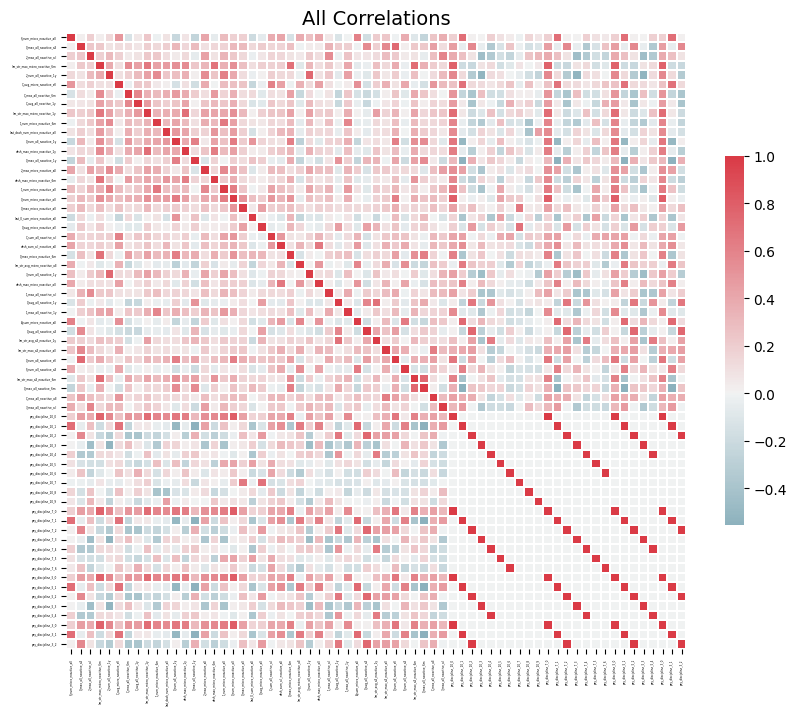

In [36]:
fs.plot_collinear(plot_all=True)

In [37]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,pay_discipline_10_0,len_str_max_micro_noactive_6m,0.771174
1,pay_discipline_10_0,0_sum_micro_noactive_all,0.797169
2,pay_discipline_7_0,len_str_max_micro_noactive_6m,0.771174
3,pay_discipline_7_0,0_sum_micro_noactive_all,0.797169
4,pay_discipline_7_0,pay_discipline_10_0,1.000000
5,pay_discipline_7_1,pay_discipline_10_1,1.000000
6,pay_discipline_7_2,pay_discipline_10_2,1.000000
7,pay_discipline_7_3,pay_discipline_10_3,0.999999
8,pay_discipline_7_4,pay_discipline_10_4,0.999967
9,pay_discipline_7_5,pay_discipline_10_5,0.999966


In [38]:
#признаки для удаления 
fs.ops['collinear']

['pay_discipline_10_0',
 'pay_discipline_7_0',
 'pay_discipline_7_1',
 'pay_discipline_7_2',
 'pay_discipline_7_3',
 'pay_discipline_7_4',
 'pay_discipline_7_5',
 'pay_discipline_7_6',
 'pay_discipline_5_0',
 'pay_discipline_5_1',
 'pay_discipline_5_2',
 'pay_discipline_5_3',
 'pay_discipline_5_4',
 'pay_discipline_3_0',
 'pay_discipline_3_1',
 'pay_discipline_3_2']

In [39]:
train = fs.remove(methods = ['collinear'])

Removed 16 features.


In [40]:
train = pd.concat([drafts, target, train], axis = 1, ignore_index=False)

In [41]:
train

,DraftId,PrivateID,Default_30,6_sum_micro_noactive_all,0_max_all_noactive_all,2_max_all_noactive_all,len_str_max_micro_noactive_6m,2_sum_all_noactive_1y,C_avg_micro_noactive_all,C_max_all_noactive_6m,C_avg_all_noactive_1y,len_str_max_micro_noactive_1y,1_sum_micro_noactive_6m,last_dash_sum_micro_noactive_all,0_sum_all_noactive_1y,dash_max_micro_noactive_1y,0_max_all_noactive_1y,2_max_micro_noactive_all,dash_max_micro_noactive_6m,1_sum_micro_noactive_all,0_sum_micro_noactive_all,0_max_micro_noactive_all,last_0_sum_micro_noactive_all,0_avg_micro_noactive_all,C_sum_all_noactive_all,dash_sum_all_noactive_all,0_max_micro_noactive_6m,len_str_avg_micro_noactive_all,3_sum_all_noactive_1y,dash_max_micro_noactive_all,1_max_all_noactive_all,0_avg_all_noactive_1y,1_max_all_noactive_1y,A_sum_micro_noactive_all,0_avg_all_noactive_all,len_str_avg_all_noactive_1y,len_str_max_all_noactive_all,0_sum_all_noactive_all,S_sum_all_noactive_all,len_str_max_all_noactive_6m,0_max_all_noactive_6m,C_max_all_noactive_all,3_max_all_noactive_all,pay_discipline_10_1,pay_discipline_10_2,pay_discipline_10_3,pay_discipline_10_4,pay_discipline_10_5,pay_discipline_10_6,pay_discipline_10_7,pay_discipline_10_8,pay_discipline_10_9
0,66768268-E592-4E31-8DEC-86267B35695E,668062.0,0.0,3.0,2.0,1.0,4.0,0.0,9.0,7.0,3.0,4.0,0.0,5.0,6.0,2.0,2.0,1.0,2.0,0.0,9.0,2.0,0.0,0.0,189.0,41.0,2.0,6.0,0.0,29.0,0.0,0.0,0.0,48.0,0.0,1.0,36.0,9.0,0.0,4.0,2.0,36.0,1.0,1.736342,-1.781705,1.894573,0.352023,-1.469922,-0.238895,0.071513,0.056585,0.245983
1,483711F2-60E7-44D1-A226-F3A8856390A9,666479.0,1.0,0.0,6.0,0.0,2.0,0.0,1.0,3.0,2.0,2.0,0.0,5.0,28.0,1.0,6.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,181.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,7.0,32.0,0.0,4.0,3.0,50.0,0.0,-1.042936,-0.389617,0.165335,0.846956,-0.178271,0.705070,-0.611113,0.161188,0.315826
2,AE0C88F3-0412-4948-8C58-9B8486BCBEFC,663184.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,6.0,4.0,5.0,0.0,12.0,31.0,2.0,3.0,0.0,2.0,0.0,30.0,3.0,0.0,0.0,239.0,19.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,32.0,0.0,5.0,3.0,14.0,0.0,-1.485360,-2.701142,1.625005,0.605970,-0.879303,0.615752,0.480558,0.157288,1.187431
3,2FCA35DF-F962-4D64-BA62-D255B82DCCF5,667458.0,0.0,0.0,25.0,0.0,3.0,0.0,9.0,4.0,2.0,3.0,0.0,14.0,36.0,2.0,7.0,0.0,2.0,0.0,17.0,1.0,0.0,0.0,1130.0,186.0,1.0,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,34.0,101.0,0.0,5.0,4.0,50.0,0.0,0.515489,-0.098734,2.631481,0.229571,-0.541415,1.657852,-1.357452,-1.539015,1.721371
4,3DE4C88D-2146-4CC7-9606-9F9403112578,663326.0,1.0,0.0,16.0,1.0,4.0,1.0,0.0,5.0,0.0,11.0,3.0,18.0,58.0,3.0,10.0,1.0,3.0,3.0,42.0,10.0,0.0,1.0,23.0,30.0,3.0,2.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,3.0,18.0,87.0,0.0,7.0,6.0,5.0,0.0,-2.832208,-0.409720,0.831665,2.380207,-0.152724,-0.657097,0.566814,-1.149849,2.255623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146130,BBBB64FF-A746-4D9C-B388-7CF8128FA9B0,300563.0,0.0,0.0,27.0,1.0,5.0,2.0,6.0,5.0,2.0,5.0,11.0,0.0,85.0,1.0,10.0,1.0,1.0,12.0,90.0,4.0,11.0,1.0,564.0,3.0,4.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,27.0,150.0,0.0,5.0,4.0,50.0,0.0,-2.399112,0.029811,-0.084638,-0.657901,3.081964,-0.939550,-0.313495,-0.564091,-1.406991
146131,57AB6D14-C942-4A3B-B8B2-10FF0103E9E9,300564.0,0.0,0.0,25.0,0.0,6.0,0.0,6.0,6.0,3.0,7.0,0.0,0.0,80.0,1.0,6.0,0.0,1.0,0.0,90.0,6.0,16.0,1.0,484.0,5.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,25.0,115.0,0.0,6.0,5.0,16.0,0.0,-3.206152,0.016289,2.256412,-0.167078,1.610103,-0.667389,0.968044,1.971772,-1.368926
146132,B0A77B9D-0D3F-4886-B705-50D096EE4A9A,300571.0,1.0,0.0,12.0,1.0,3.0,3.0,0.0,3.0,0.0,3.0,2.0,0.0,20.0,0.0,5.0,1.0,0.0,2.0,8.0,1.0,7.0,0.0,34.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,13.0,38.0,0.0,5.0,5.0,19.0,0.0,-1.659574,-0.183276,-1.115187,0.370542,1.313768,-1.286681,-1.113499,0.149458,-0.274938
146133,F18EF2E6-C5C7-408F-B367-108A3C851F05,300572.0,0.0,0.0,46.0,2.0,6.0,5.0,12.0,7.0,5.0,9.0,7.0,27.0,106.0

In [42]:
train.columns.tolist()

['DraftId',
 'PrivateID',
 'Default_30',
 '6_sum_micro_noactive_all',
 '0_max_all_noactive_all',
 '2_max_all_noactive_all',
 'len_str_max_micro_noactive_6m',
 '2_sum_all_noactive_1y',
 'C_avg_micro_noactive_all',
 'C_max_all_noactive_6m',
 'C_avg_all_noactive_1y',
 'len_str_max_micro_noactive_1y',
 '1_sum_micro_noactive_6m',
 'last_dash_sum_micro_noactive_all',
 '0_sum_all_noactive_1y',
 'dash_max_micro_noactive_1y',
 '0_max_all_noactive_1y',
 '2_max_micro_noactive_all',
 'dash_max_micro_noactive_6m',
 '1_sum_micro_noactive_all',
 '0_sum_micro_noactive_all',
 '0_max_micro_noactive_all',
 'last_0_sum_micro_noactive_all',
 '0_avg_micro_noactive_all',
 'C_sum_all_noactive_all',
 'dash_sum_all_noactive_all',
 '0_max_micro_noactive_6m',
 'len_str_avg_micro_noactive_all',
 '3_sum_all_noactive_1y',
 'dash_max_micro_noactive_all',
 '1_max_all_noactive_all',
 '0_avg_all_noactive_1y',
 '1_max_all_noactive_1y',
 'A_sum_micro_noactive_all',
 '0_avg_all_noactive_all',
 'len_str_avg_all_noactive_1y'

In [43]:
test = test[train.columns]

In [ ]:
train.to_csv(f'Z:/Скоринг –Олег/Подготовка фичей/новое/После очистки/{name_tab}/{name_tab}_train.csv', sep=';')
test.to_csv(f'Z:/Скоринг –Олег/Подготовка фичей/новое/После очистки/{name_tab}/{name_tab}_test.csv', sep=';')

In [44]:
train.shape

(146135, 52)

In [45]:
test.shape

(128931, 52)

In [46]:
df.shape

(275066, 2024)

In [47]:
df.head(1)

,Unnamed: 0,PrivateID,CreateTime,IsTest,DraftId,Default_30,Default_60,Default_90,dash_sum_all_active_6m,dash_sum_all_active_1y,dash_sum_all_active_all,dash_sum_all_noactive_6m,dash_sum_all_noactive_1y,dash_sum_all_noactive_all,dash_sum_micro_active_6m,dash_sum_micro_active_1y,dash_sum_micro_active_all,dash_sum_micro_noactive_6m,dash_sum_micro_noactive_1y,dash_sum_micro_noactive_all,dash_avg_all_active_6m,dash_avg_all_active_1y,dash_avg_all_active_all,dash_avg_all_noactive_6m,dash_avg_all_noactive_1y,dash_avg_all_noactive_all,dash_avg_micro_active_6m,dash_avg_micro_active_1y,dash_avg_micro_active_all,dash_avg_micro_noactive_6m,dash_avg_micro_noactive_1y,dash_avg_micro_noactive_all,dash_min_all_active_6m,dash_min_all_active_1y,dash_min_all_active_all,dash_min_all_noactive_6m,dash_min_all_noactive_1y,dash_min_all_noactive_all,dash_min_micro_active_6m,dash_min_micro_active_1y,dash_min_micro_active_all,dash_min_micro_noactive_6m,dash_min_micro_noactive_1y,dash_min_micro_noactive_all,dash_max_all_active_6m,dash_max_all_active_1y,dash_max_all_active_all,dash_max_all_noactive_6m,dash_max_all_noactive_1y,dash_max_all_noactive_all,dash_max_micro_active_6m,dash_max_micro_active_1y,dash_max_micro_active_all,dash_max_micro_noactive_6m,dash_max_micro_noactive_1y,dash_max_micro_noactive_all,0_sum_all_active_6m,0_sum_all_active_1y,0_sum_all_active_all,0_sum_all_noactive_6m,0_sum_all_noactive_1y,0_sum_all_noactive_all,0_sum_micro_active_6m,0_sum_micro_active_1y,0_sum_micro_active_all,0_sum_micro_noactive_6m,0_sum_micro_noactive_1y,0_sum_micro_noactive_all,0_avg_all_active_6m,0_avg_all_active_1y,0_avg_all_active_all,0_avg_all_noactive_6m,0_avg_all_noactive_1y,0_avg_all_noactive_all,0_avg_micro_active_6m,0_avg_micro_active_1y,0_avg_micro_active_all,0_avg_micro_noactive_6m,0_avg_micro_noactive_1y,0_avg_micro_noactive_all,0_min_all_active_6m,0_min_all_active_1y,0_min_all_active_all,0_min_all_noactive_6m,0_min_all_noactive_1y,0_min_all_noactive_all,0_min_micro_active_6m,0_min_micro_active_1y,0_min_micro_active_all,0_min_micro_noactive_6m,0_min_micro_noactive_1y,0_min_micro_noactive_all,0_max_all_active_6m,0_max_all_active_1y,0_max_all_active_all,0_max_all_noactive_6m,0_max_all_noactive_1y,0_max_all_noactive_all,0_max_micro_active_6m,0_max_micro_active_1y,...,last_U_max_micro_active_all,last_U_max_micro_noactive_6m,last_U_max_micro_noactive_1y,last_U_max_micro_noactive_all,last_T_sum_all_active_6m,last_T_sum_all_active_1y,last_T_sum_all_active_all,last_T_sum_all_noactive_6m,last_T_sum_all_noactive_1y,last_T_sum_all_noactive_all,last_T_sum_micro_active_6m,last_T_sum_micro_active_1y,last_T_sum_micro_active_all,last_T_sum_micro_noactive_6m,last_T_sum_micro_noactive_1y,last_T_sum_micro_noactive_all,last_T_avg_all_active_6m,last_T_avg_all_active_1y,last_T_avg_all_active_all,last_T_avg_all_noactive_6m,last_T_avg_all_noactive_1y,last_T_avg_all_noactive_all,last_T_avg_micro_active_6m,last_T_avg_micro_active_1y,last_T_avg_micro_active_all,last_T_avg_micro_noactive_6m,last_T_avg_micro_noactive_1y,last_T_avg_micro_noactive_all,last_T_min_all_active_6m,last_T_min_all_active_1y,last_T_min_all_active_all,last_T_min_all_noactive_6m,last_T_min_all_noactive_1y,last_T_min_all_noactive_all,last_T_min_micro_active_6m,last_T_min_micro_active_1y,last_T_min_micro_active_all,last_T_min_micro_noactive_6m,last_T_min_micro_noactive_1y,last_T_min_micro_noactive_all,last_T_max_all_active_6m,last_T_max_all_active_1y,last_T_max_all_active_all,last_T_max_all_noactive_6m,last_T_max_all_noactive_1y,last_T_max_all_noactive_all,last_T_max_micro_active_6m,last_T_max_micro_active_1y,last_T_max_micro_active_all,last_T_max_micro_noactive_6m,last_T_max_micro_noactive_1y,last_T_max_micro_noactive_all,last_I_sum_all_active_6m,last_I_sum_all_active_1y,last_I_sum_all_active_all,last_I_sum_all_noactive_6m,last_I_sum_all_noactive_1y,last_I_sum_all_noactive_all,last_I_sum_micro_active_6m,last_I_sum_micro_active_1y,last_I_sum_micro_active_all,last_I_sum_micro_noactive_6m,last_I_sum_micro_noactive_

In [48]:
cols_to_pca

['6_sum_micro_noactive_all',
 '0_max_all_noactive_all',
 '2_max_all_noactive_all',
 'len_str_max_micro_noactive_6m',
 '2_sum_all_noactive_1y',
 'C_avg_micro_noactive_all',
 'C_max_all_noactive_6m',
 'C_avg_all_noactive_1y',
 'len_str_max_micro_noactive_1y',
 '1_sum_micro_noactive_6m',
 'last_dash_sum_micro_noactive_all',
 '0_sum_all_noactive_1y',
 'dash_max_micro_noactive_1y',
 '0_max_all_noactive_1y',
 '2_max_micro_noactive_all',
 'dash_max_micro_noactive_6m',
 '1_sum_micro_noactive_all',
 '0_sum_micro_noactive_all',
 '0_max_micro_noactive_all',
 'last_0_sum_micro_noactive_all',
 '0_avg_micro_noactive_all',
 'C_sum_all_noactive_all',
 'dash_sum_all_noactive_all',
 '0_max_micro_noactive_6m',
 'len_str_avg_micro_noactive_all',
 '3_sum_all_noactive_1y',
 'dash_max_micro_noactive_all',
 '1_max_all_noactive_all',
 '0_avg_all_noactive_1y',
 '1_max_all_noactive_1y',
 'A_sum_micro_noactive_all',
 '0_avg_all_noactive_all',
 'len_str_avg_all_noactive_1y',
 'len_str_max_all_noactive_all',
 '0_su

In [49]:
name_tab

'pay_discipline'